In [2]:
library(tidyverse)
library(caTools)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
url ="https://raw.githubusercontent.com/jakkkc/Kenya_financial_debts/main/kenya%20debt.csv"
kenya_debt <- read_csv(url)

Rows: 262 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Month, Decision_domestic_VS_external, Decsion_icrease_decrease_DOME...
dbl (7): Year, Per_DOMESTIC, Per_EXTERNAL, Percentage_Incresea_decresea_DOME...
num (6): Domestic Debt, External Debt, Total, AMOUNT_Increase_decrese_DOMEST...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(kenya_debt,10)

Year Month     Domestic Debt External Debt Total   Per_DOMESTIC Per_EXTERNAL
1  2021 December  4032368       4174372       8206740 49.13484     50.86516    
2  2021 November  4008077       4109283       8117360 49.37661     50.62339    
3  2021 October   3959523       4083125       8042648 49.23159     50.76841    
4  2021 September 3937777       4062505       8000282 49.22048     50.77952    
5  2021 August    3864876       4054863       7919739 48.80055     51.19945    
6  2021 July      3792147       4020629       7812776 48.53776     51.46224    
7  2021 June      3697093       4015299       7712393 47.93705     52.06295    
8  2021 May       3686892       3799019       7485911 49.25108     50.74892    
9  2021 April     3632915       3778131       7411046 49.02027     50.97973    
10 2021 March     3569841       3769867       7339707 48.63737     51.36263    
   Decision_domestic_VS_external AMOUNT_Increase_decrese_DOMESTIC
1  Higher external debt          24290.88                        
2  Higher external debt          48554.00                        
3  Higher external debt          21745.85                        
4  Higher external debt          72901.67                        
5  Higher external debt          72728.89                        
6  Higher external debt          95053.71                        
7  Higher external debt          10201.46                        
8  Higher external debt          53976.92                        
9  Higher external debt          63074.23                        
10 Higher external debt          38657.64                        
   Percentage_Incresea_decresea_DOMESTIC Decsion_icrease_decrease_DOMESTIC
1  0.6060482                             Decrease                         
2  1.2262587                             Increase                         
3  0.5522366                             Decrease                         
4  1.8862617                             Decrease                         
5  1.9178817                             Decrease                         
6  2.5710391                             Increase                         
7  0.2766954                             Decrease                         
8  1.4857745                             Decrease                         
9  1.7668641                             Increase                         
10 1.0947504                             Increase                         
   AMOUNT_Increase_decrese_EXTERNAL Percentage_Incresea_decresea_EXTERNAL
1   65088.68                         1.58                                
2   26158.31                         0.64                                
3   20619.76                         0.51                                
4    7641.93                         0.19                                
5   34233.55                         0.85                                
6    5329.92                         0.13                                
7  216280.57                         5.69                                
8   20887.37                         0.55                                
9    8264.70                         0.22                                
10 -44422.03                        -1.16                                
   Decsion_icrease_decrease_EXTERNAL AMOUNT_Increase_decrese_TOTAL
1  Increase                           89379.56                    
2  Increase                           74712.31                    
3  Increase                           42365.61                    
4  Decrease                           80543.60                    
5  Increase                          106962.44                    
6  Decrease                          100383.62                    
7  Increase                          226482.04                    
8  Increase                           74864.29                    
9  Increase                           71338.93                    
10 Decrease                           -5764.39                    
   Percentage_Increse

In [5]:
summary(kenya_debt)

      Year         Month           Domestic Debt     External Debt    
 Min.   :1999   Length:262         Min.   : 183417   Min.   : 311953  
 1st Qu.:2005   Class :character   1st Qu.: 326235   1st Qu.: 417575  
 Median :2011   Mode  :character   Median : 732829   Median : 623003  
 Mean   :2011                      Mean   :1166927   Mean   :1213153  
 3rd Qu.:2016                      3rd Qu.:1813763   3rd Qu.:1801866  
 Max.   :2021                      Max.   :4032368   Max.   :4174372  
     Total          Per_DOMESTIC    Per_EXTERNAL  
 Min.   : 502253   Min.   :32.22   Min.   :43.05  
 1st Qu.: 751207   1st Qu.:43.78   1st Qu.:48.87  
 Median :1361437   Median :48.64   Median :51.36  
 Mean   :2380080   Mean   :47.52   Mean   :52.48  
 3rd Qu.:3615630   3rd Qu.:51.13   3rd Qu.:56.22  
 Max.   :8206740   Max.   :56.95   Max.   :67.78  
 Decision_domestic_VS_external AMOUNT_Increase_decrese_DOMESTIC
 Length:262                    Min.   :-36760.0                
 Class :character 

In [6]:
Quantitative <- kenya_debt%>% select(where(is.numeric),-Year)

In [7]:
#Feature engineering
library(dlookr)
diagnose_outlier(Quantitative)

Registered S3 method overwritten by 'dlookr':
  method         from  
  plot.transform scales


Attaching package: ‘dlookr’


The following object is masked from ‘package:tidyr’:

    extract


The following object is masked from ‘package:base’:

    transform




variables                             outliers_cnt outliers_ratio
1  Domestic Debt                          0            0.0000000    
2  External Debt                          7            2.6717557    
3  Total                                  4            1.5267176    
4  Per_DOMESTIC                           2            0.7633588    
5  Per_EXTERNAL                           2            0.7633588    
6  AMOUNT_Increase_decrese_DOMESTIC      14            5.3435115    
7  Percentage_Incresea_decresea_DOMESTIC  9            3.4351145    
8  AMOUNT_Increase_decrese_EXTERNAL      35           13.3587786    
9  Percentage_Incresea_decresea_EXTERNAL 27           10.3053435    
10 AMOUNT_Increase_decrese_TOTAL         18            6.8702290    
11 Percentage_Incresea_decresea_TOTAL    23            8.7786260    
12 SN                                     0            0.0000000    
   outliers_mean with_mean    without_mean
1           NaN  1.166927e+06 1.166927e+06
2  4.074296e+06  1.213153e+06 1.134611e+06
3  8.091757e+06  2.380080e+06 2.291527e+06
4  3.230120e+01  4.752424e+01 4.764135e+01
5  6.769880e+01  5.247576e+01 5.235865e+01
6  8.140056e+04  1.469065e+04 1.092477e+04
7  1.245825e+00  1.204474e+00 1.203003e+00
8  7.610418e+04  1.471082e+04 5.244882e+03
9  4.535185e+00  1.037519e+00 6.356596e-01
10 1.565381e+05  2.940147e+04 2.002254e+04
11 3.953902e+00  1.091976e+00 8.165609e-01
12          NaN  1.315000e+02 1.315000e+02

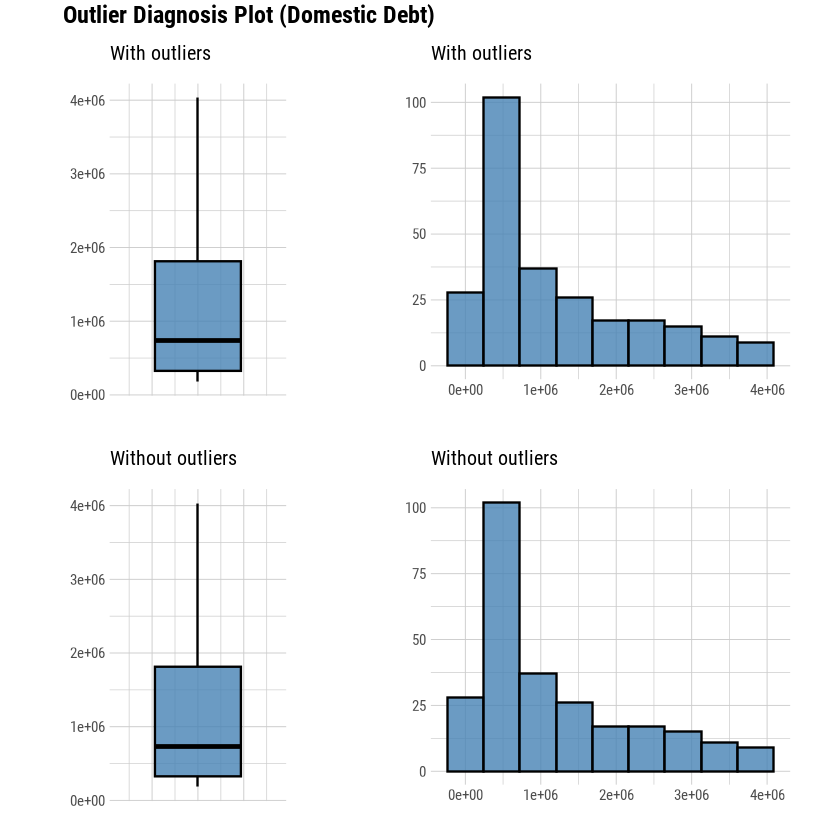

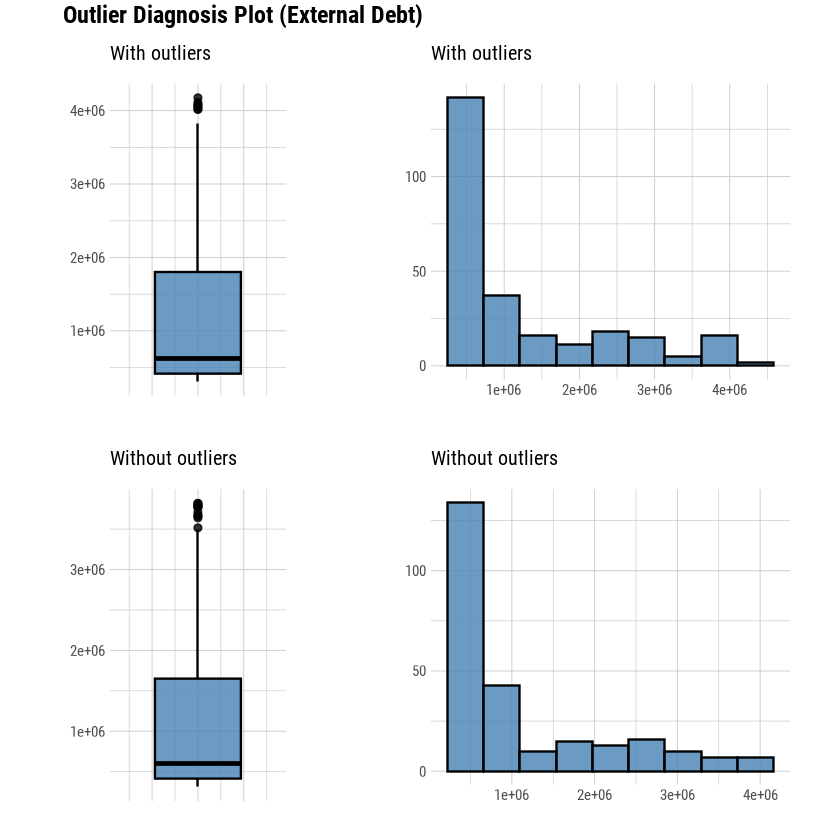

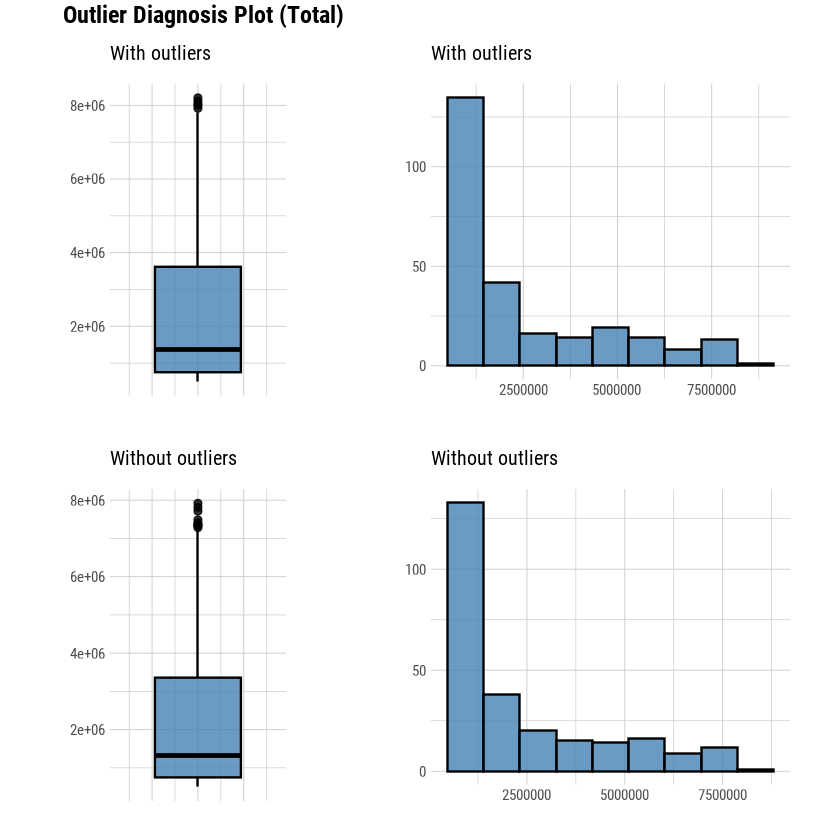

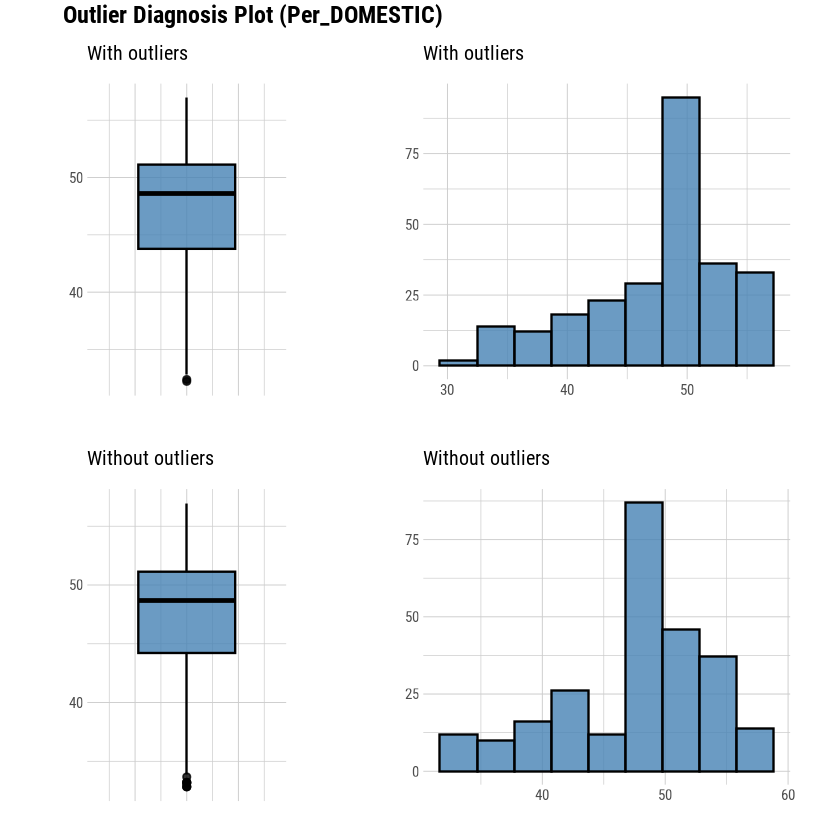

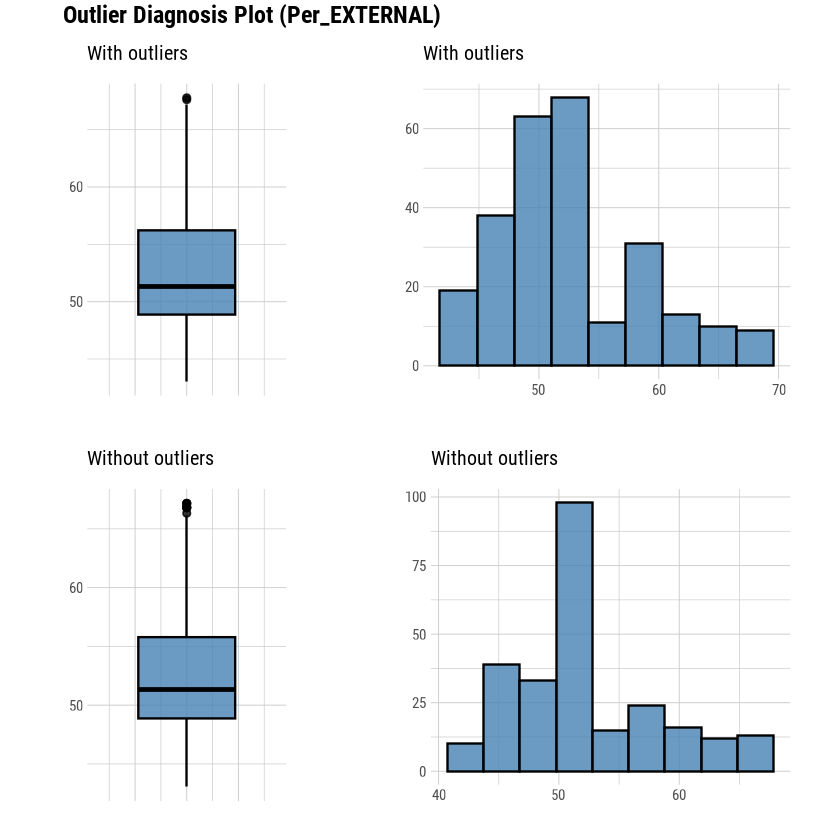

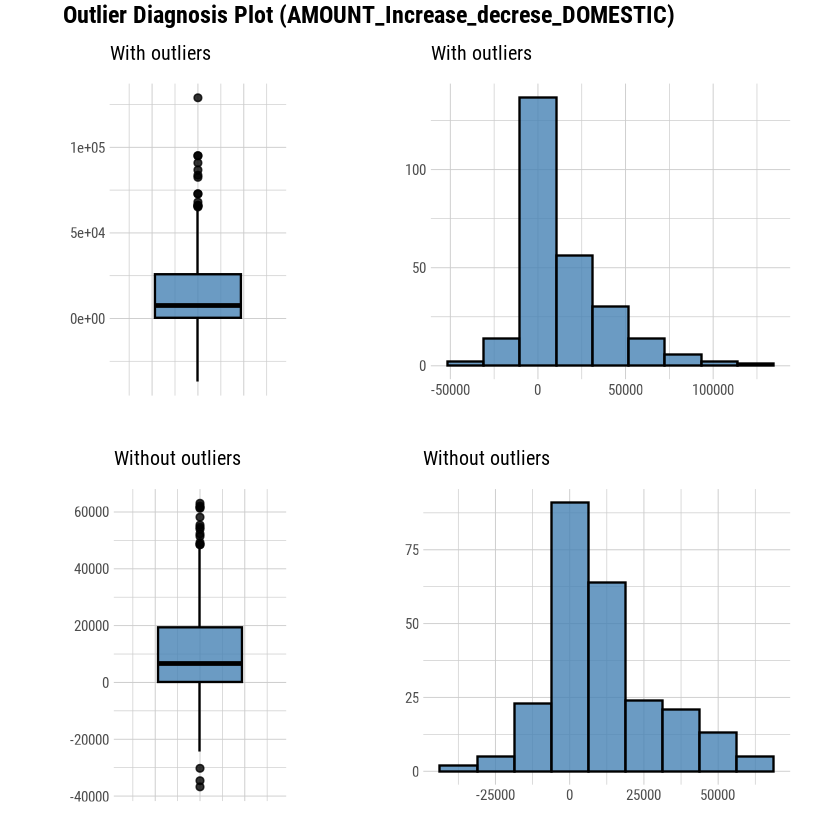

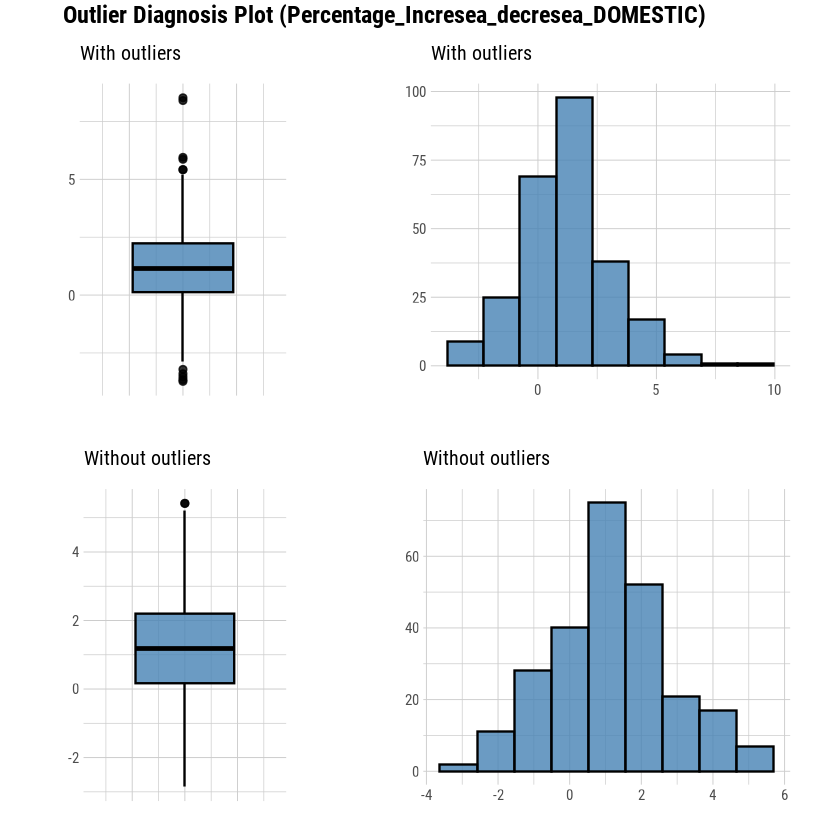

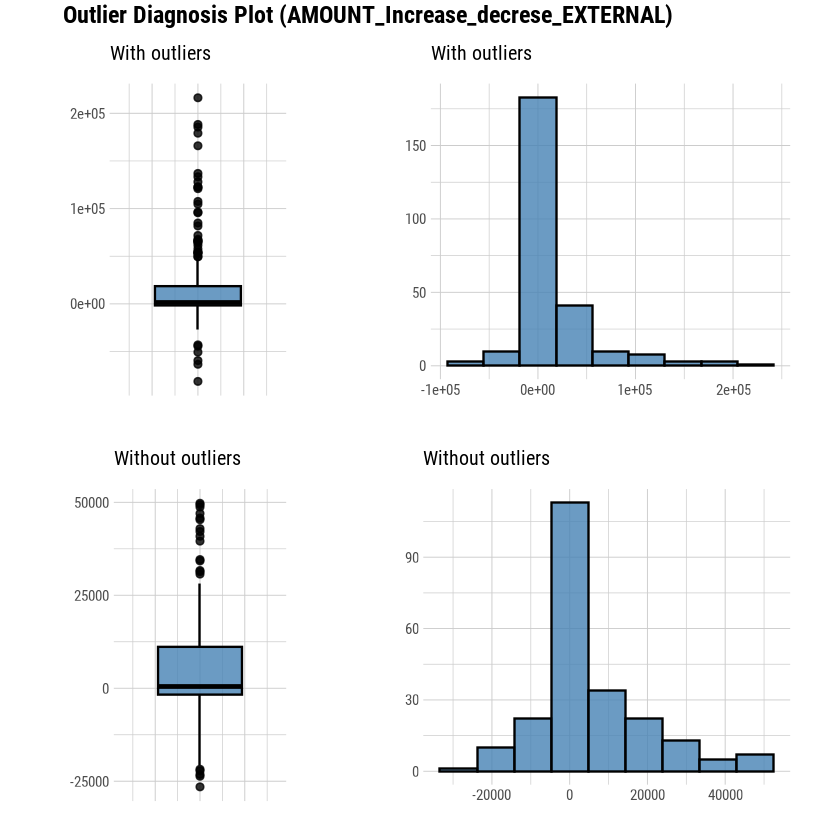

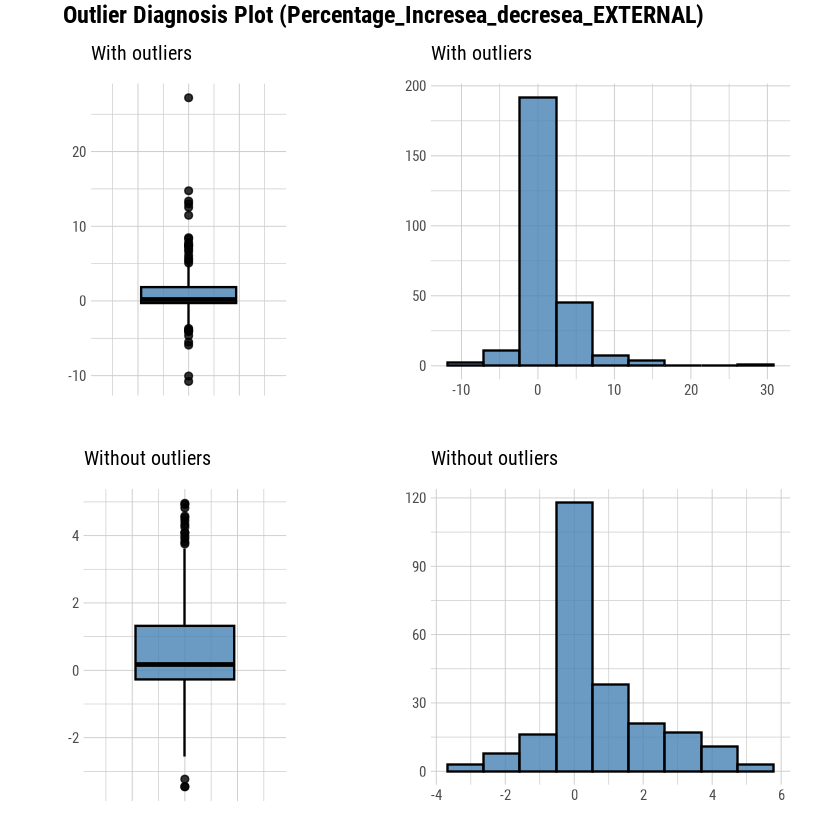

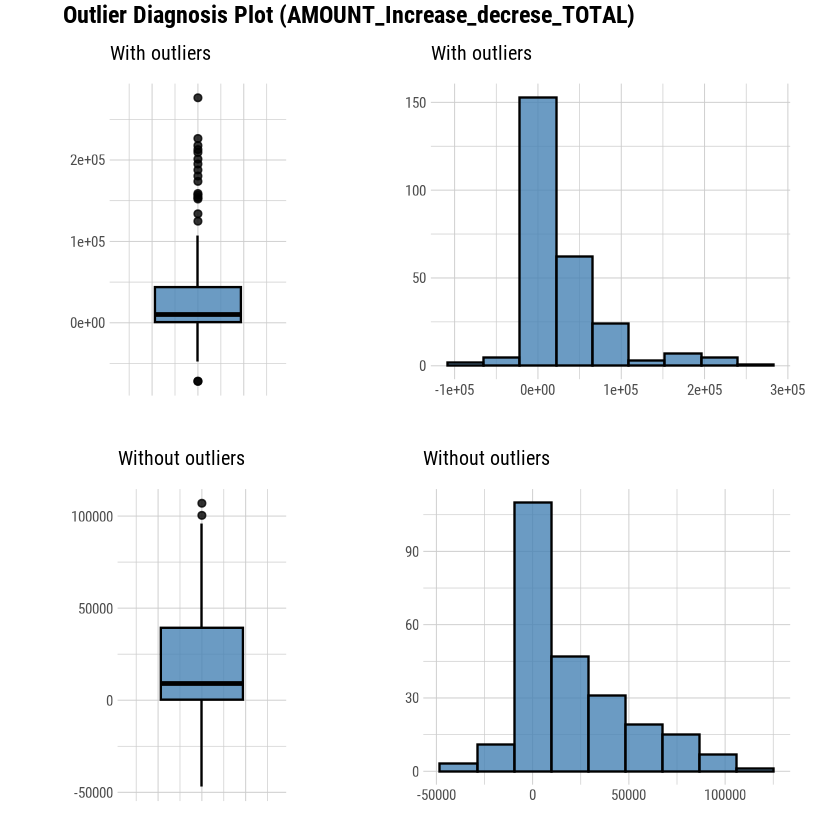

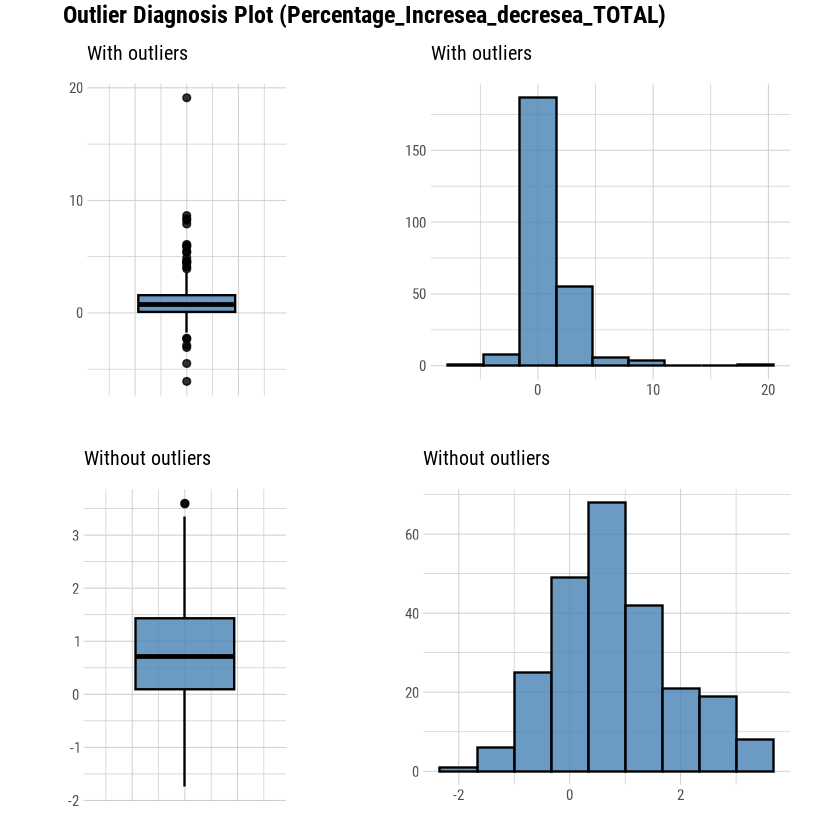

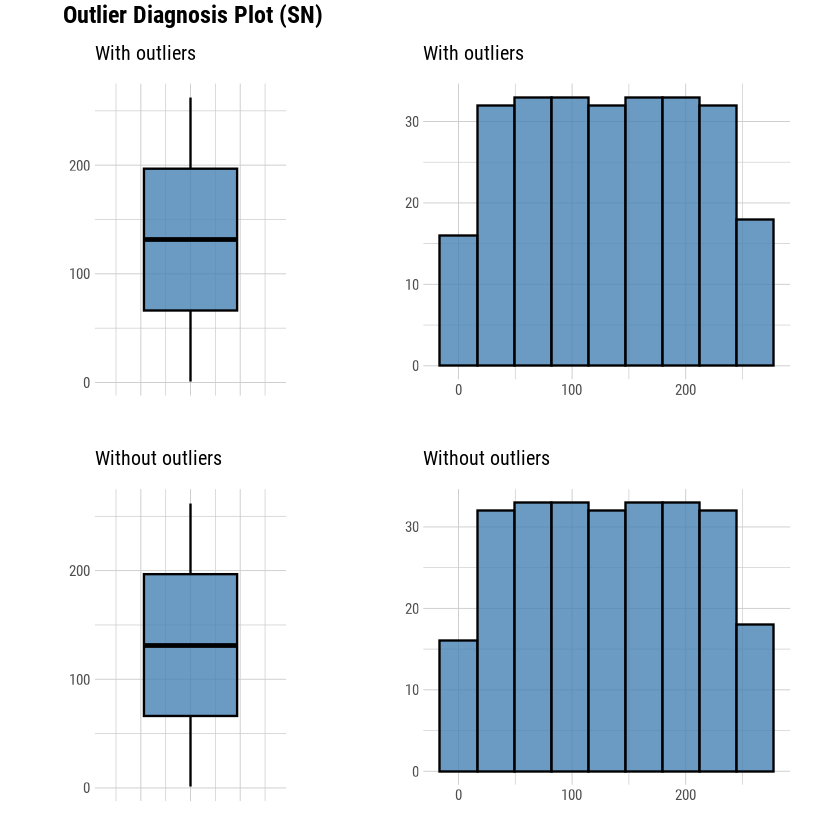

In [8]:
plot_outlier(Quantitative)

In [9]:
Quantitative <- kenya_debt %>% select(where(is.numeric))

In [10]:
Quantitative <- Quantitative %>% select(DD=`Domestic Debt`,                        
                                        ED= `External Debt`, Total,PD=Per_DOMESTIC, PE=Per_EXTERNAL,                         
                                        AMIDD=AMOUNT_Increase_decrese_DOMESTIC, PIDD=Percentage_Incresea_decresea_DOMESTIC,
                                        AIDE=AMOUNT_Increase_decrese_EXTERNAL, PIDE=Percentage_Incresea_decresea_EXTERNAL,
                                        AIDT=AMOUNT_Increase_decrese_TOTAL, PIDT=Percentage_Incresea_decresea_TOTAL)


Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


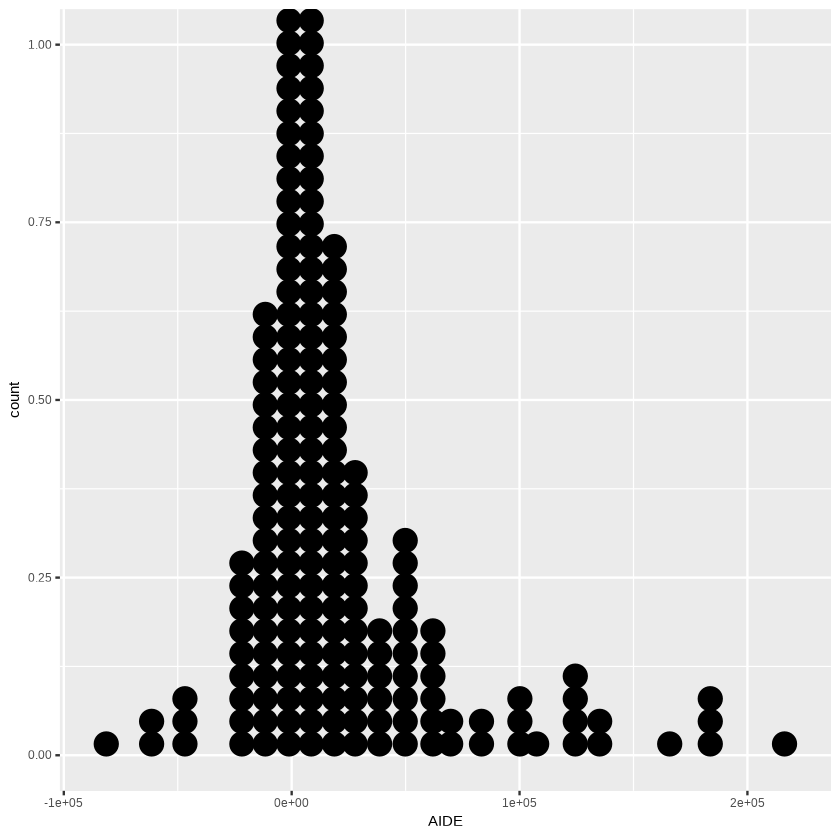

In [11]:
ggplot(Quantitative, aes(AIDE))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


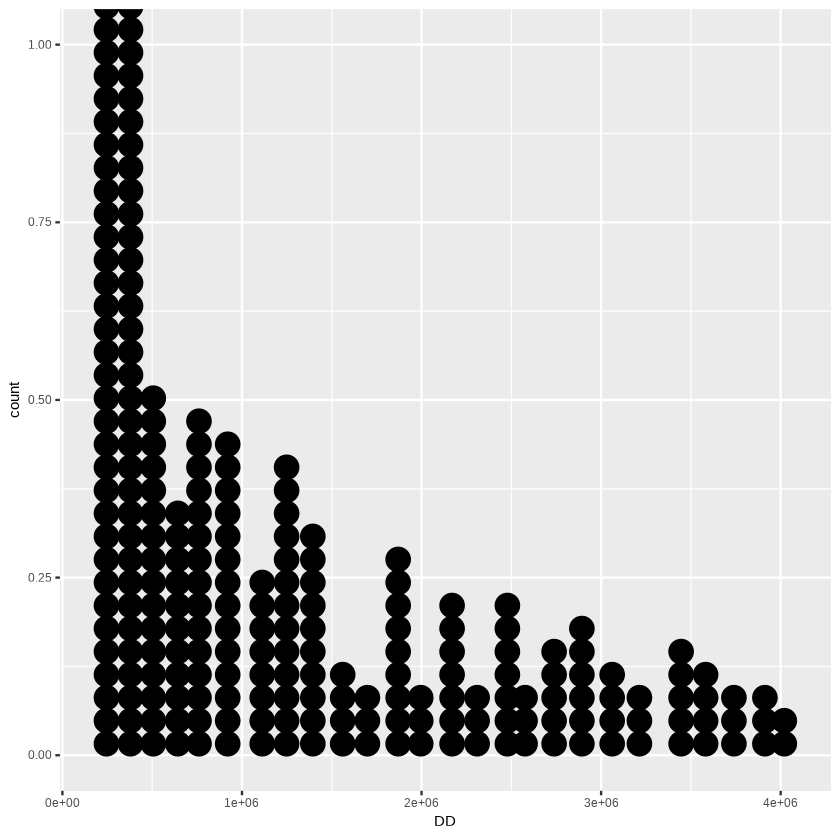

In [12]:

ggplot(Quantitative, aes(DD))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


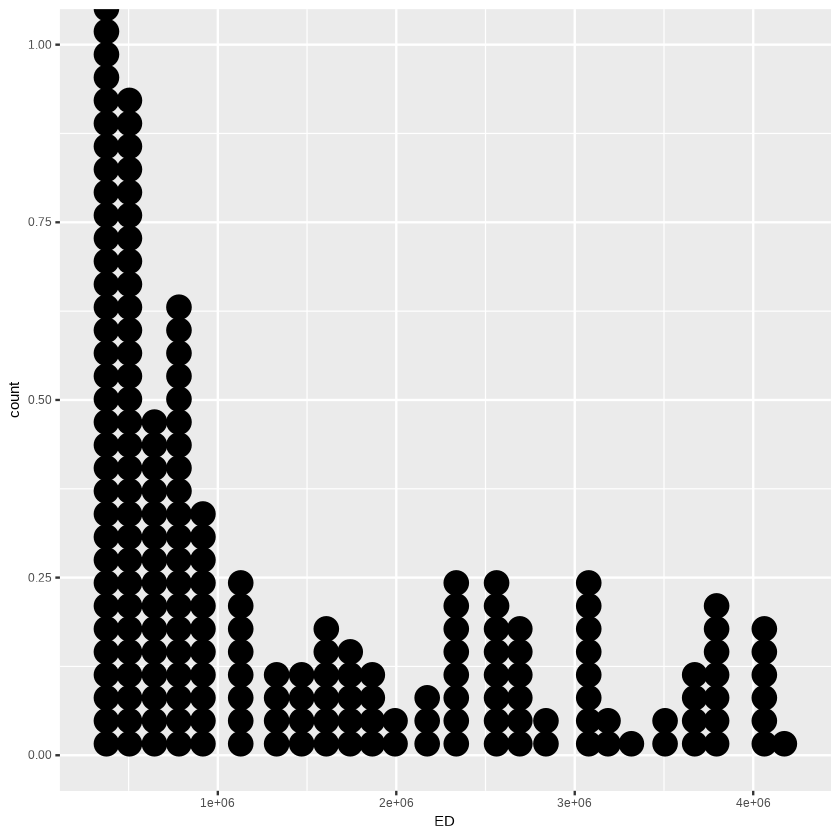

In [13]:
ggplot(Quantitative, aes(ED))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


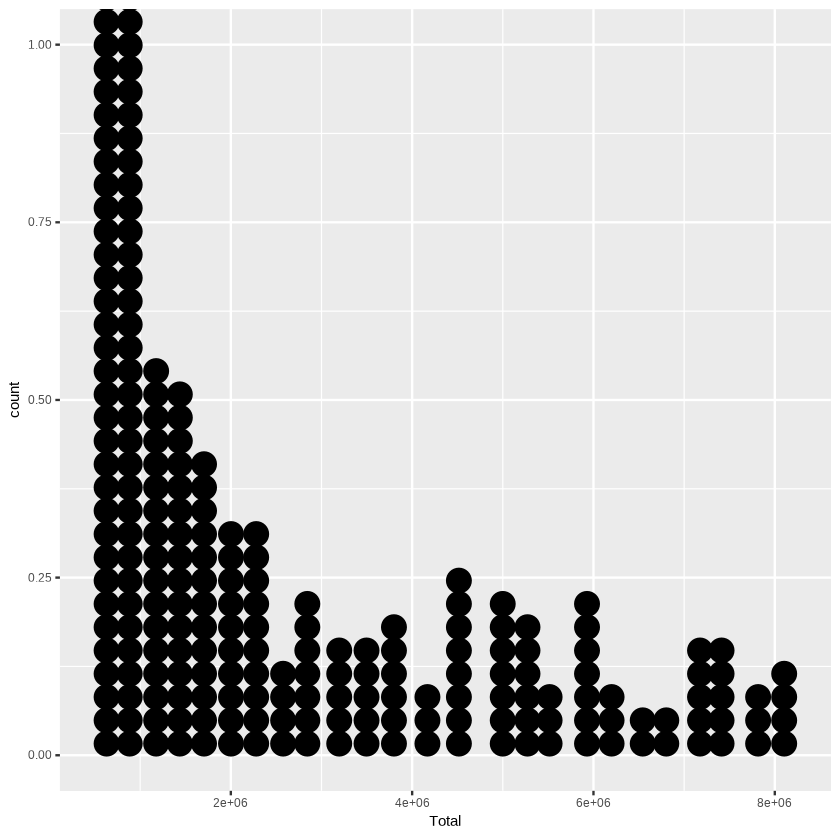

In [14]:
ggplot(Quantitative, aes(Total))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


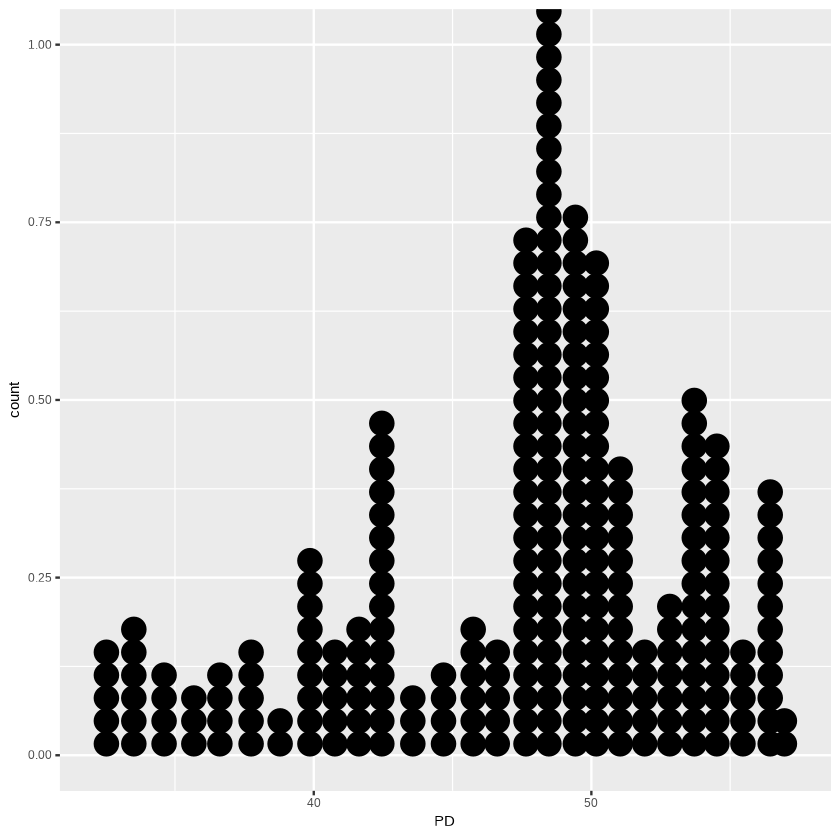

In [15]:
ggplot(Quantitative, aes(PD))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


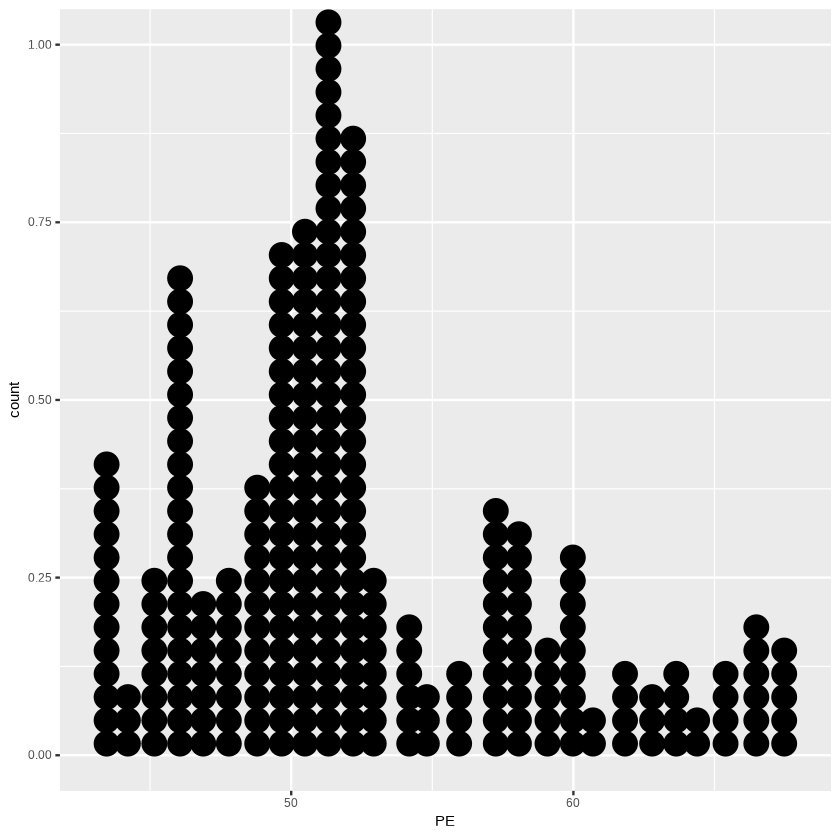

In [16]:
ggplot(Quantitative, aes(PE))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


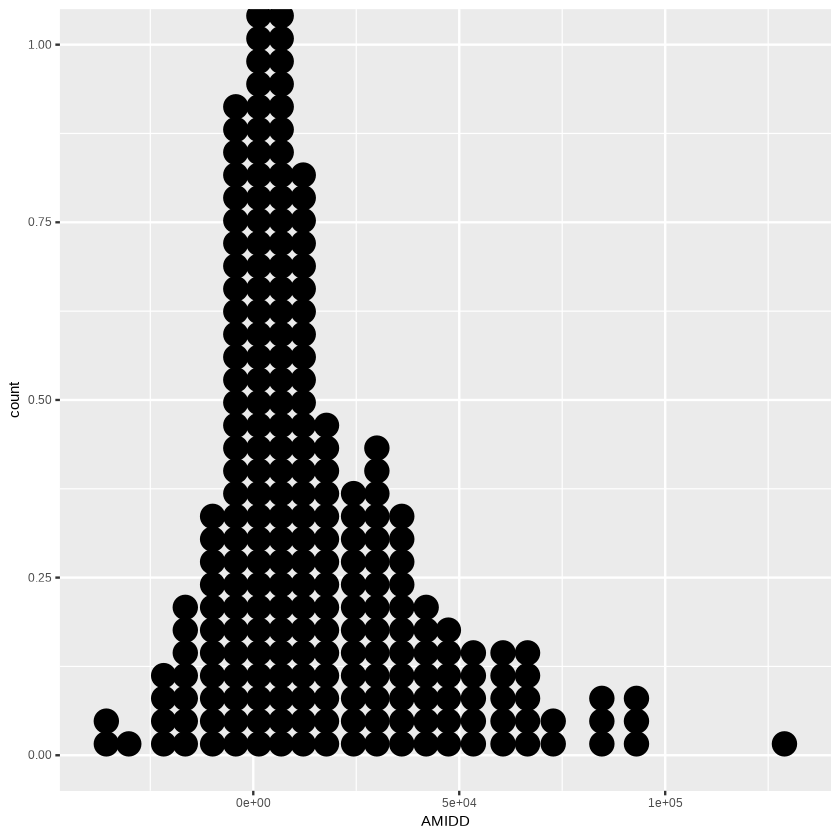

In [17]:
ggplot(Quantitative, aes(AMIDD))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


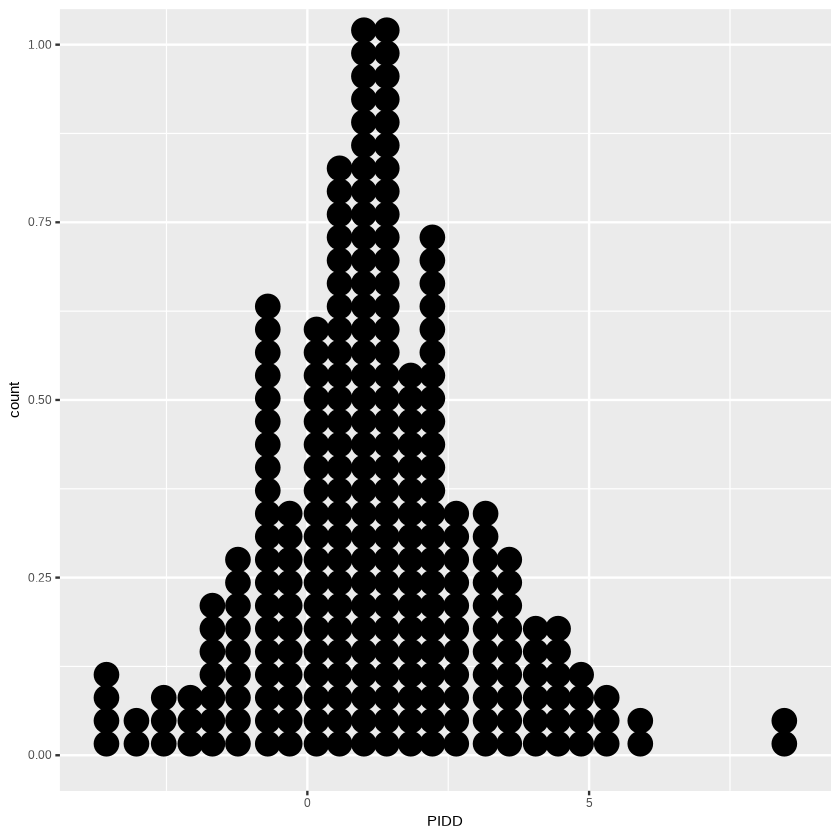

In [18]:
ggplot(Quantitative, aes(PIDD))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


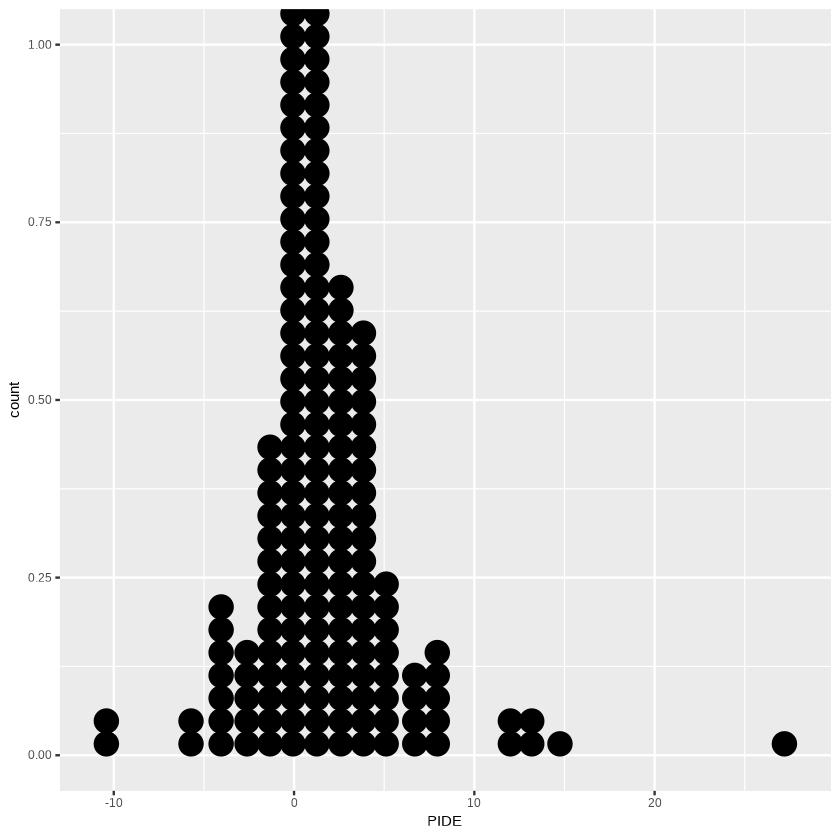

In [19]:
ggplot(Quantitative, aes(PIDE))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


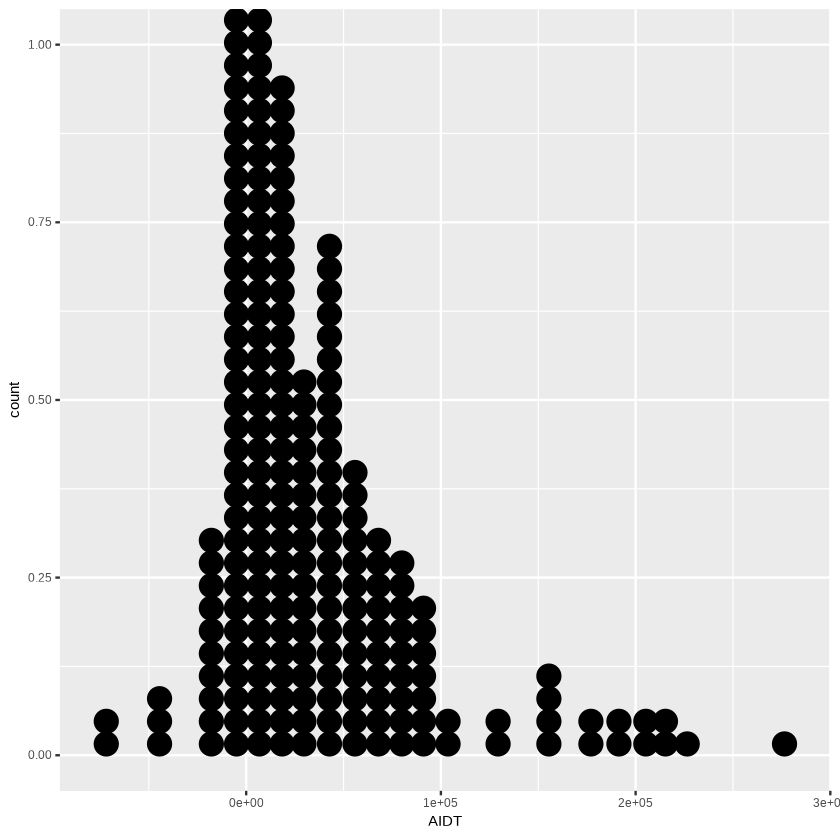

In [20]:
ggplot(Quantitative, aes(AIDT))+geom_dotplot()

Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


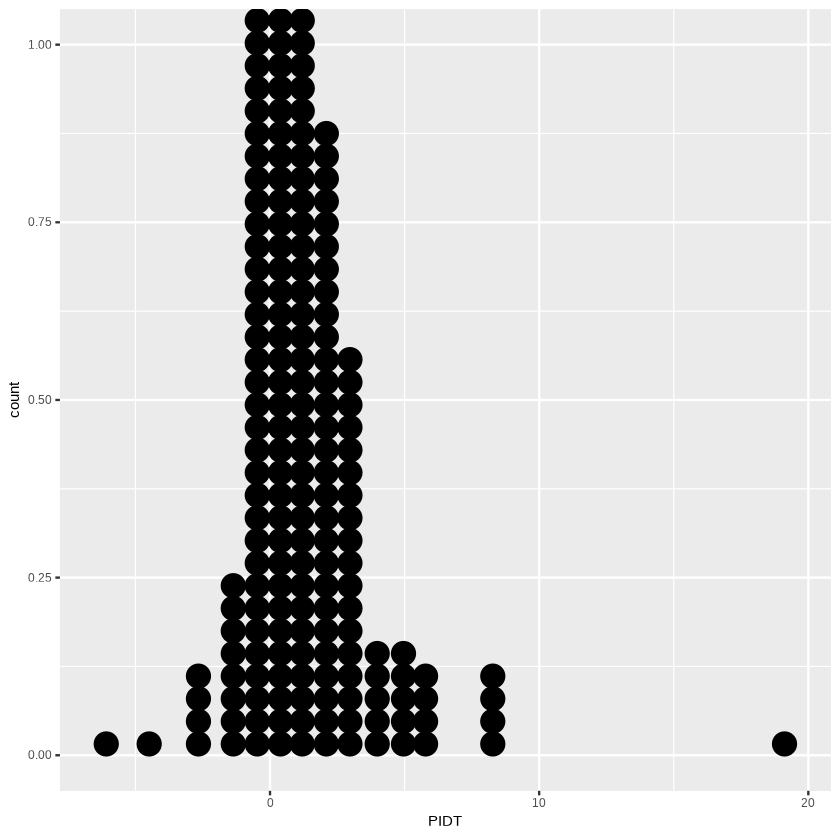

In [21]:
ggplot(Quantitative, aes(PIDT))+geom_dotplot()

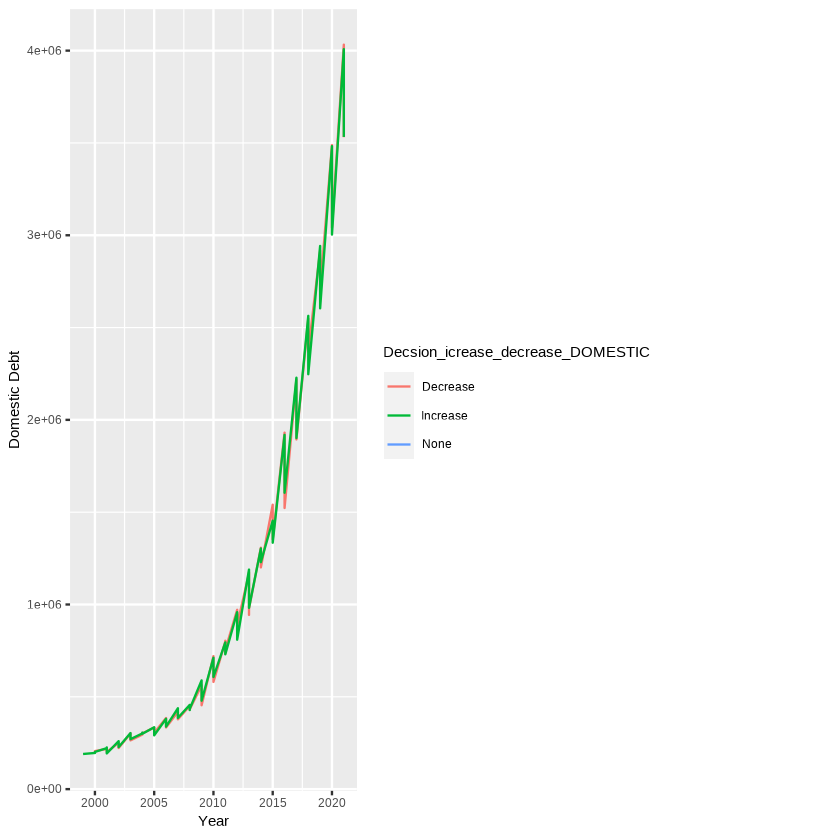

In [22]:
 ggplot(kenya_debt, aes(x=Year, y=`Domestic Debt`, colour = Decsion_icrease_decrease_DOMESTIC))+geom_line()

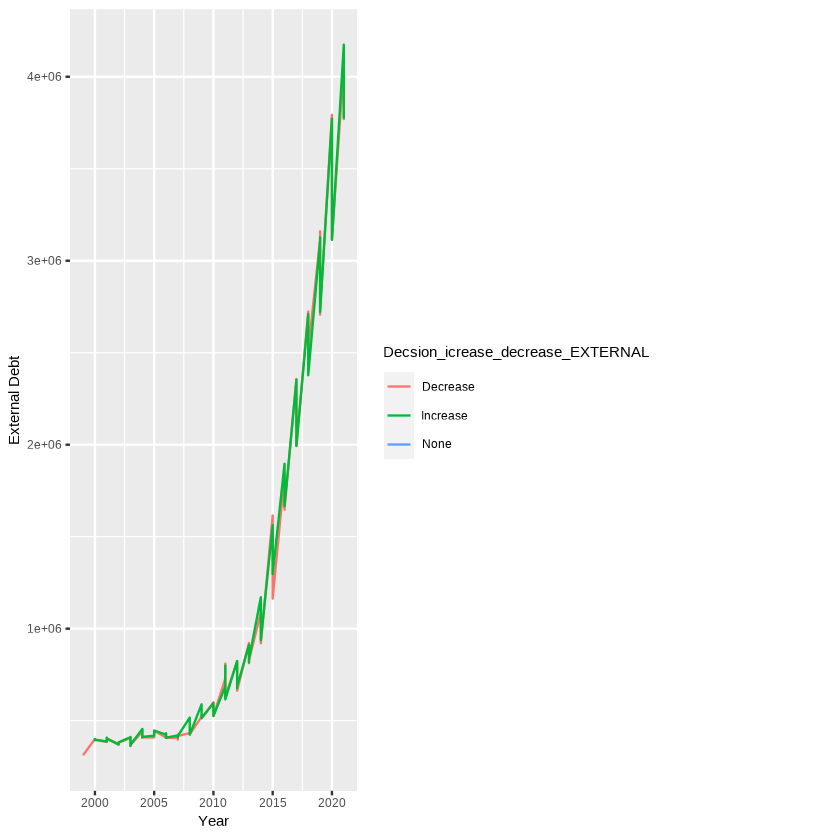

In [23]:
ggplot(kenya_debt, aes(x=Year, y=`External Debt`, col =Decsion_icrease_decrease_EXTERNAL))+geom_line()

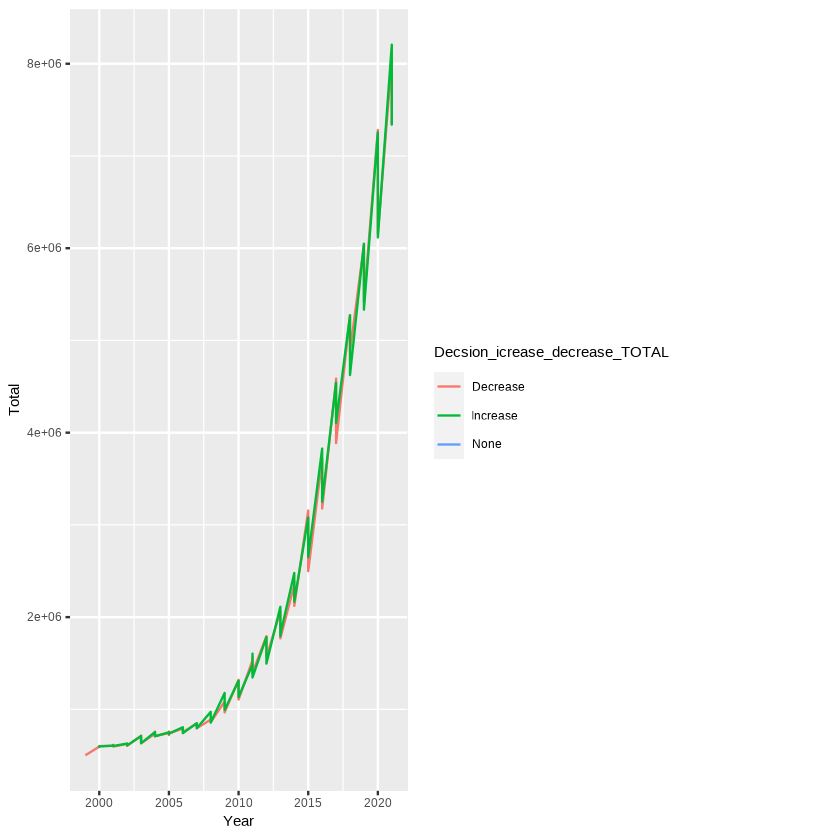

In [24]:
ggplot(kenya_debt, aes(x=Year, y=Total, colour = Decsion_icrease_decrease_TOTAL))+geom_line()

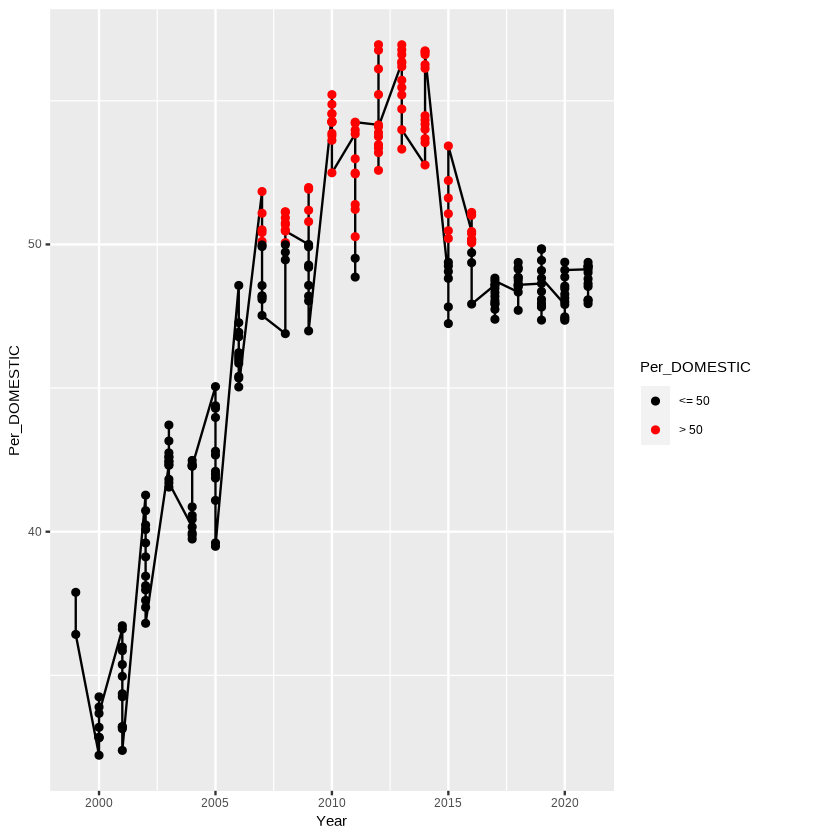

In [25]:
k <- kenya_debt %>%
  mutate(high_domestic_debt = Per_DOMESTIC > 50)


ggplot(k, aes(x = Year, y = Per_DOMESTIC)) +
  geom_line() +
  geom_point(aes(color = high_domestic_debt)) +
  scale_color_manual(values = c("black", "red"), labels = c("<= 50", "> 50")) +labs(color = "Per_DOMESTIC")

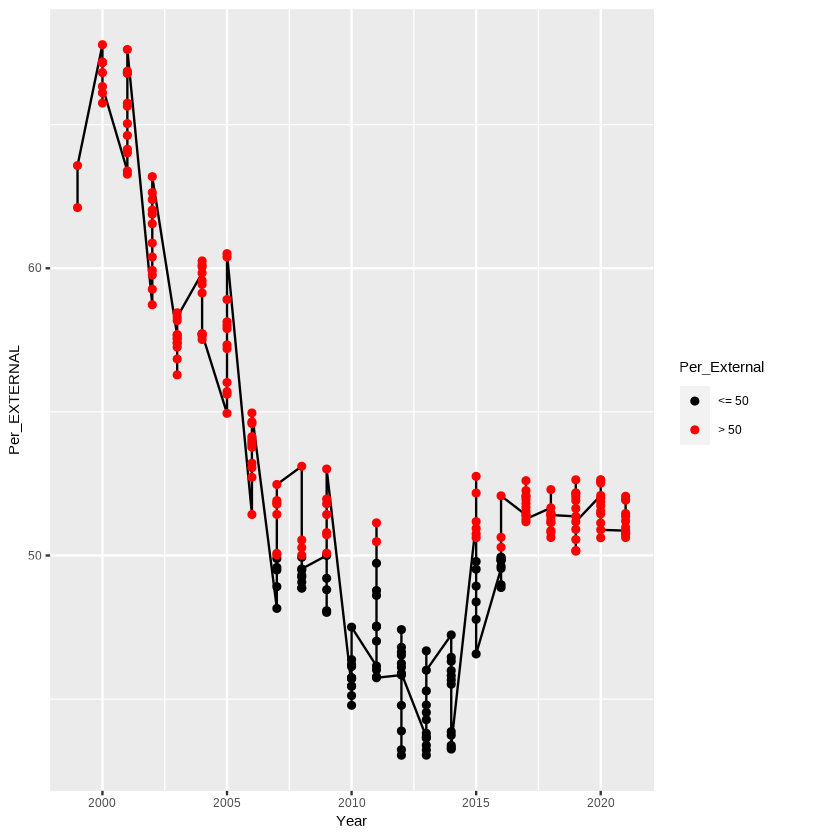

In [26]:
k2 <- kenya_debt %>%
  mutate(high_External_debt = Per_EXTERNAL > 50)

ggplot(k2, aes(x = Year, y = Per_EXTERNAL)) +
  geom_line() +
  geom_point(aes(color = high_External_debt)) +
  scale_color_manual(values = c("black", "red"), labels = c("<= 50", "> 50")) +
  labs(color = "Per_External")


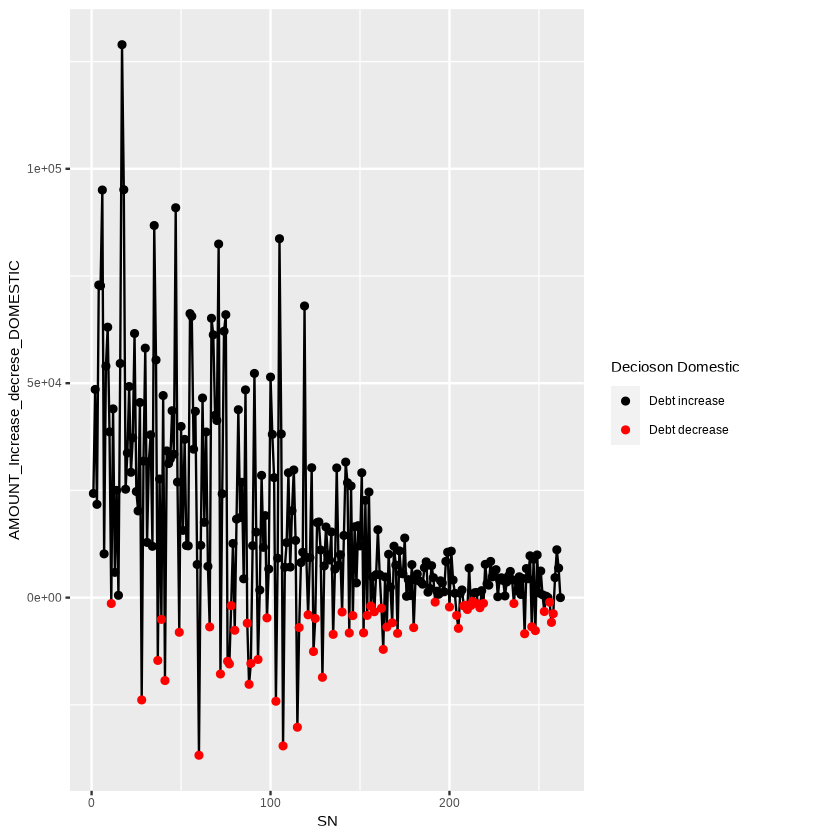

In [27]:
k3 <- kenya_debt %>%
  mutate(AMOUNT_Increase_decrese_DOMESTIC_N = AMOUNT_Increase_decrese_DOMESTIC < 0)

ggplot(k3, aes(x = SN, y = AMOUNT_Increase_decrese_DOMESTIC)) +
  geom_line() +
  geom_point(aes(color = AMOUNT_Increase_decrese_DOMESTIC_N)) +
  scale_color_manual(values = c("black", "red"), labels = c("Debt increase", "Debt decrease")) +
  labs(color = "Decioson Domestic")

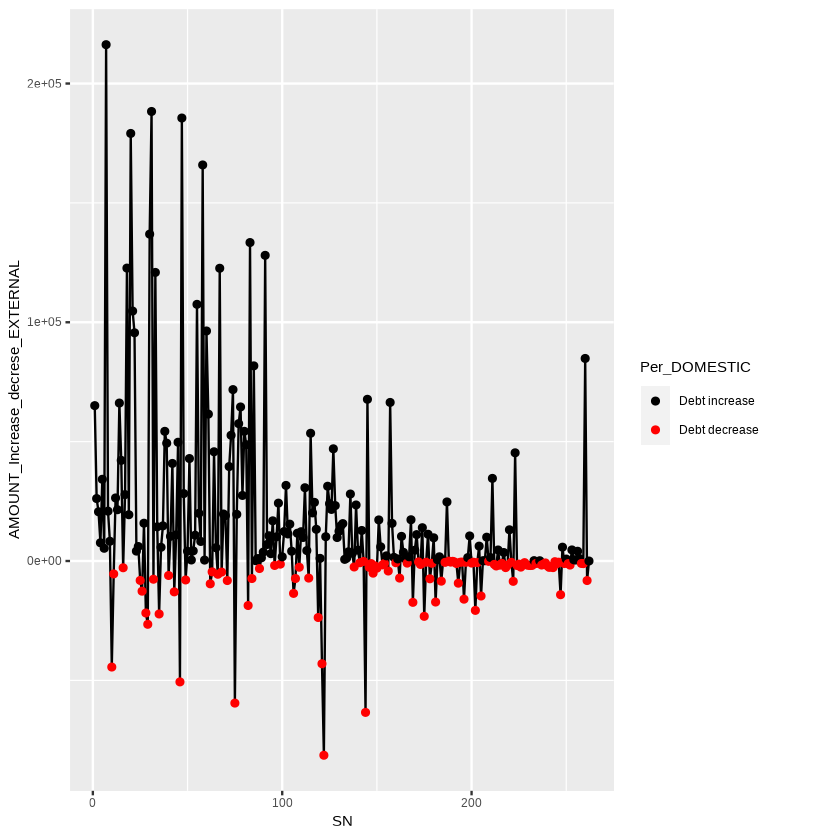

In [28]:
k4 <- kenya_debt %>%
  mutate(AMOUNT_Increase_decrese_EXTERNAL_N = AMOUNT_Increase_decrese_EXTERNAL < 0)


ggplot(k4, aes(x = SN, y = AMOUNT_Increase_decrese_EXTERNAL)) +
  geom_line() +
  geom_point(aes(color = AMOUNT_Increase_decrese_EXTERNAL_N)) +
  scale_color_manual(values = c("black", "red"), labels = c("Debt increase", "Debt decrease")) +
  labs(color = "Per_DOMESTIC")

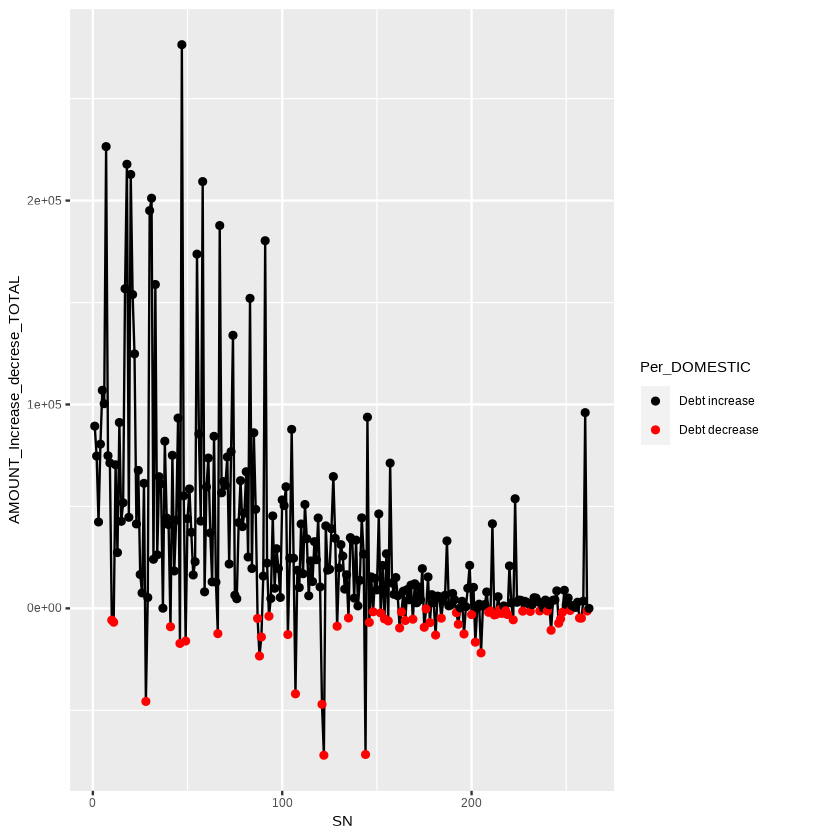

In [29]:
k5 <- kenya_debt %>%
  mutate(AMOUNT_Increase_decrese_TOTAL_N = AMOUNT_Increase_decrese_TOTAL < 0)


ggplot(k5, aes(x = SN, y = AMOUNT_Increase_decrese_TOTAL)) +
  geom_line() +
  geom_point(aes(color = AMOUNT_Increase_decrese_TOTAL_N)) +
  scale_color_manual(values = c("black", "red"), labels = c("Debt increase", "Debt decrease")) +
  labs(color = "Per_DOMESTIC")

# YEAR BY month

## Total debt per

[1] 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
[16] 2006 2005 2004 2003 2002 2001 2000 1999

[1] "Year"                                 
 [2] "Month"                                
 [3] "Domestic Debt"                        
 [4] "External Debt"                        
 [5] "Total"                                
 [6] "Per_DOMESTIC"                         
 [7] "Per_EXTERNAL"                         
 [8] "Decision_domestic_VS_external"        
 [9] "AMOUNT_Increase_decrese_DOMESTIC"     
[10] "Percentage_Incresea_decresea_DOMESTIC"
[11] "Decsion_icrease_decrease_DOMESTIC"    
[12] "AMOUNT_Increase_decrese_EXTERNAL"     
[13] "Percentage_Incresea_decresea_EXTERNAL"
[14] "Decsion_icrease_decrease_EXTERNAL"    
[15] "AMOUNT_Increase_decrese_TOTAL"        
[16] "Percentage_Incresea_decresea_TOTAL"   
[17] "Decsion_icrease_decrease_TOTAL"       
[18] "SN"

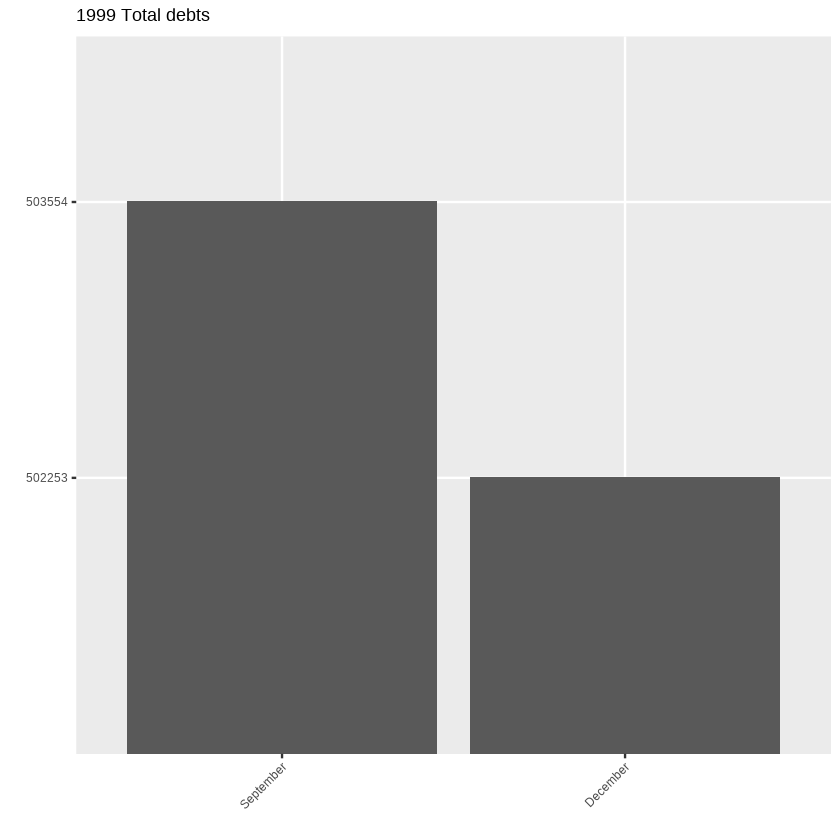

In [30]:

unique(kenya_debt$Year)
colnames(kenya_debt)
kenya_debt <-kenya_debt%>%mutate(Month = factor(Month, levels = c("January", "February", "March", "April", "May", "June", 
                                                                  "July", "August", "September", "October", "November", "December"))) 


kenya_debt%>%filter(Year==1999) %>% ggplot(aes(x=Month, y=as.factor(Total)))+geom_bar(stat = "identity")+
  scale_color_manual(labels = c("Debt increase", "Debt decrease")) +
  labs(color = "Total")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  
  labs(title = "1999 Total debts", x = " ", y = " ")+
  labs(fill = "Decition") 


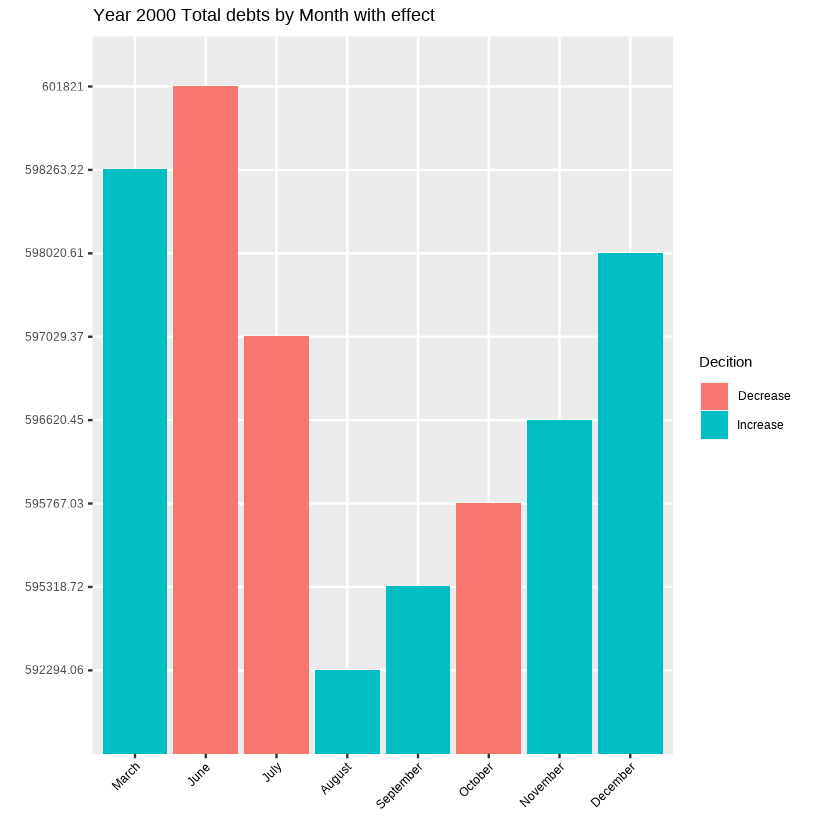

In [31]:
kenya_debt%>%filter(Year==2000)%>% ggplot(aes(x=Month, y=as.factor(Total), fill = Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  scale_color_manual(values = c("black", "red"), labels = c("Debt increase", "Debt decrease")) +
  labs(color = "Per_DOMESTIC")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2000 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

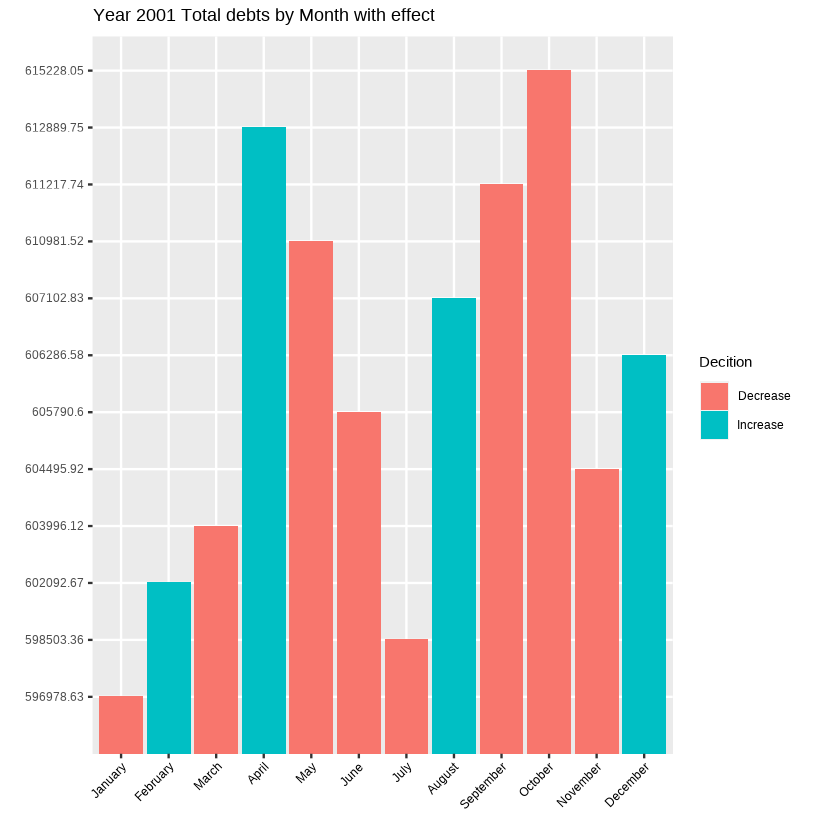

In [32]:
kenya_debt%>%filter(Year==2001)%>% ggplot(aes(x=Month, y=as.factor(Total), 
fill = Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2001 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

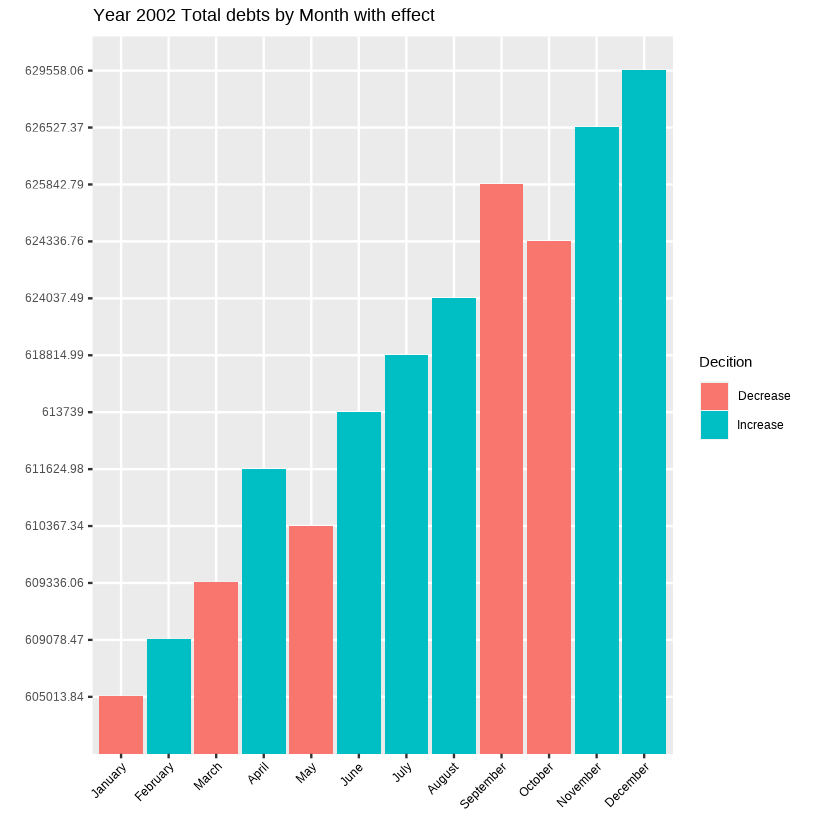

In [33]:
kenya_debt%>%filter(Year==2002)%>% ggplot(aes(x=Month, y=as.factor(Total),
                      fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2002 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

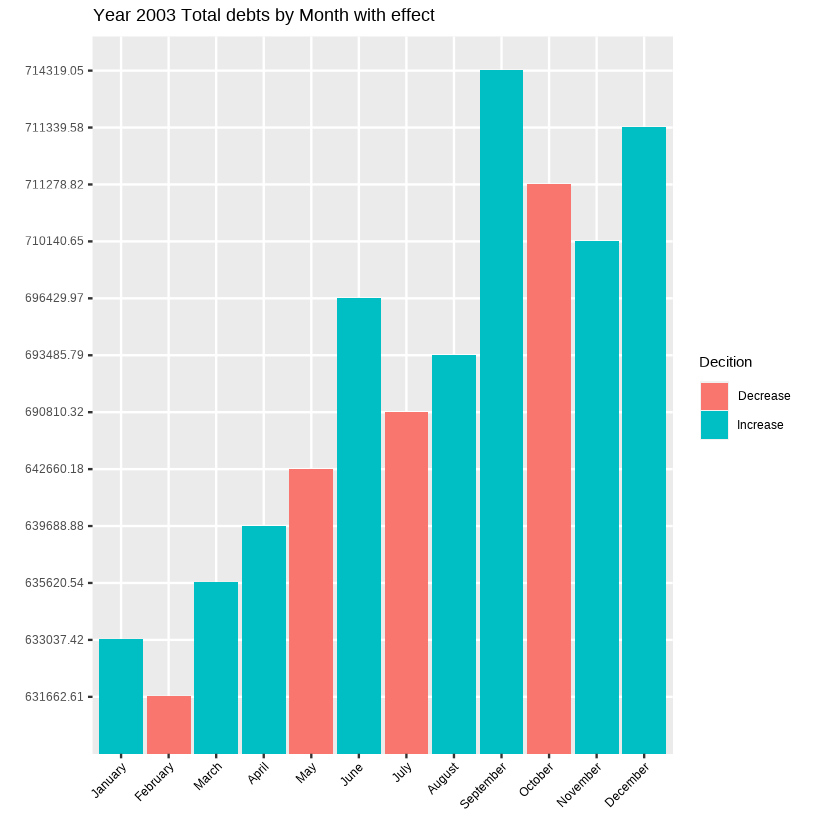

In [34]:
kenya_debt%>%filter(Year==2003)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2003 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

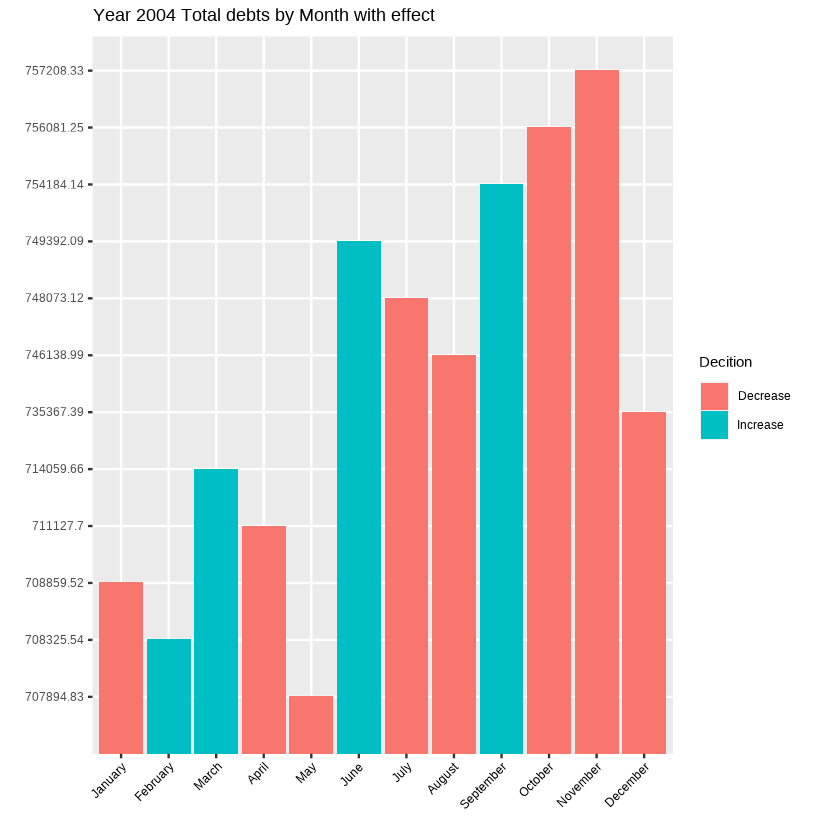

In [35]:
kenya_debt%>%filter(Year==2004)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2004 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

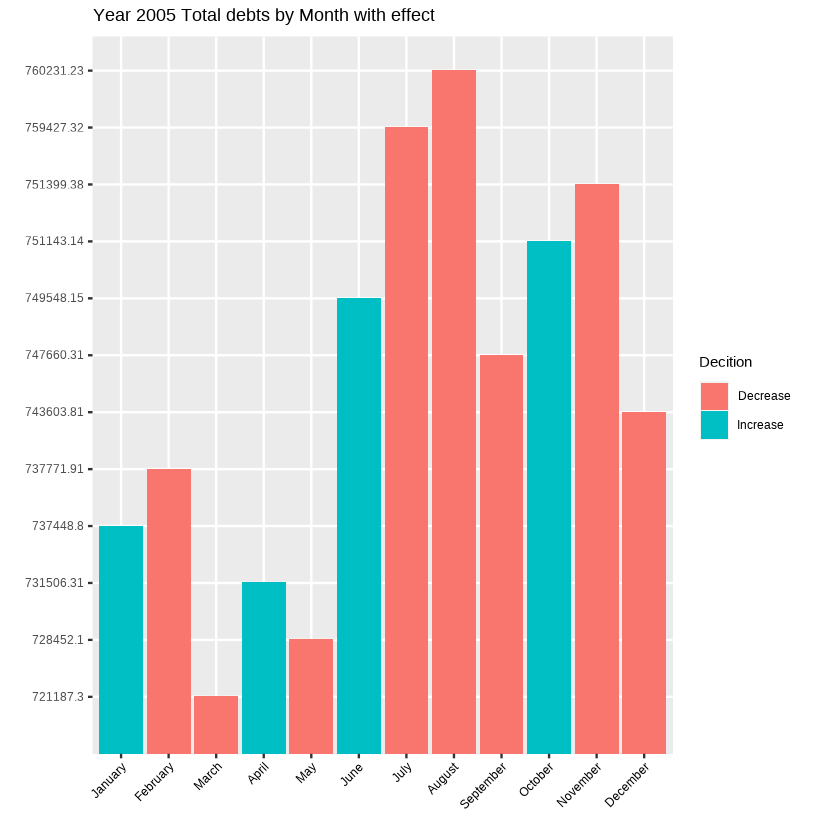

In [36]:
kenya_debt%>%filter(Year==2005)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2005 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

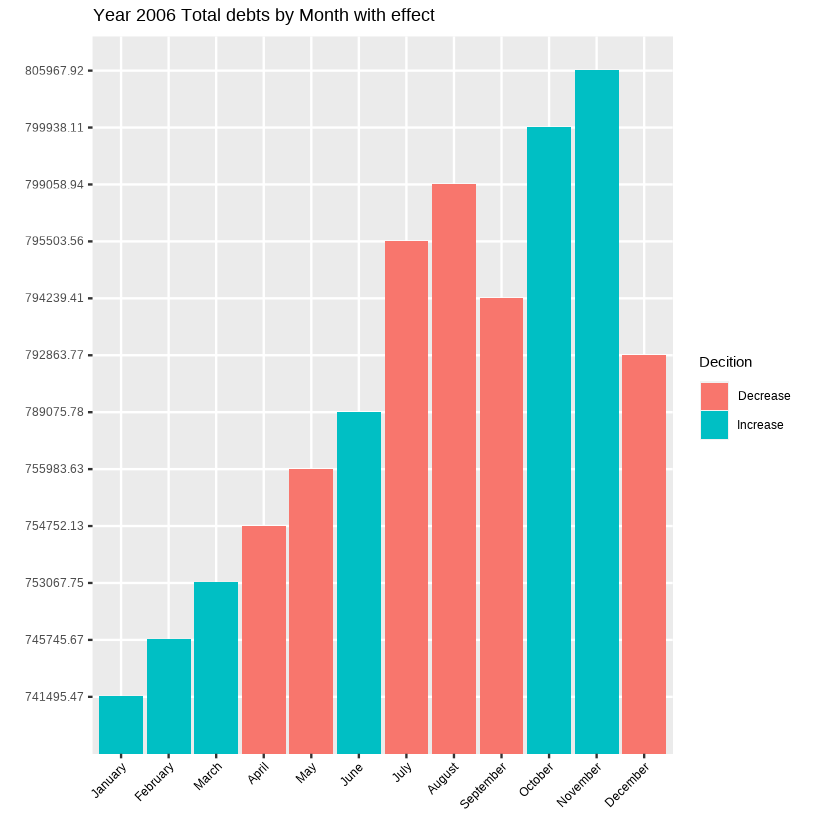

In [37]:
kenya_debt%>%filter(Year==2006)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2006 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

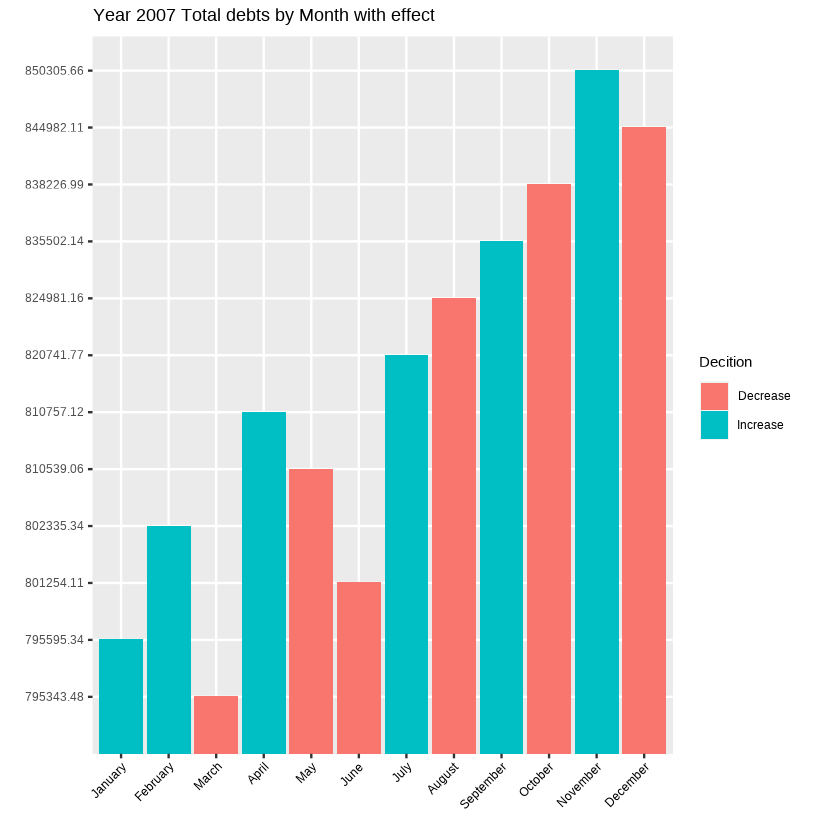

In [38]:
kenya_debt%>%filter(Year==2007)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2007 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

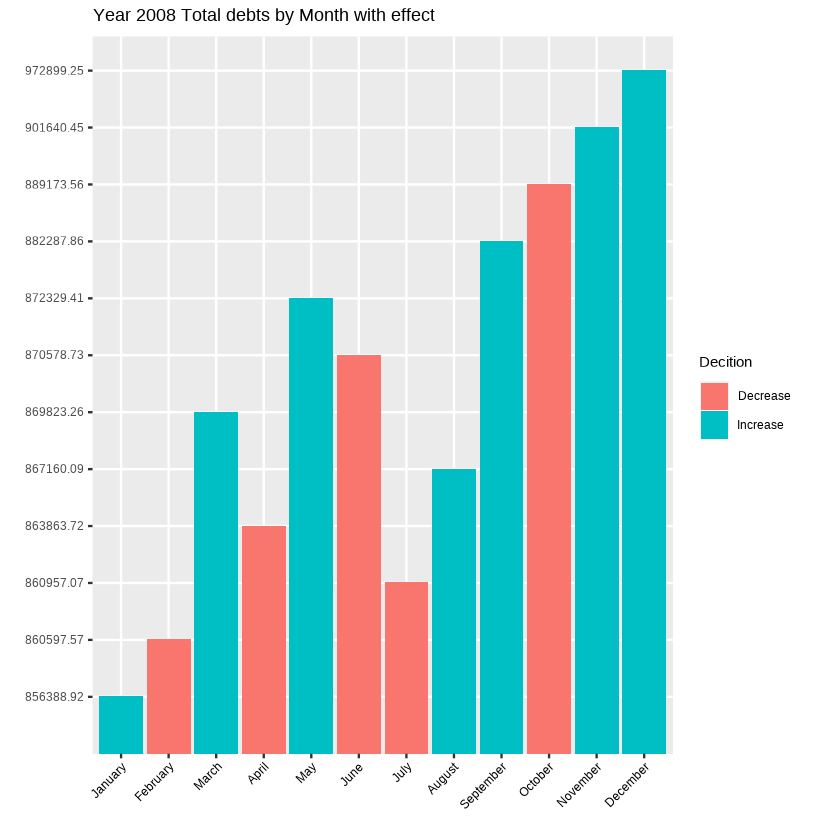

In [39]:
kenya_debt%>%filter(Year==2008)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2008 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")  

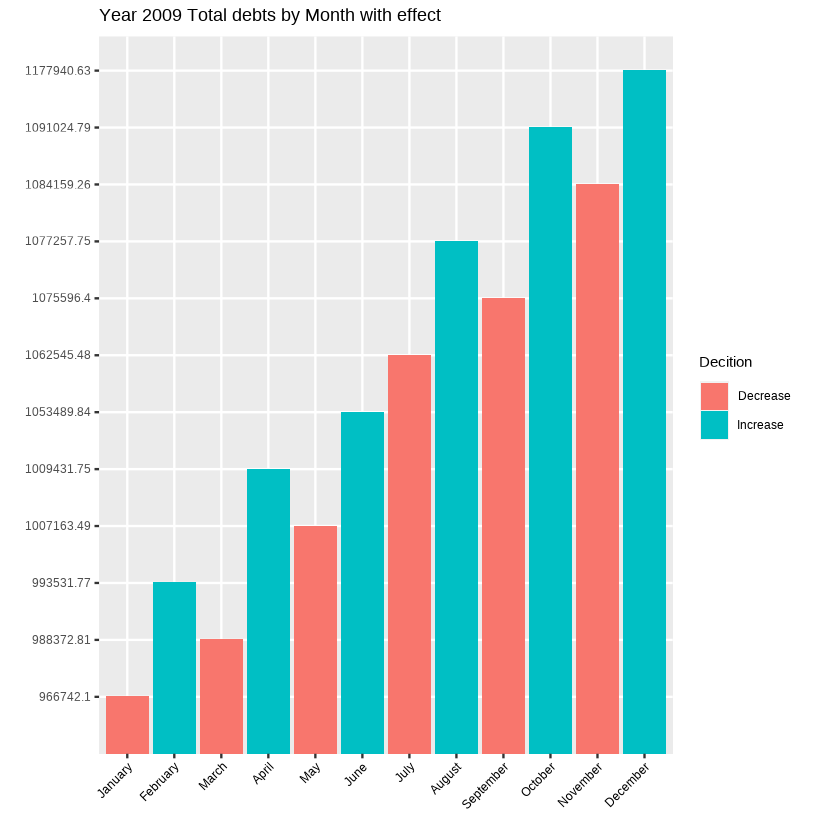

In [40]:
kenya_debt%>%filter(Year==2009)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2009 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

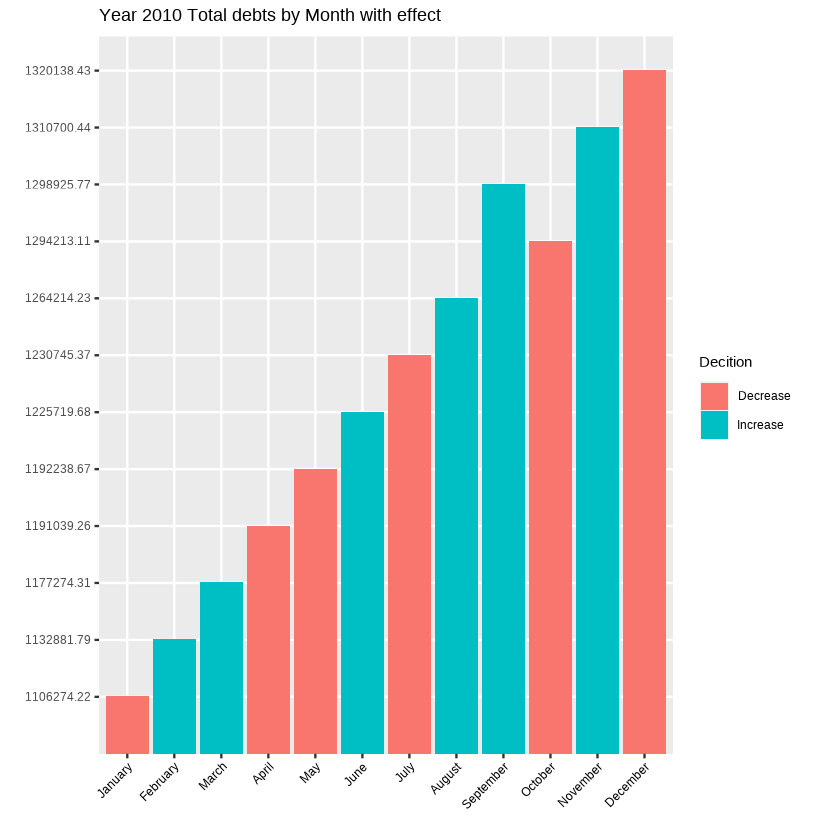

In [41]:
kenya_debt%>%filter(Year==2010)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2010 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

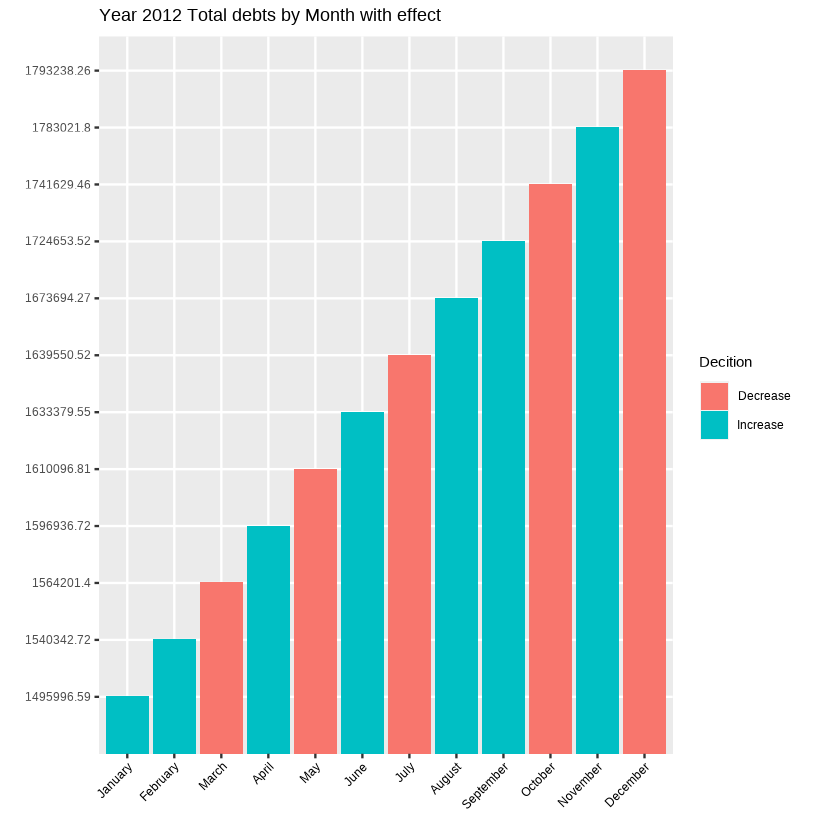

In [42]:
kenya_debt%>%filter(Year==2012)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2012 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")   

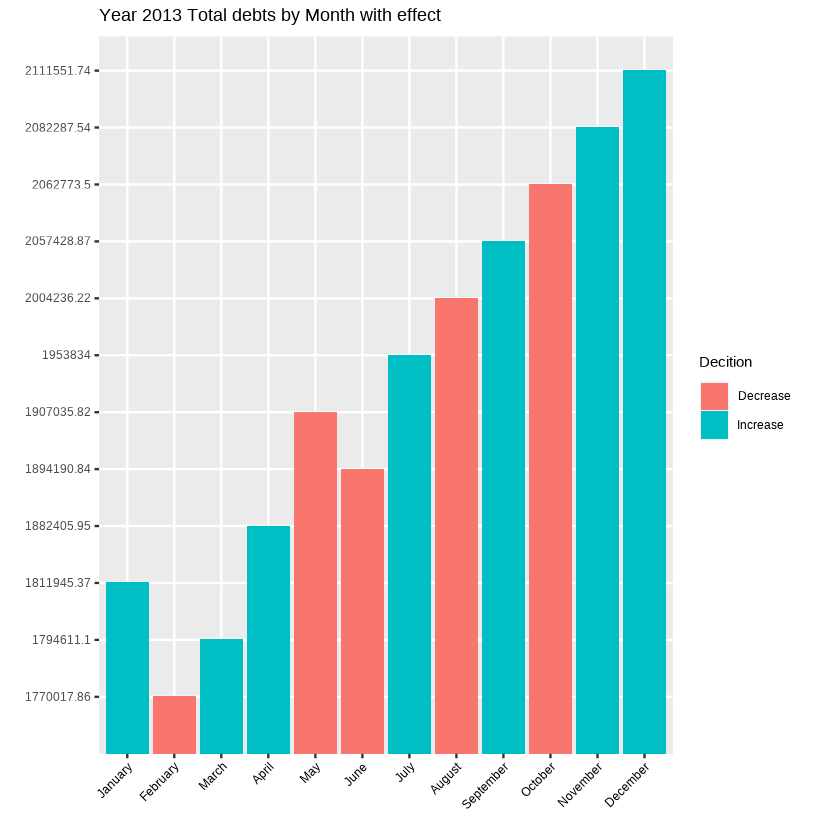

In [43]:
kenya_debt%>%filter(Year==2013)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2013 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

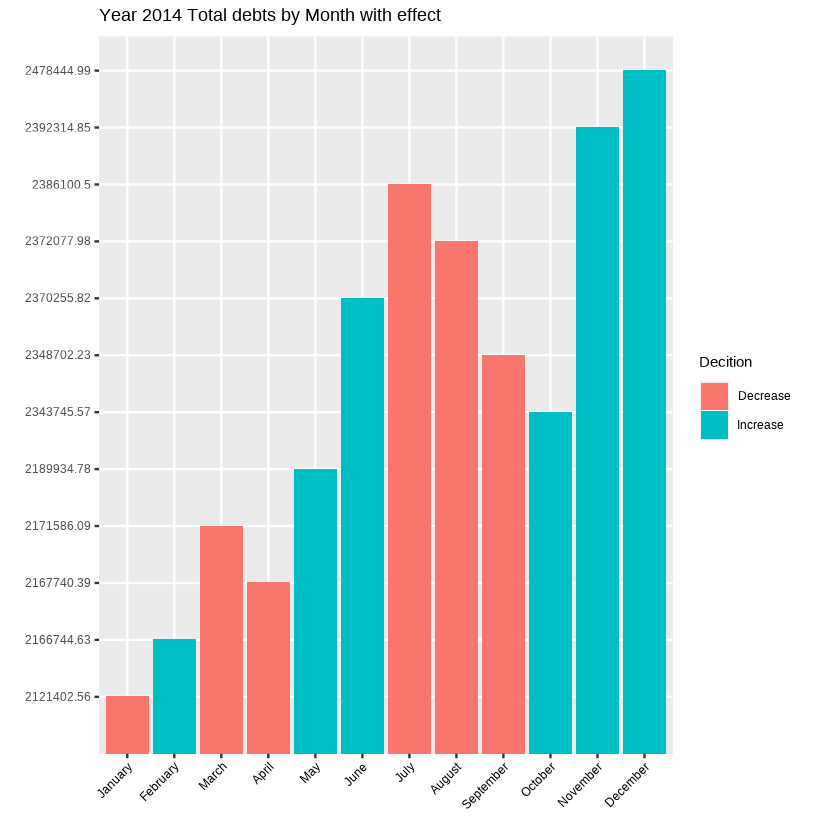

In [44]:
kenya_debt%>%filter(Year==2014)%>% ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2014 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

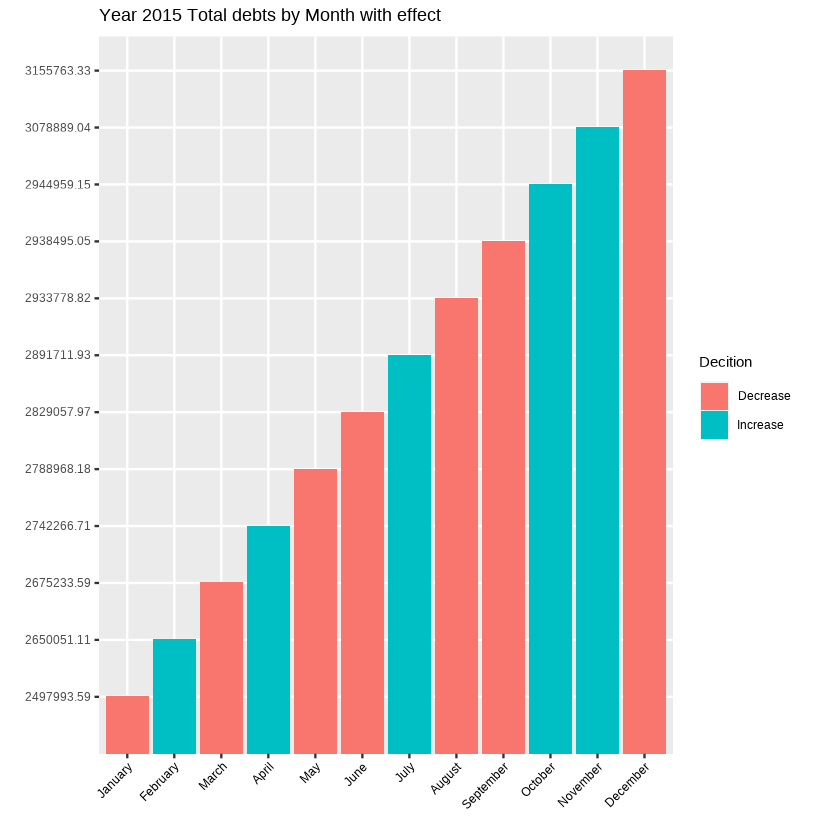

In [45]:
kenya_debt%>%filter(Year==2015)%>% ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2015 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")

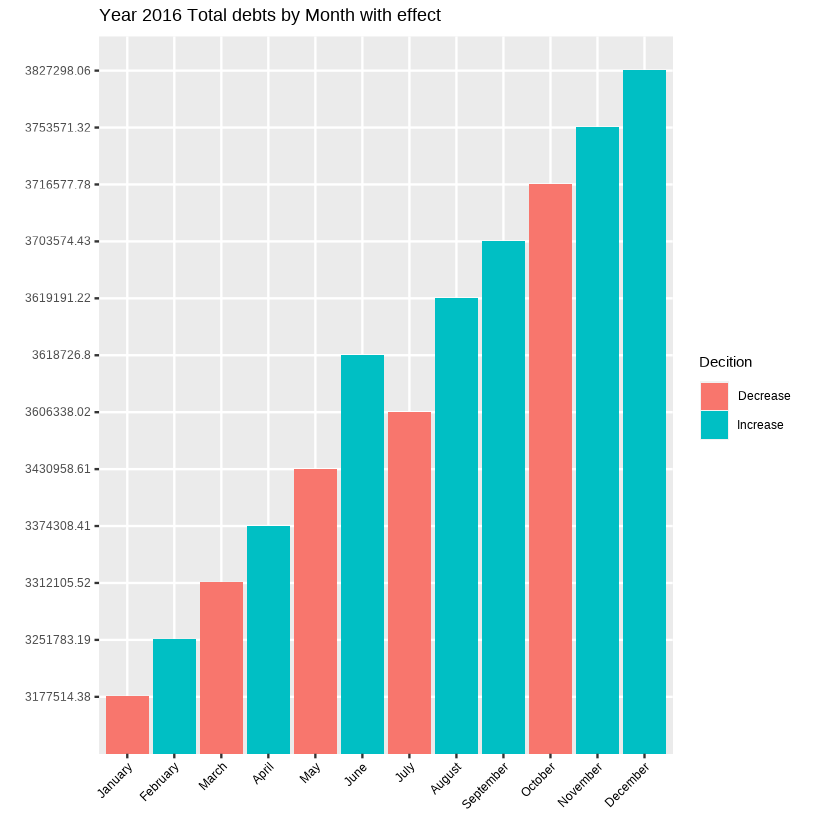

In [46]:
kenya_debt%>%filter(Year==2016)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2016 Total debts by Month with effect", x = " ", y = " ") +
  labs(fill = "Decition") 

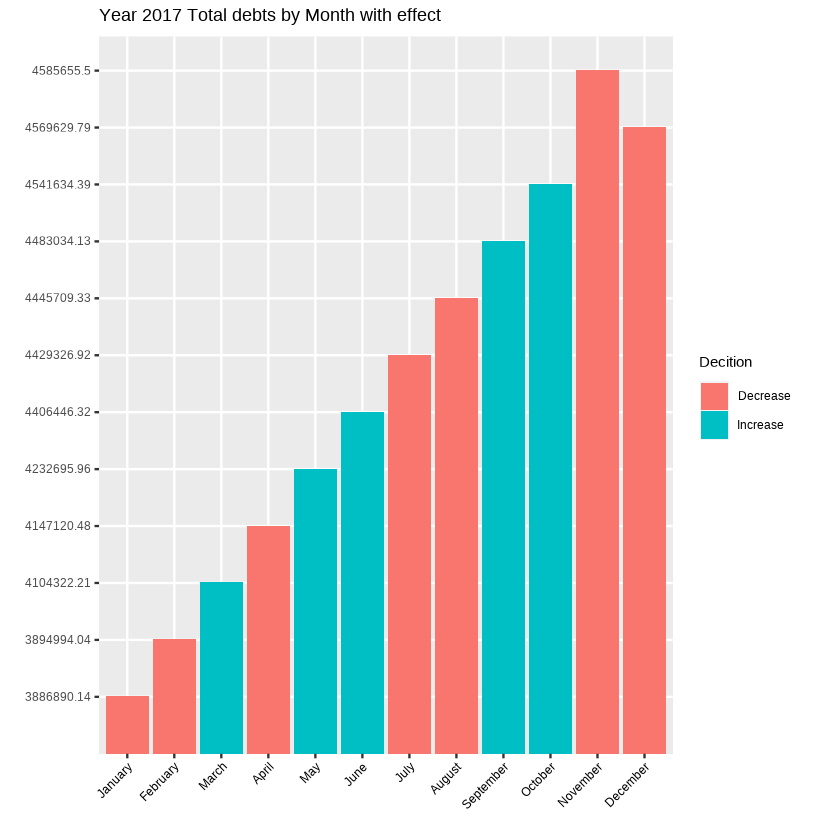

In [47]:
kenya_debt%>%filter(Year==2017)%>% ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2017 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")   


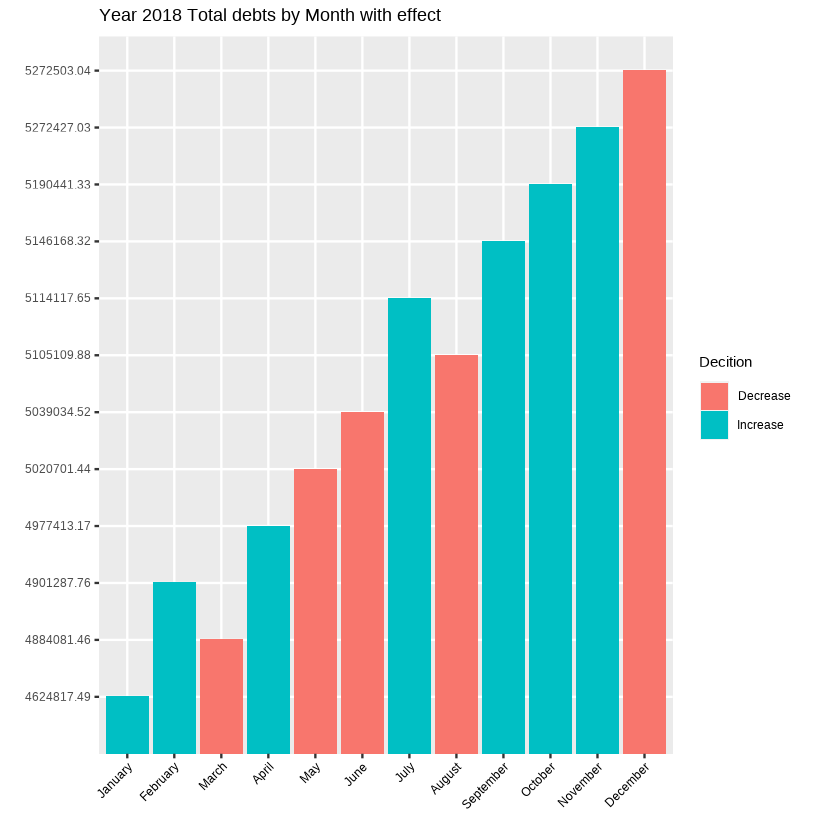

In [48]:
kenya_debt%>%filter(Year==2018)%>%ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2018 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")   

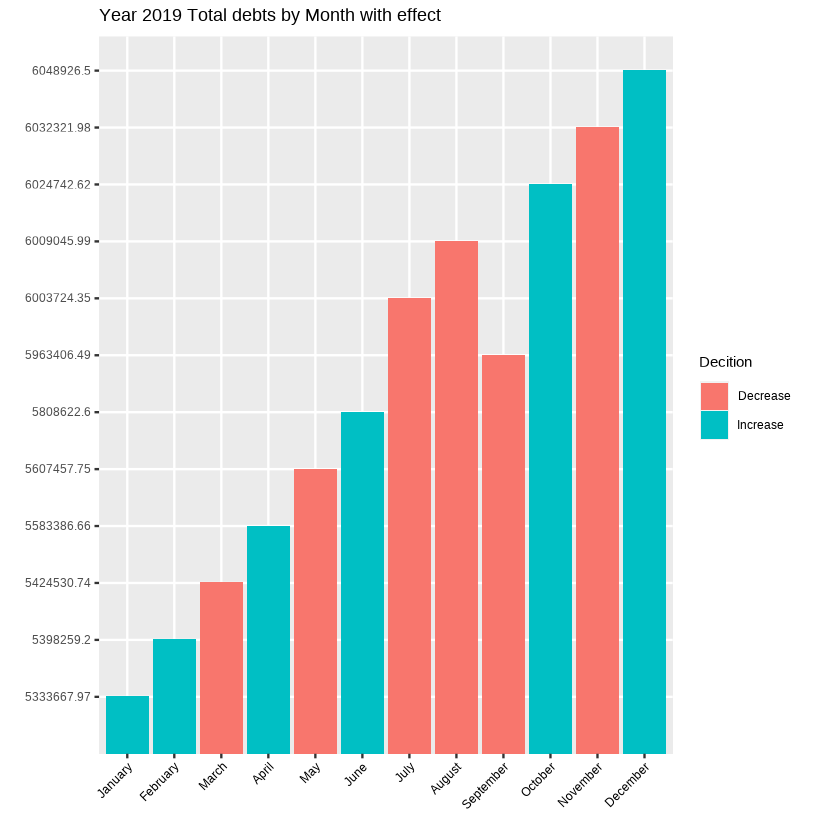

In [49]:
kenya_debt%>%filter(Year==2019)%>% ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2019 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")

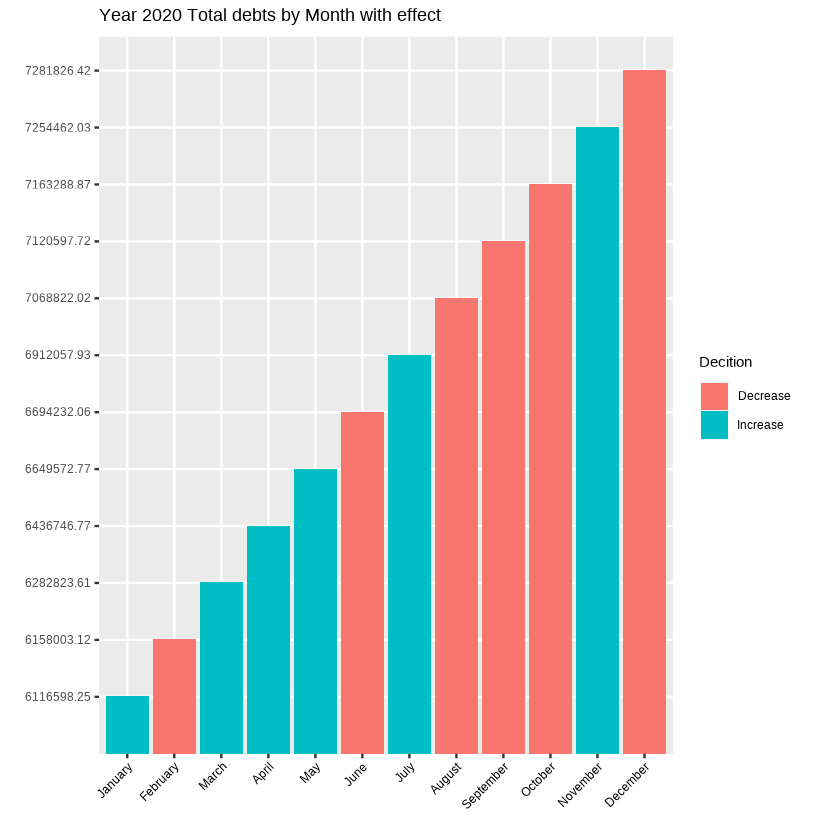

In [50]:
kenya_debt%>%filter(Year==2020)%>% ggplot(aes(x= Month, y=as.factor(Total),
  fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

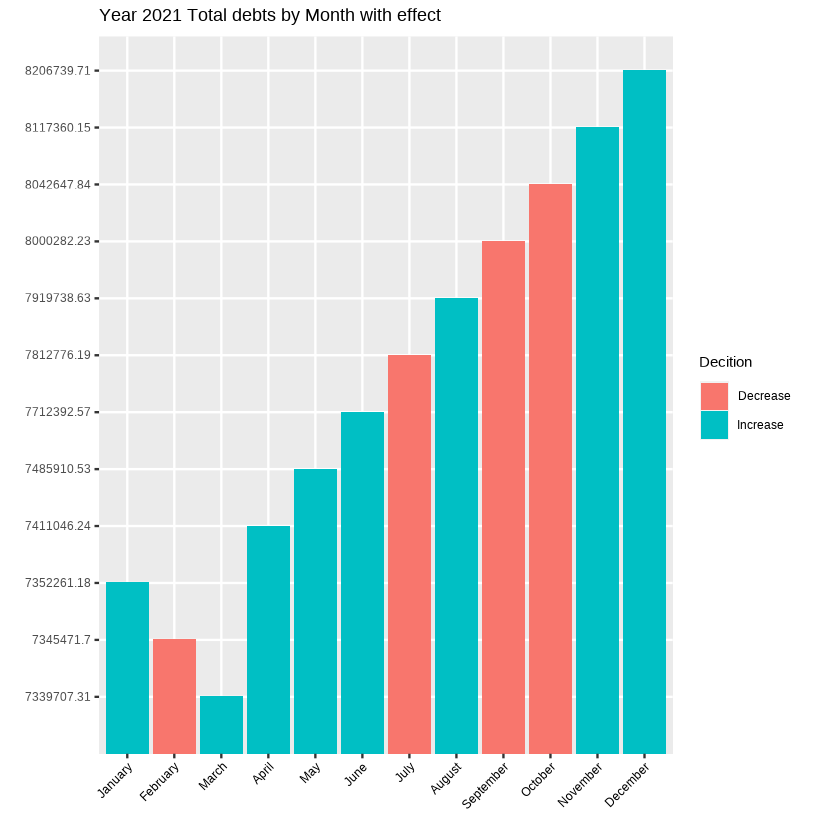

In [51]:
kenya_debt%>%filter(Year==2021)%>% ggplot(aes(x=Month, y=as.factor(Total),
fill= Decsion_icrease_decrease_TOTAL))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2021 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

# Domestic Debt BY MONTH

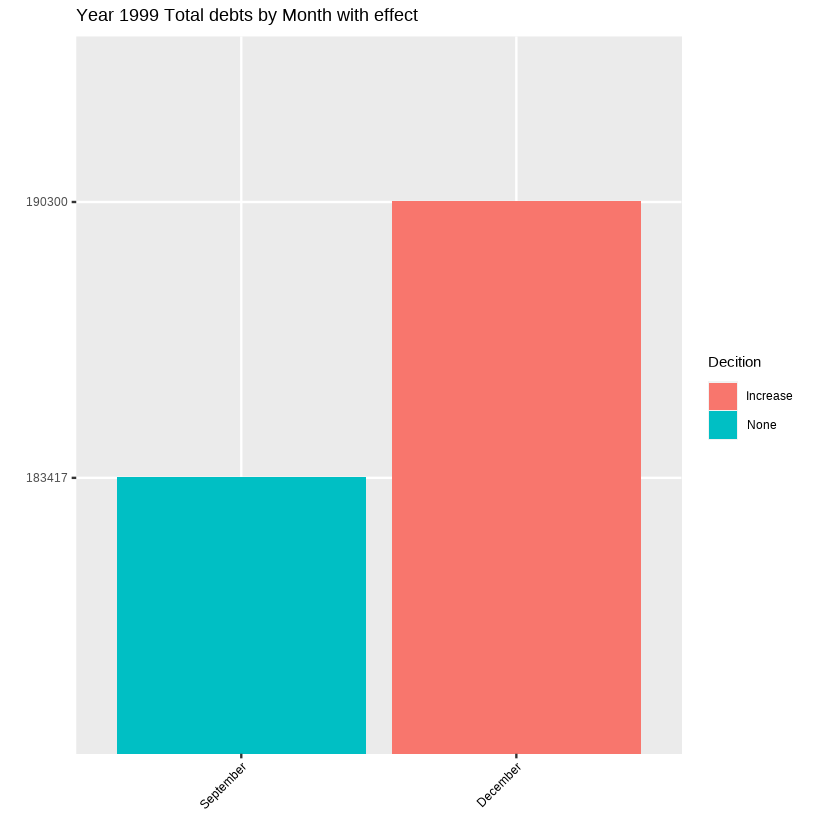

In [52]:

kenya_debt%>%filter(Year==1999) %>% ggplot(aes(x=Month, y= as.factor(`Domestic Debt`), 
fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 1999 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

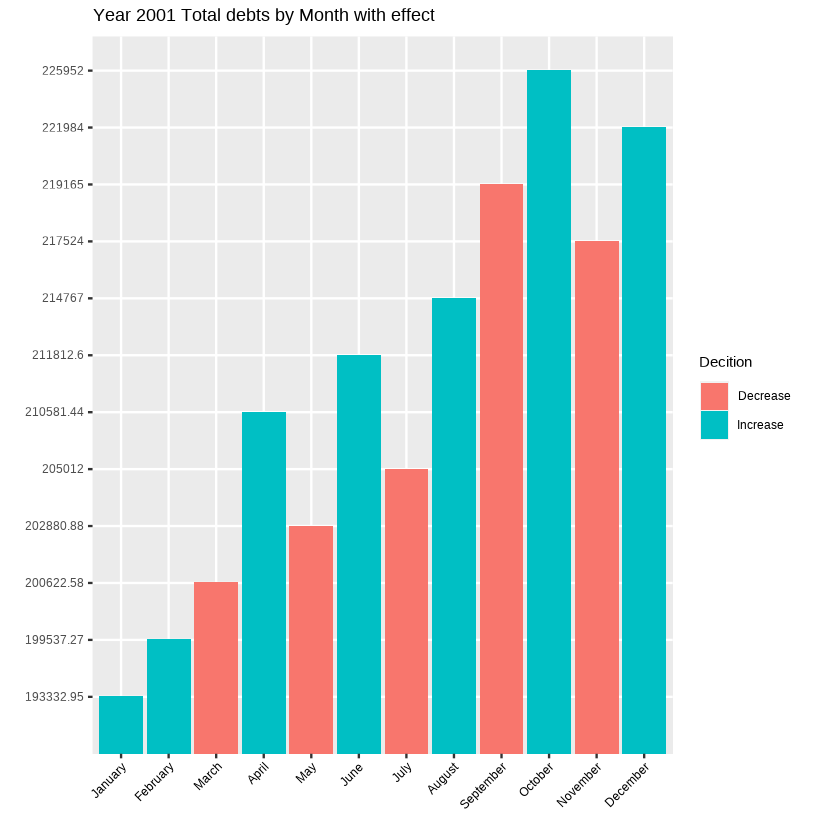

In [53]:
          
kenya_debt%>%filter(Year==2001)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2001 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

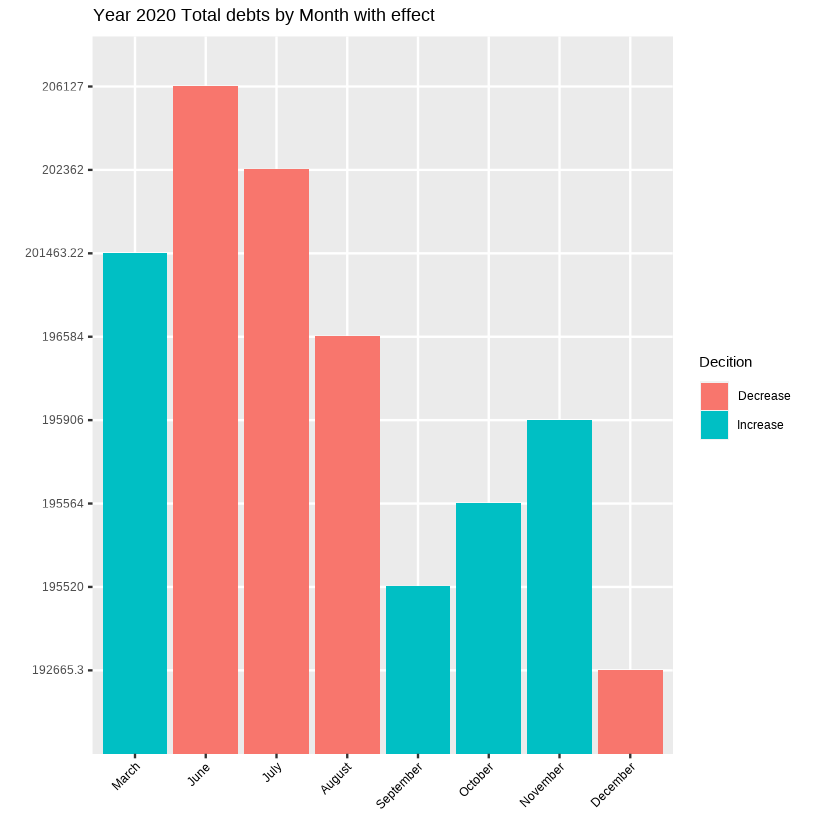

In [54]:

kenya_debt%>%filter(Year==2000)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")   

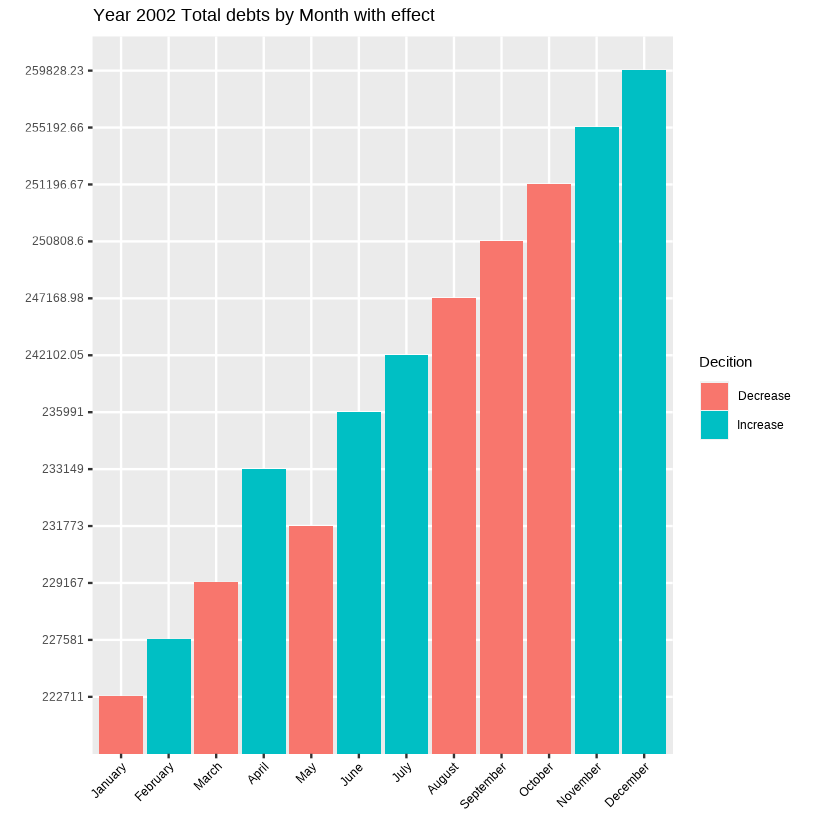

In [55]:
kenya_debt%>%filter(Year==2002)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2002 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

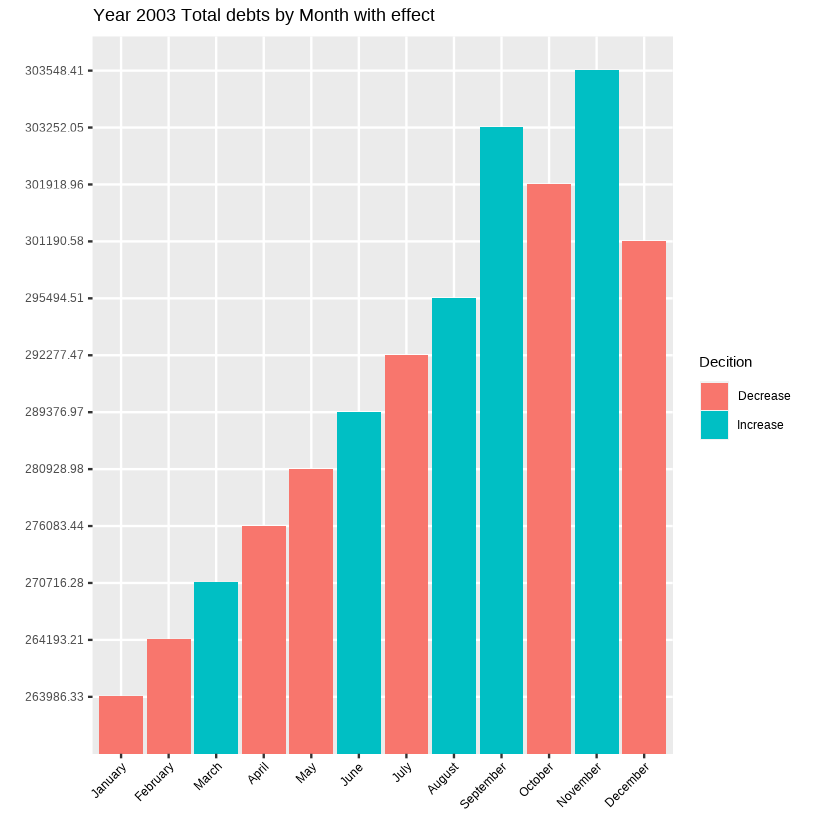

In [56]:
kenya_debt%>%filter(Year==2003)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2003 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

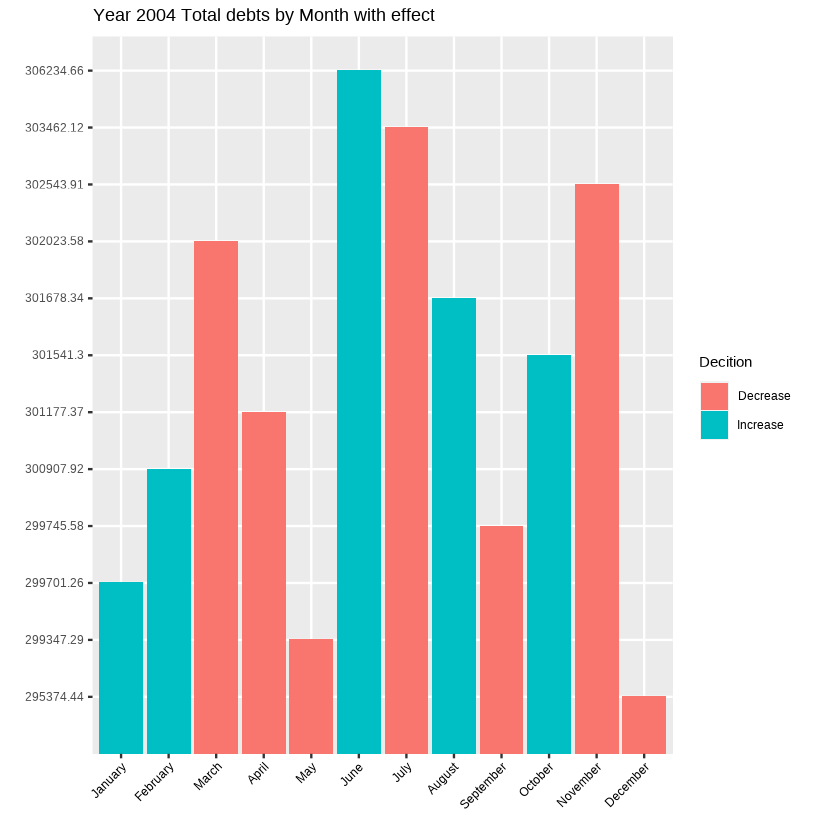

In [57]:
kenya_debt%>%filter(Year==2004)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2004 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

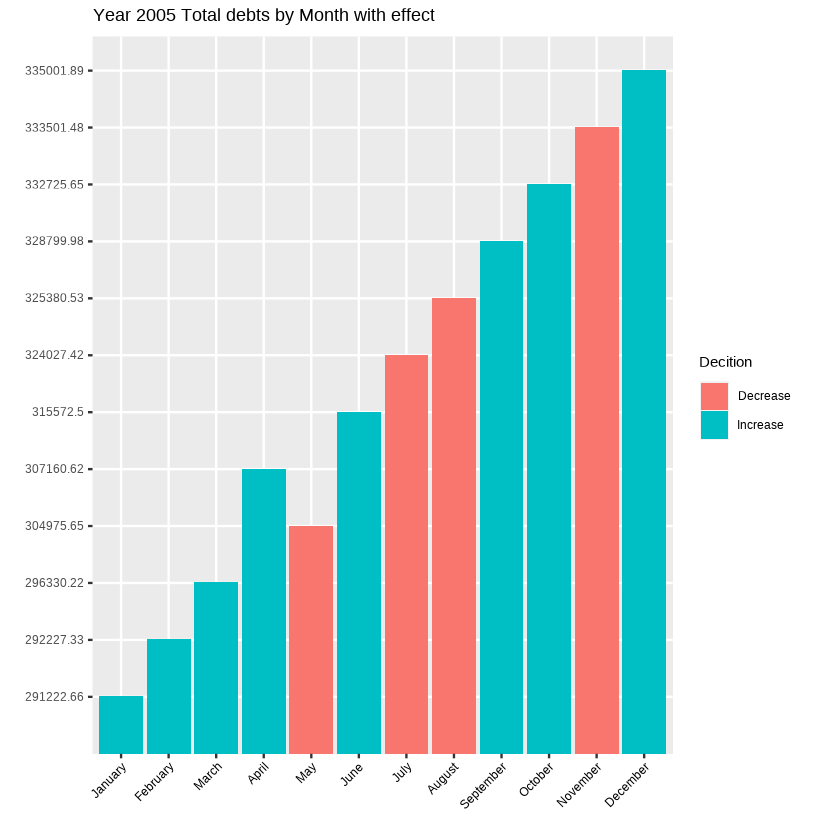

In [58]:
kenya_debt%>%filter(Year==2005)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2005 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

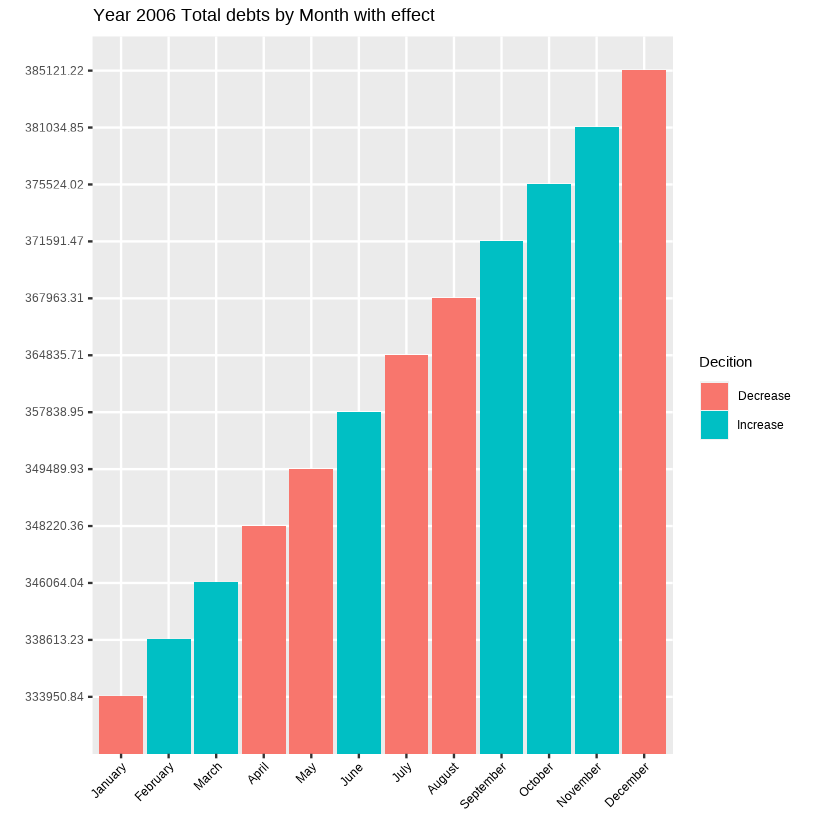

In [59]:
kenya_debt%>%filter(Year==2006)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2006 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

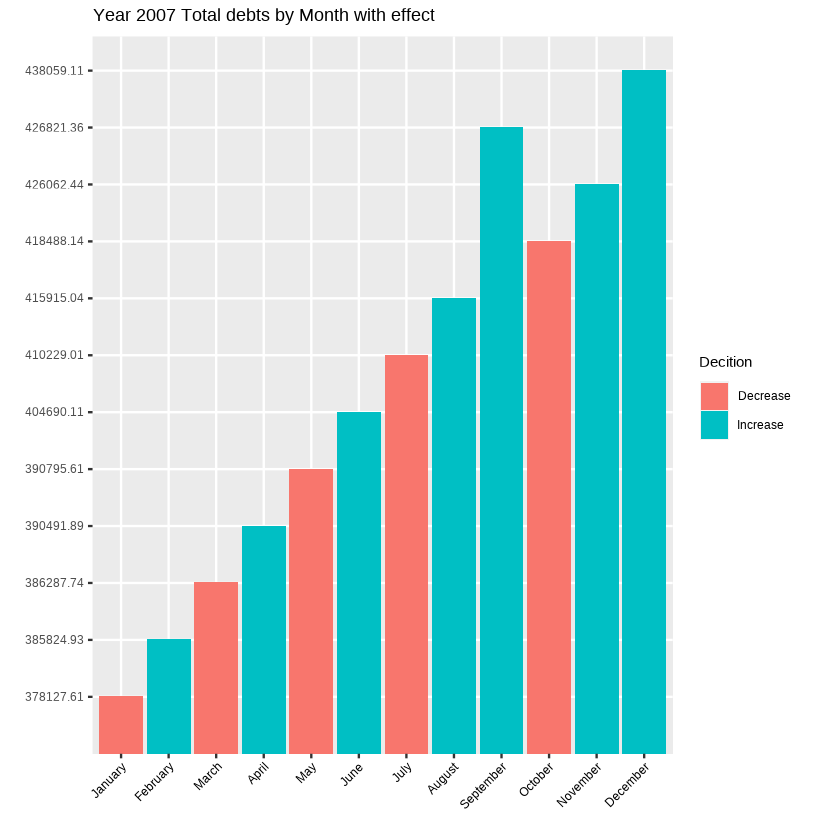

In [60]:
kenya_debt%>%filter(Year==2007)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2007 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

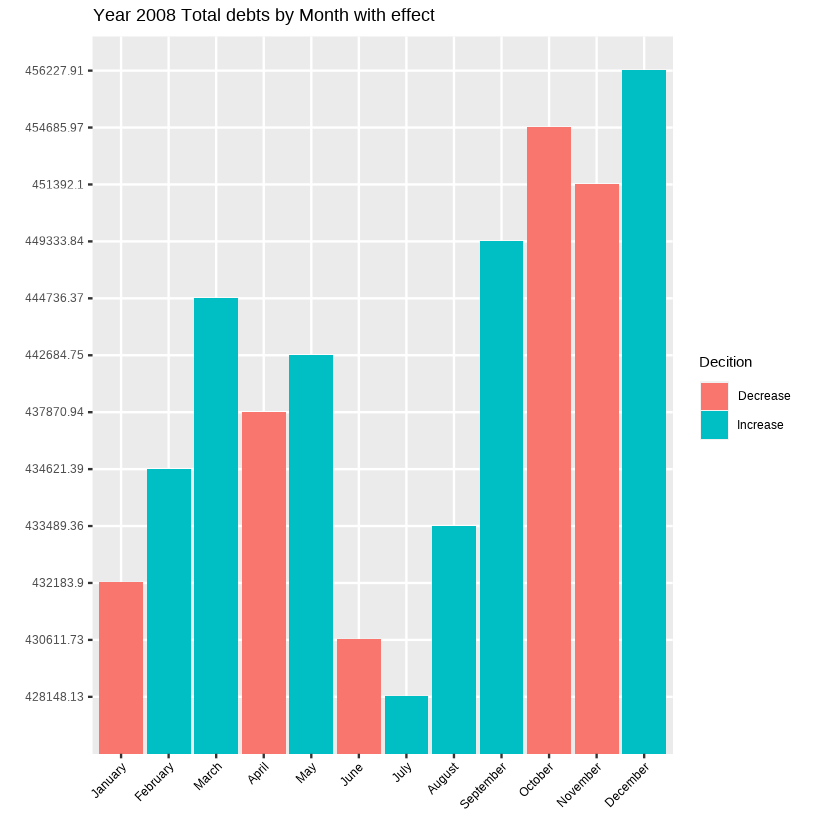

In [61]:
kenya_debt%>%filter(Year==2008)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2008 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

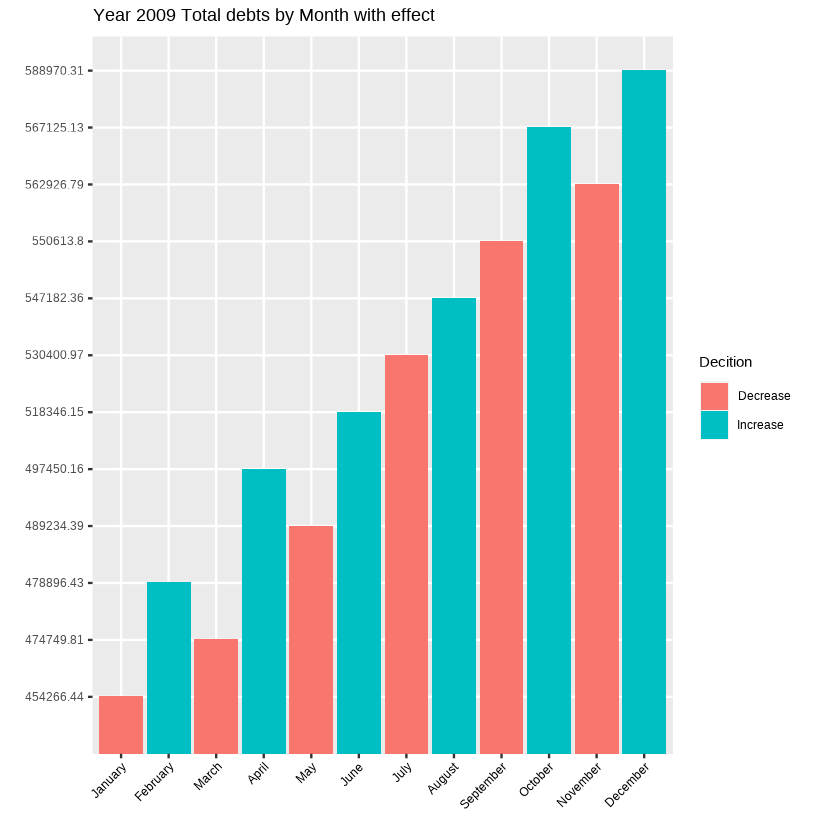

In [62]:
kenya_debt%>%filter(Year==2009)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2009 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

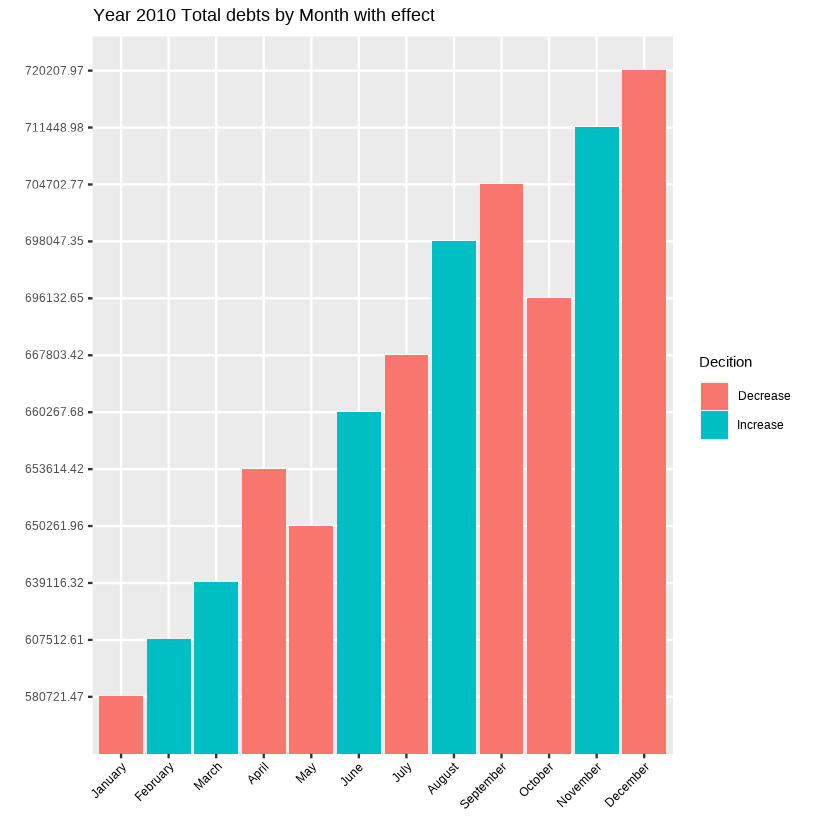

In [63]:
kenya_debt%>%filter(Year==2010)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2010 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

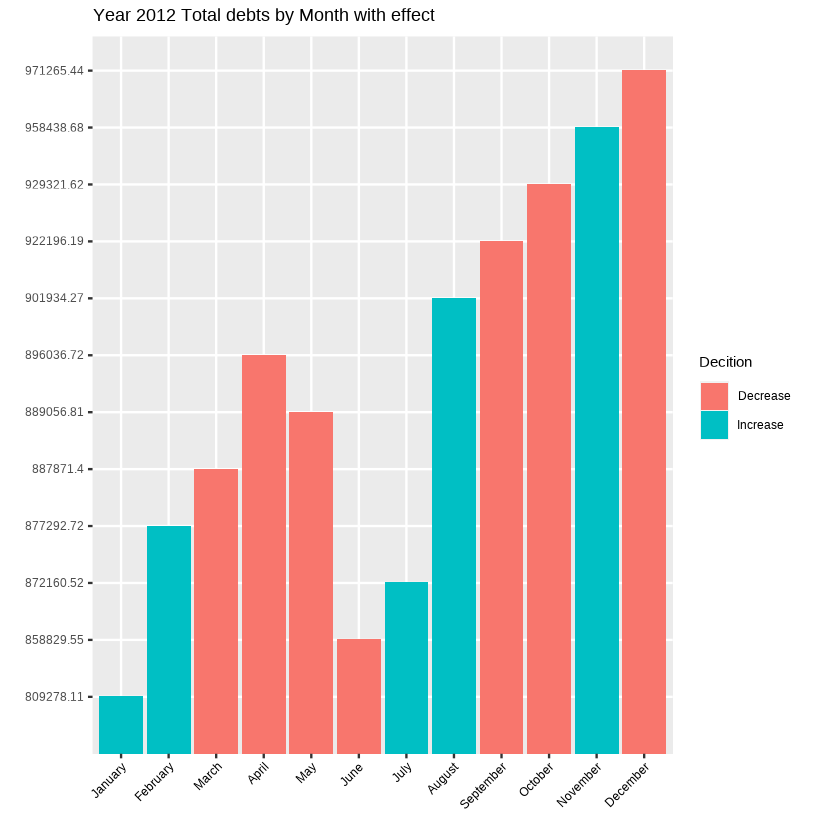

In [64]:
kenya_debt%>%filter(Year==2012)%>% ggplot(aes(x=Month, y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2012 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

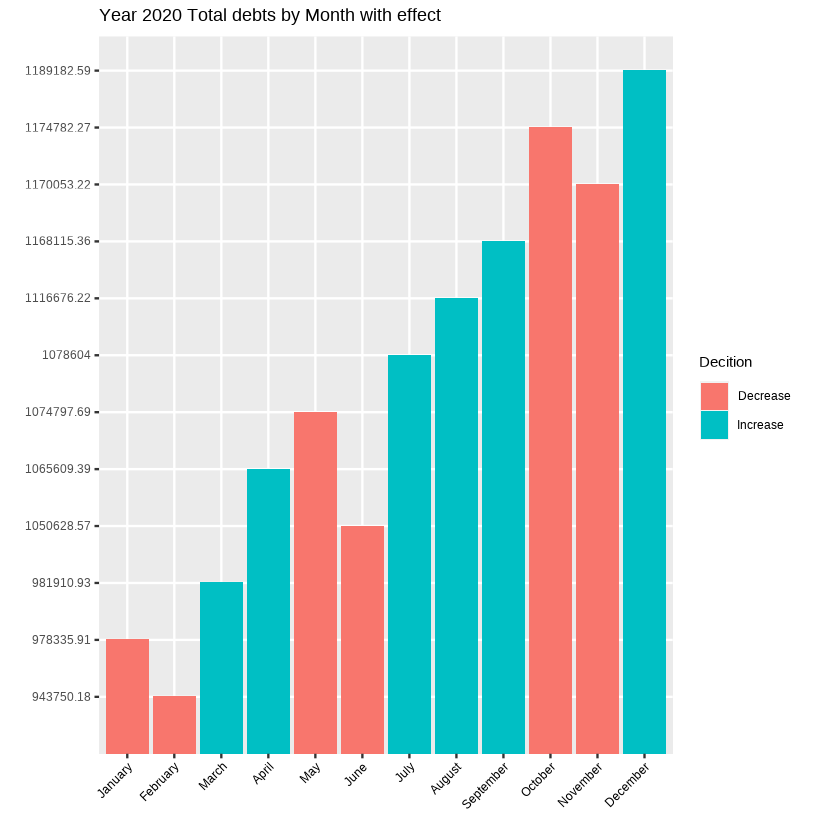

In [65]:
kenya_debt%>%filter(Year==2013)%>% ggplot(aes(x=Month, y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

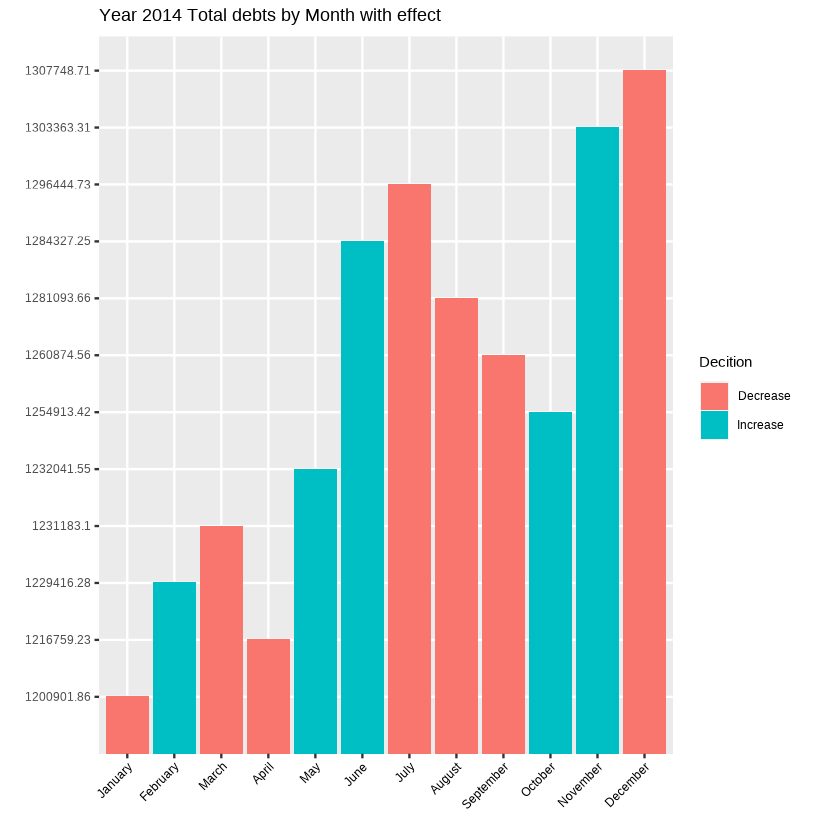

In [66]:
kenya_debt%>%filter(Year==2014)%>% ggplot(aes(x=Month, y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2014 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

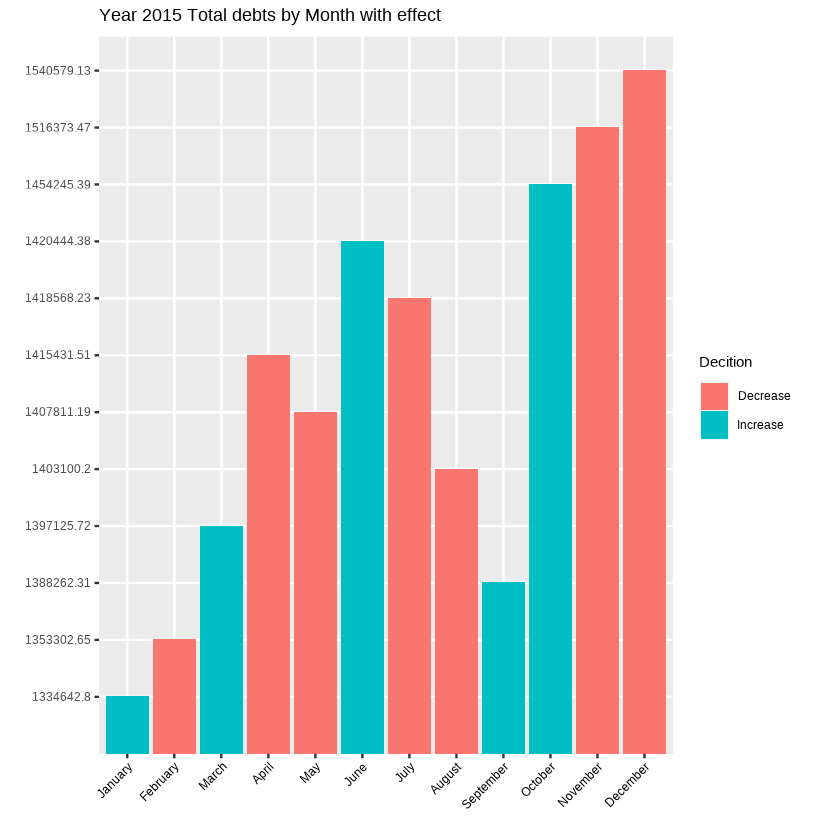

In [67]:
kenya_debt%>%filter(Year==2015)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2015 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

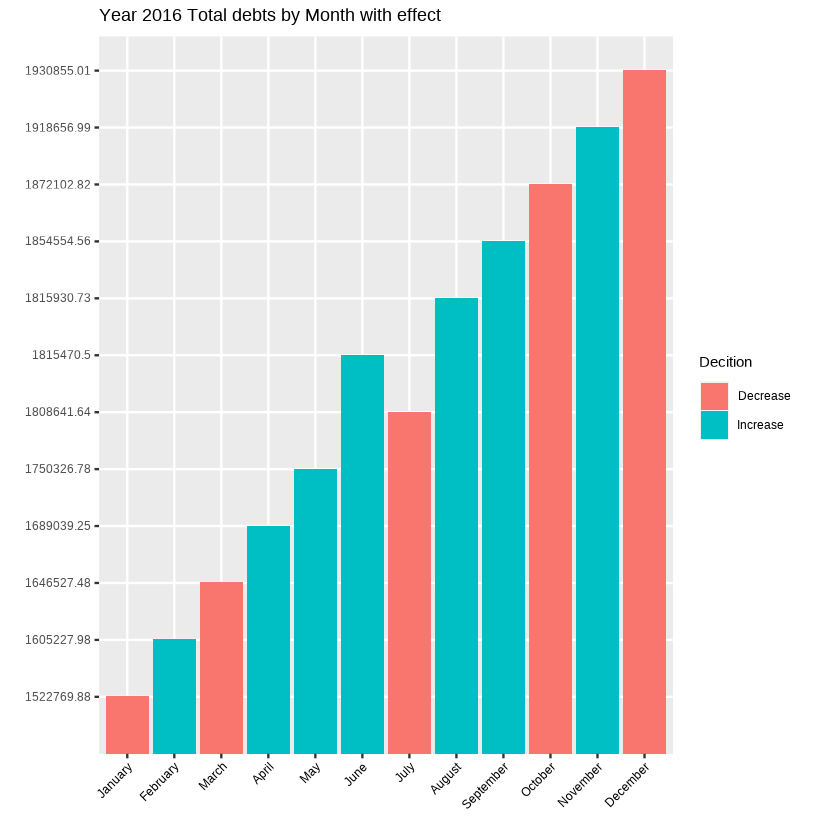

In [68]:
kenya_debt%>%filter(Year==2016)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2016 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

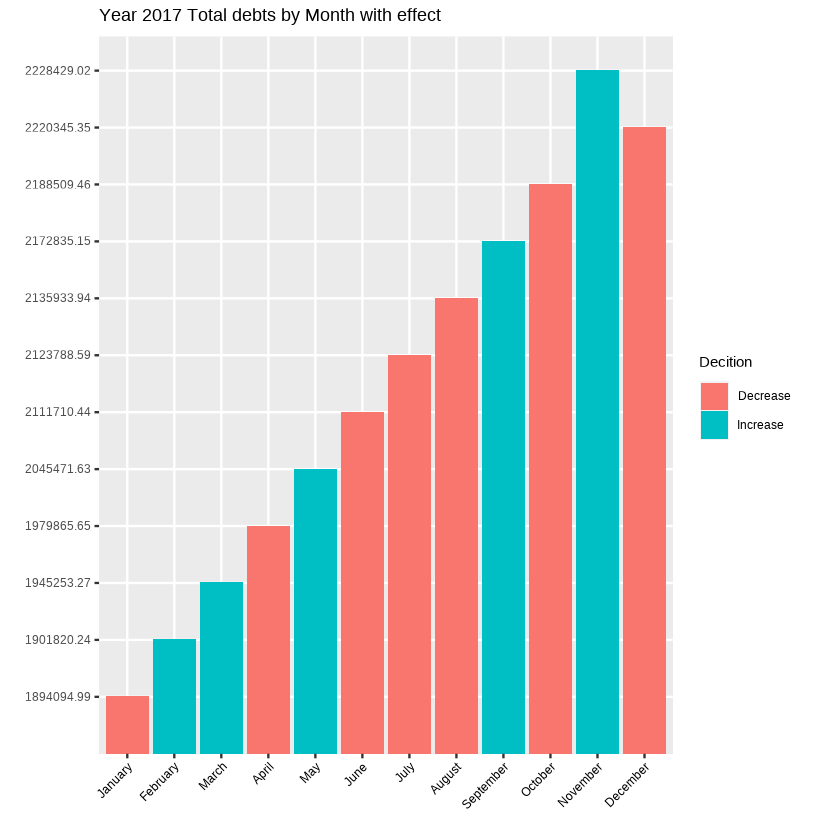

In [69]:

kenya_debt%>%filter(Year==2017)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2017 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

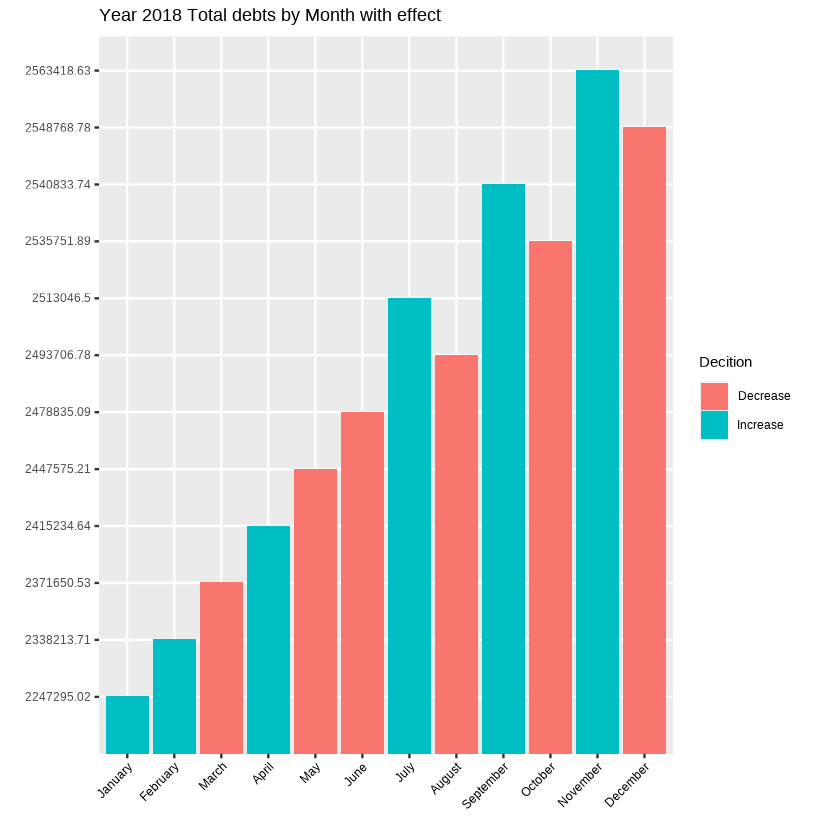

In [70]:
kenya_debt%>%filter(Year==2018)%>% ggplot(aes(x=Month, y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2018 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

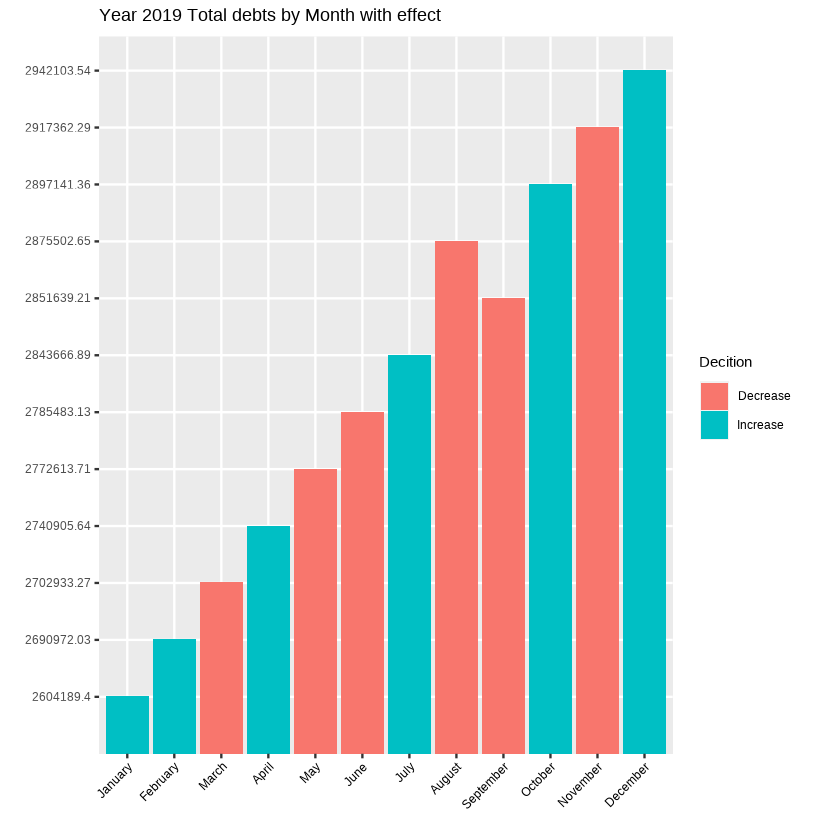

In [71]:
kenya_debt%>%filter(Year==2019)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2019 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

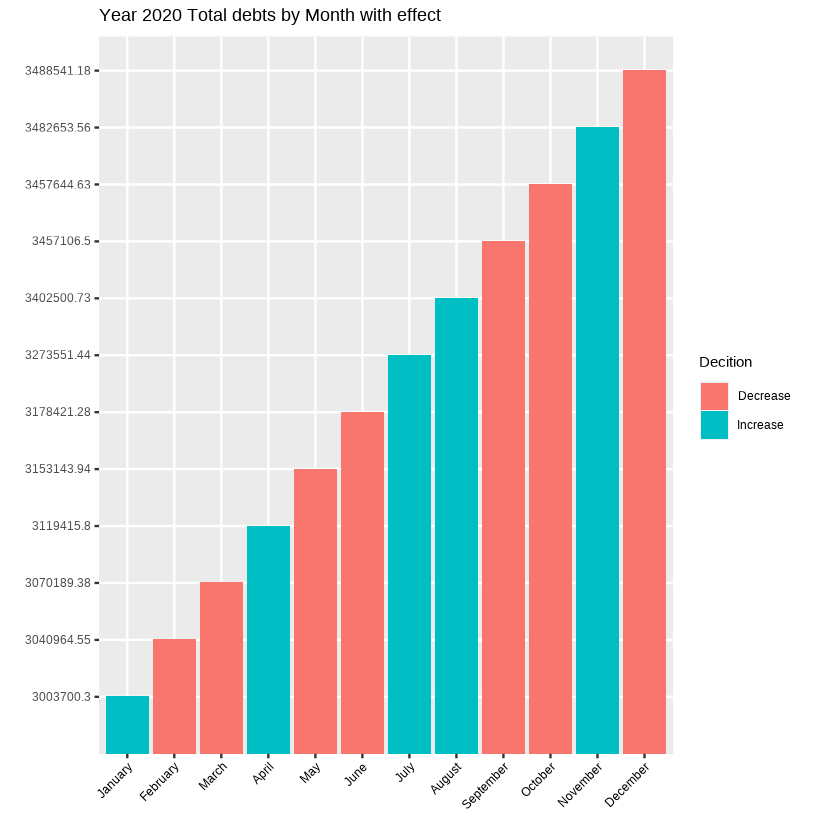

In [72]:
                                              
kenya_debt%>%filter(Year==2020)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

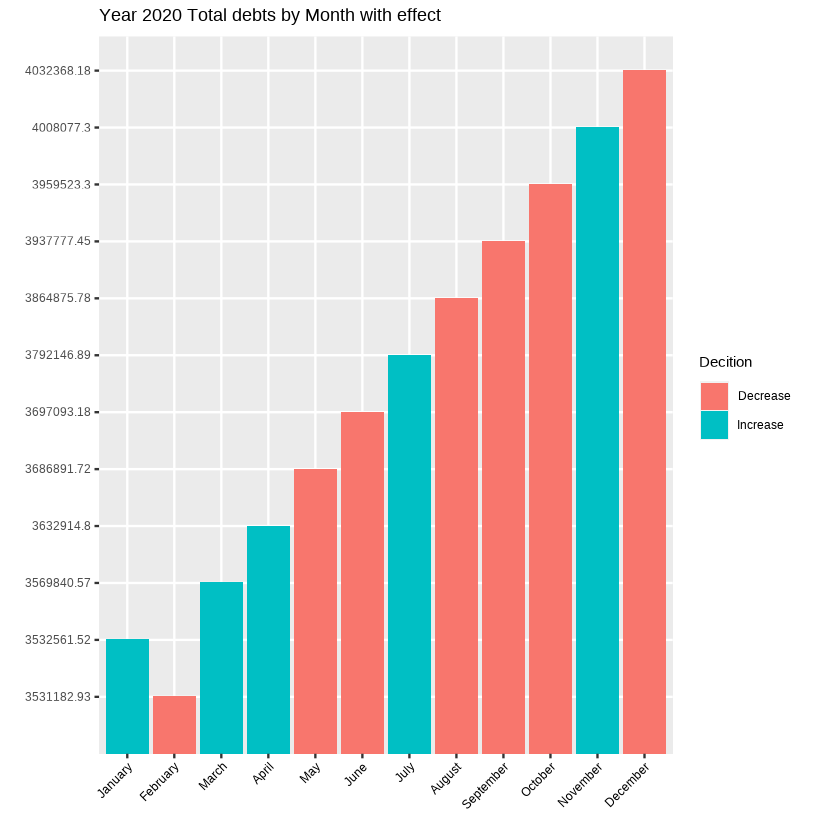

In [73]:
kenya_debt%>%filter(Year==2021)%>% ggplot(aes(x=Month,y= as.factor(`Domestic Debt`), 
  fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

# External Debt BY MONTH

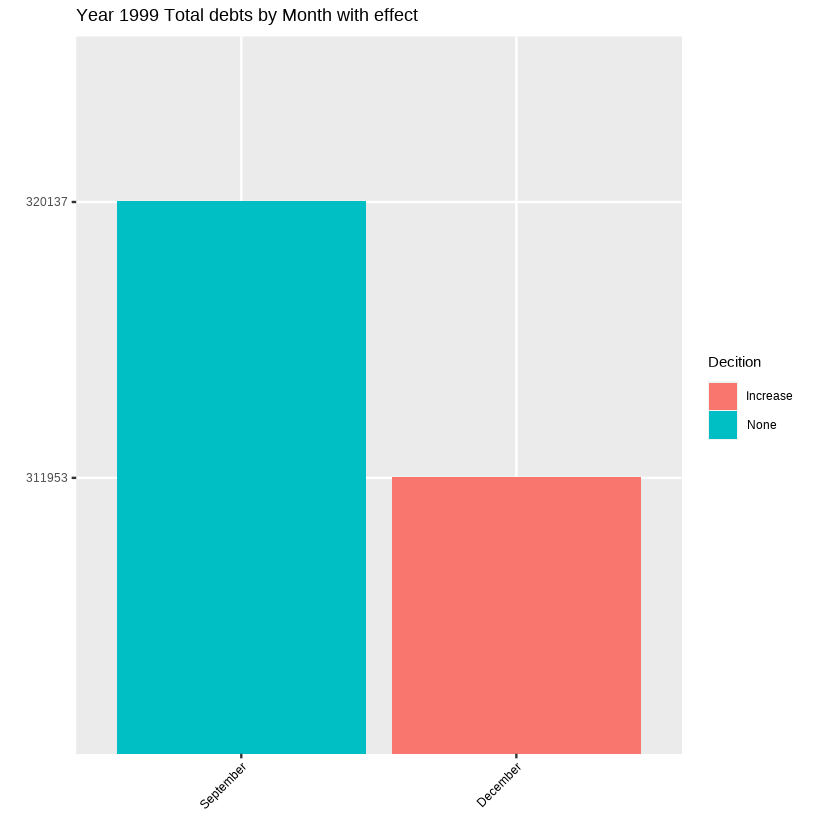

In [74]:

kenya_debt%>%filter(Year==1999) %>% ggplot(aes(x=Month, y= as.factor(`External Debt`), 
                                               fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 1999 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

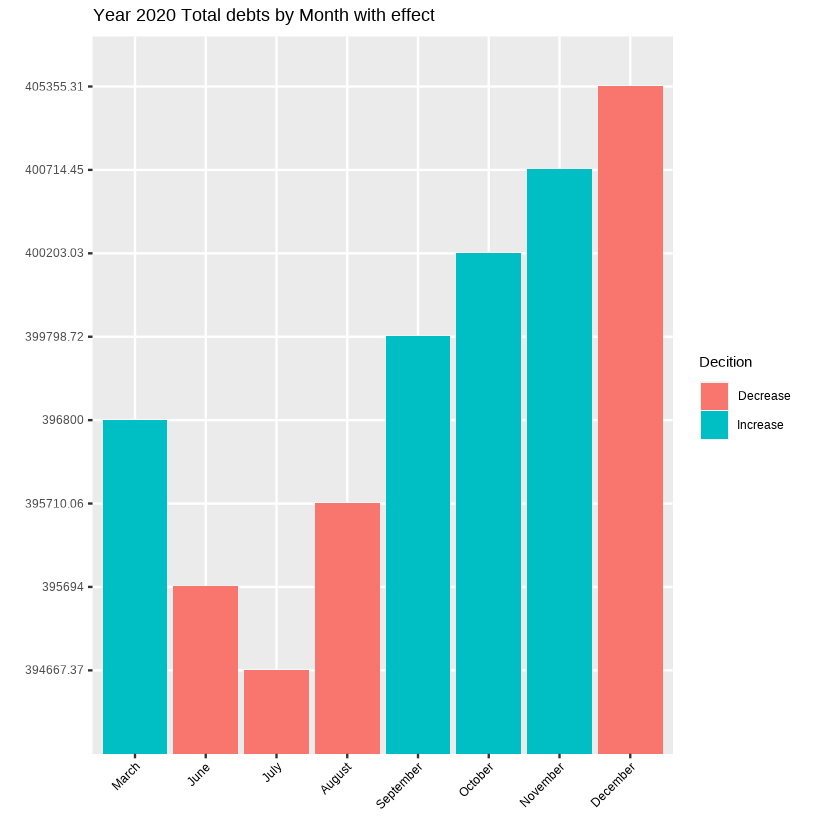

In [75]:
kenya_debt%>%filter(Year==2000)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")                                              

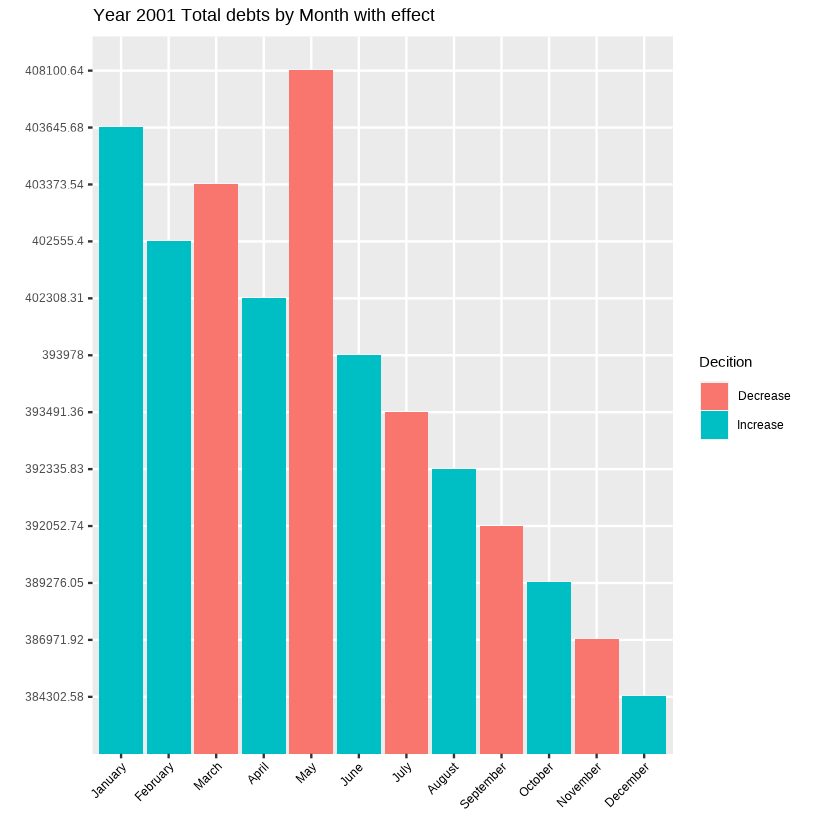

In [76]:
kenya_debt%>%filter(Year==2001)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2001 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

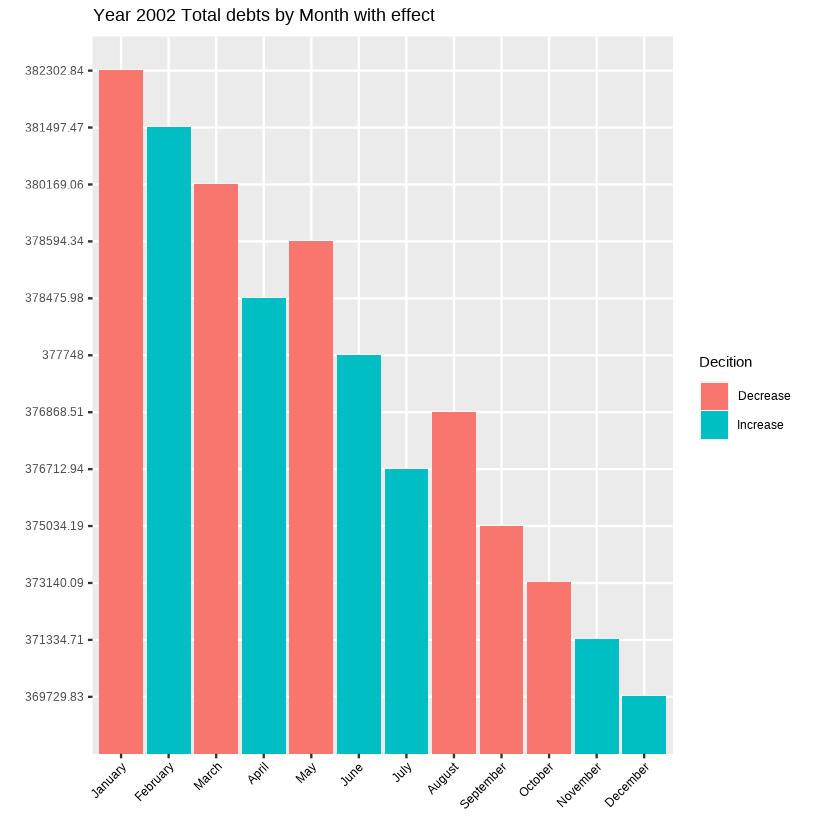

In [77]:
kenya_debt%>%filter(Year==2002)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2002 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

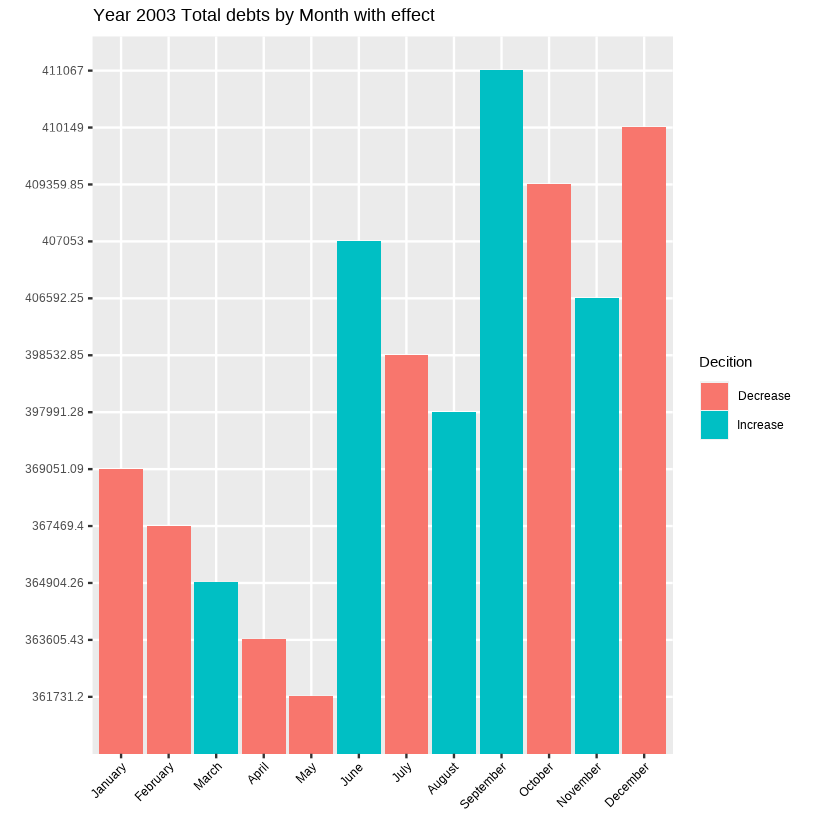

In [78]:
kenya_debt%>%filter(Year==2003)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2003 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

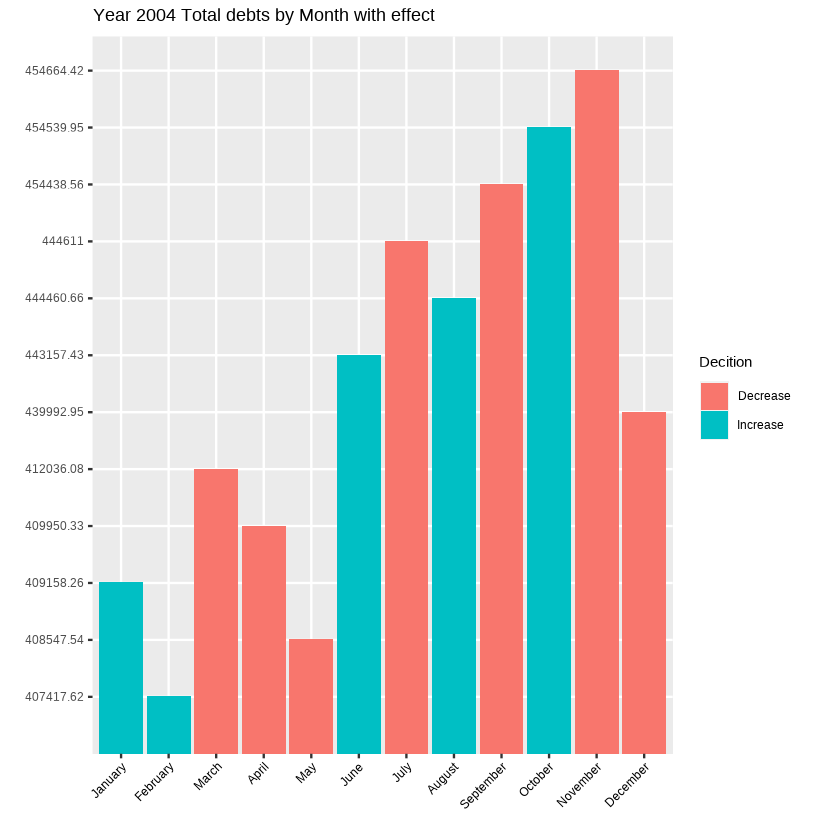

In [79]:
kenya_debt%>%filter(Year==2004)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2004 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

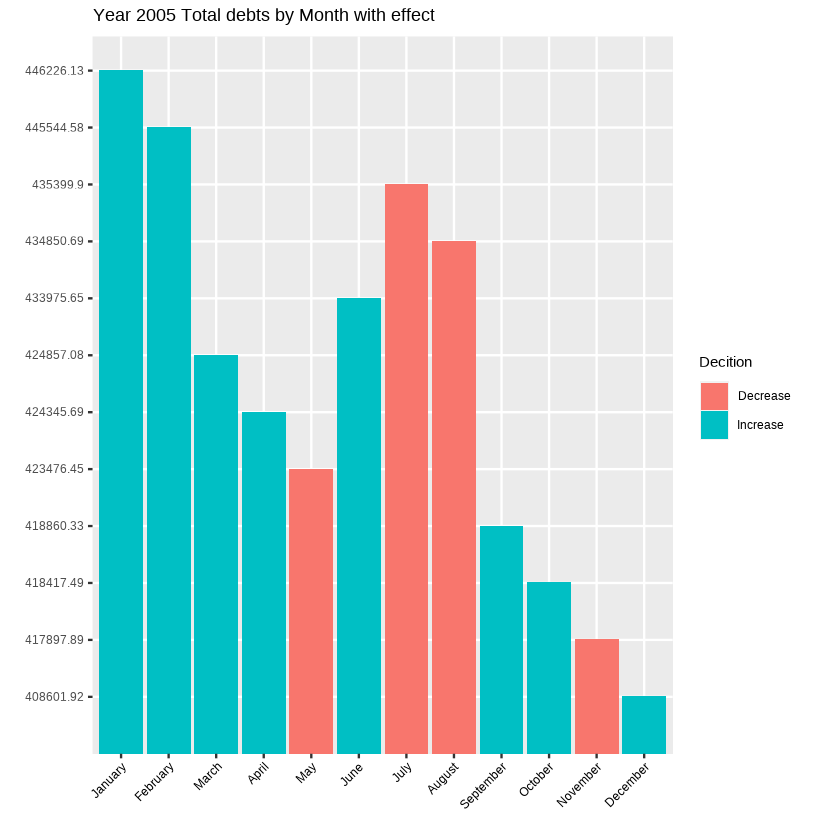

In [80]:
kenya_debt%>%filter(Year==2005)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2005 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")

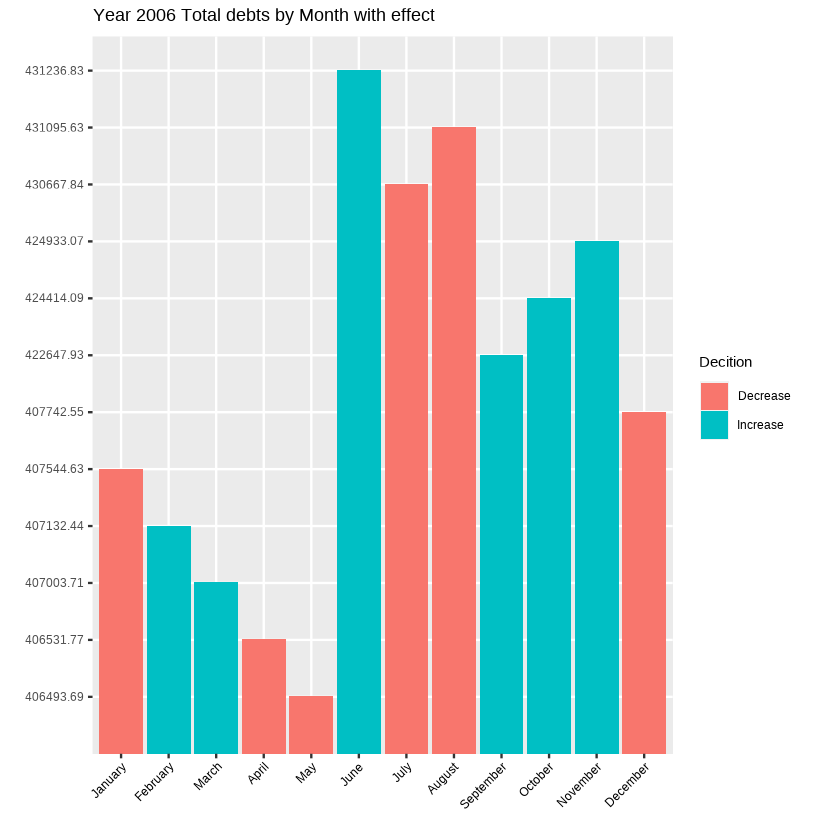

In [81]:
kenya_debt%>%filter(Year==2006)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2006 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

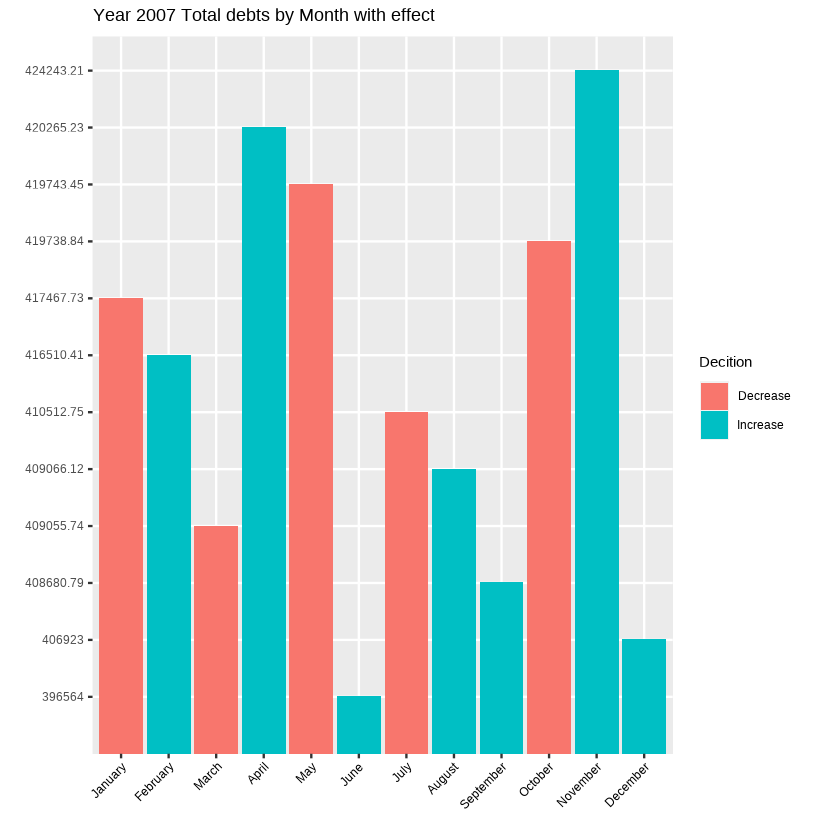

In [82]:
kenya_debt%>%filter(Year==2007)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2007 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")

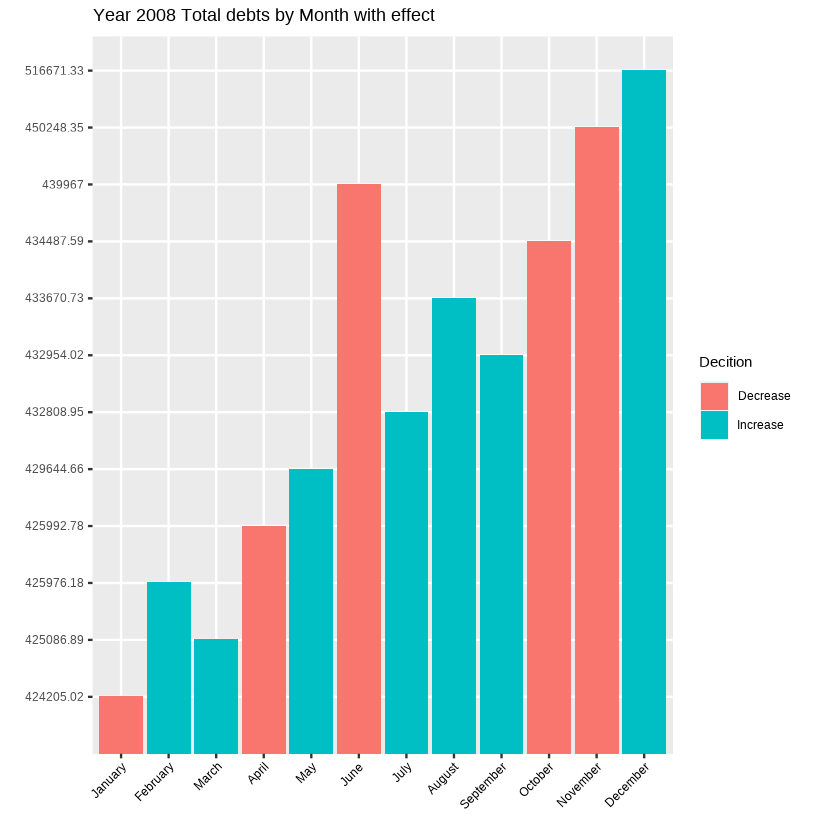

In [83]:

kenya_debt%>%filter(Year==2008)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2008 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

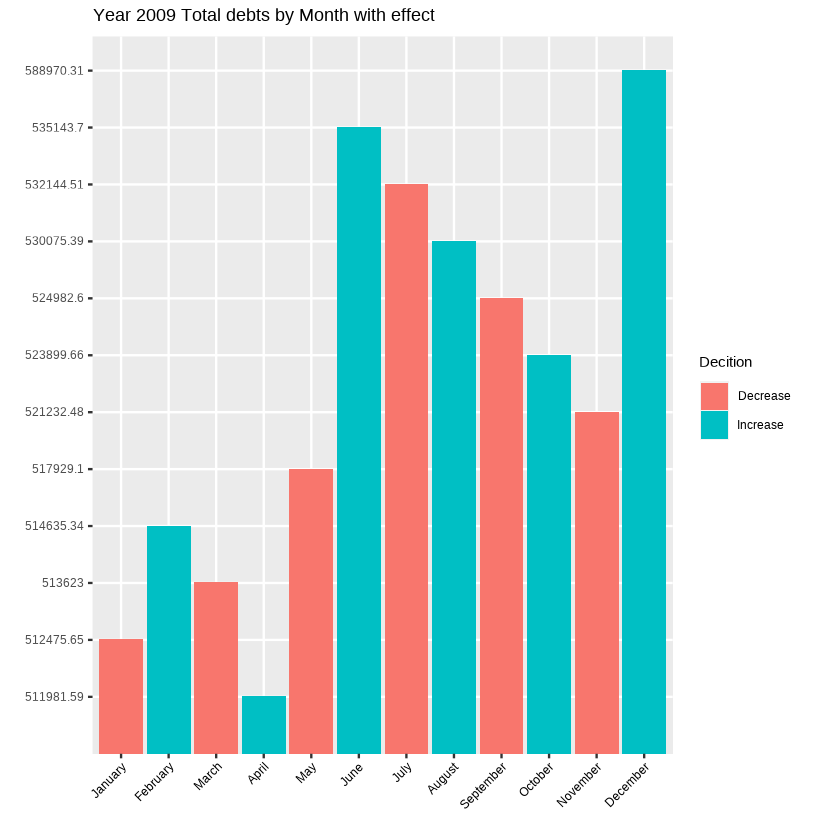

In [84]:
kenya_debt%>%filter(Year==2009)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2009 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

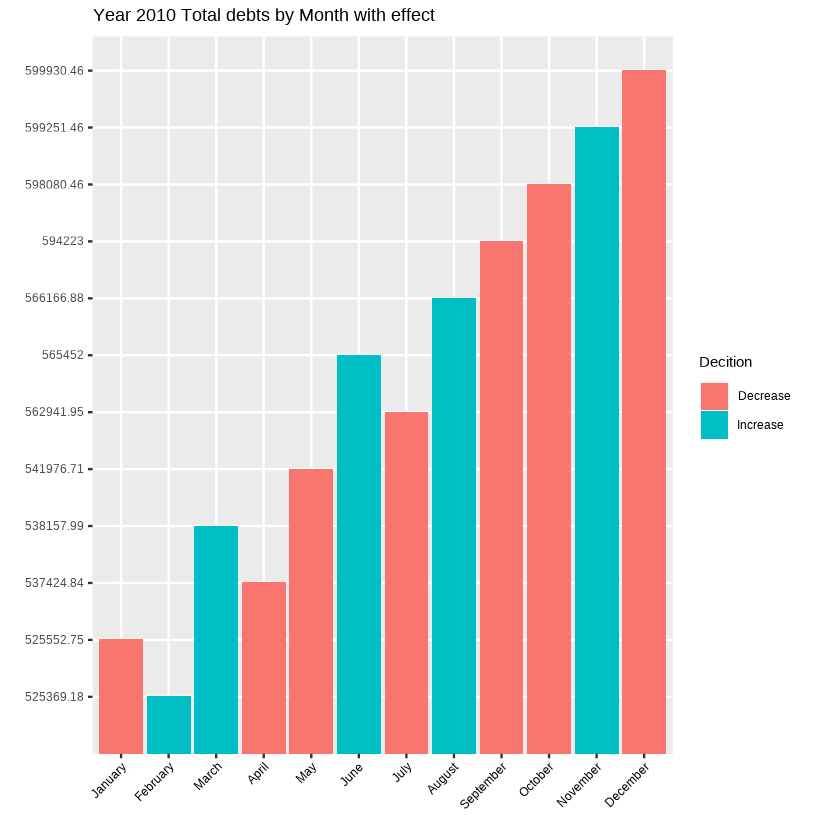

In [85]:
kenya_debt%>%filter(Year==2010)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2010 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

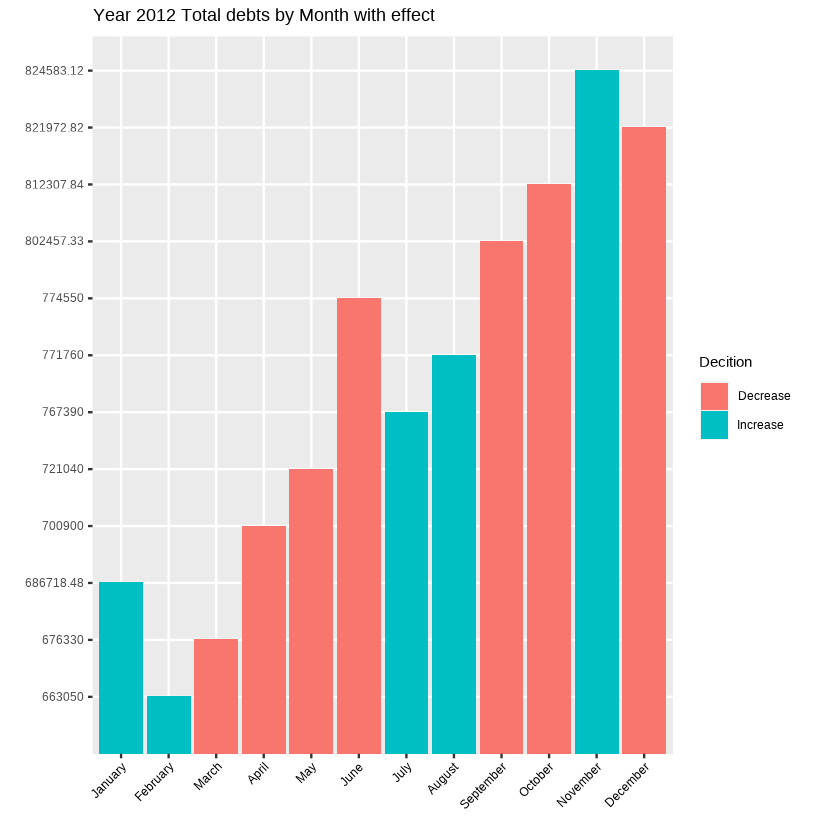

In [86]:
kenya_debt%>%filter(Year==2012)%>% ggplot(aes(x=Month, y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2012 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 


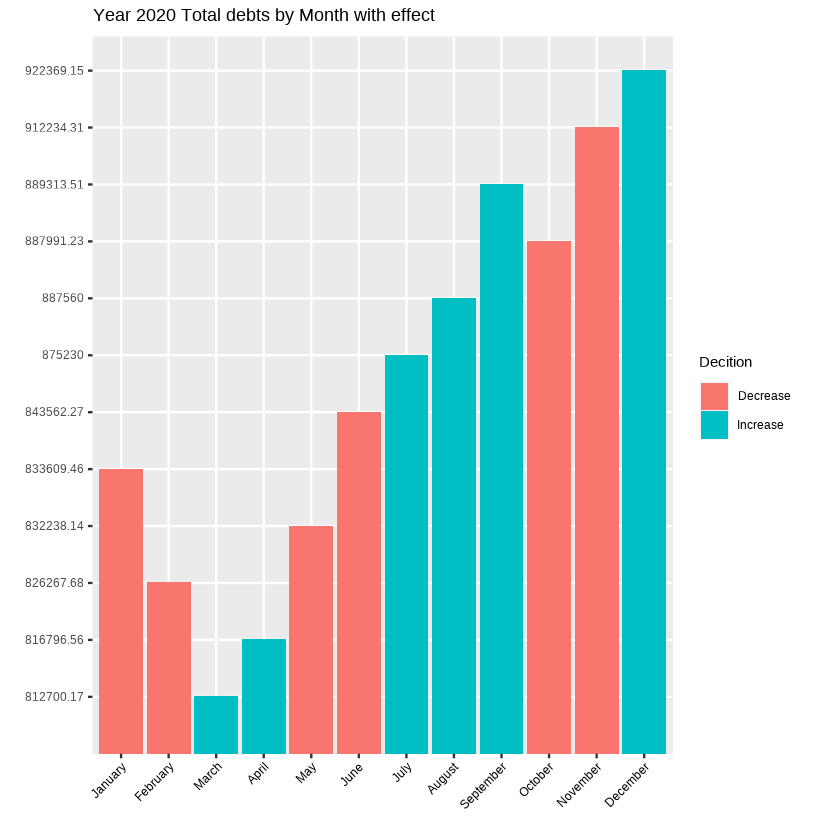

In [87]:
kenya_debt%>%filter(Year==2013)%>% ggplot(aes(x=Month, y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

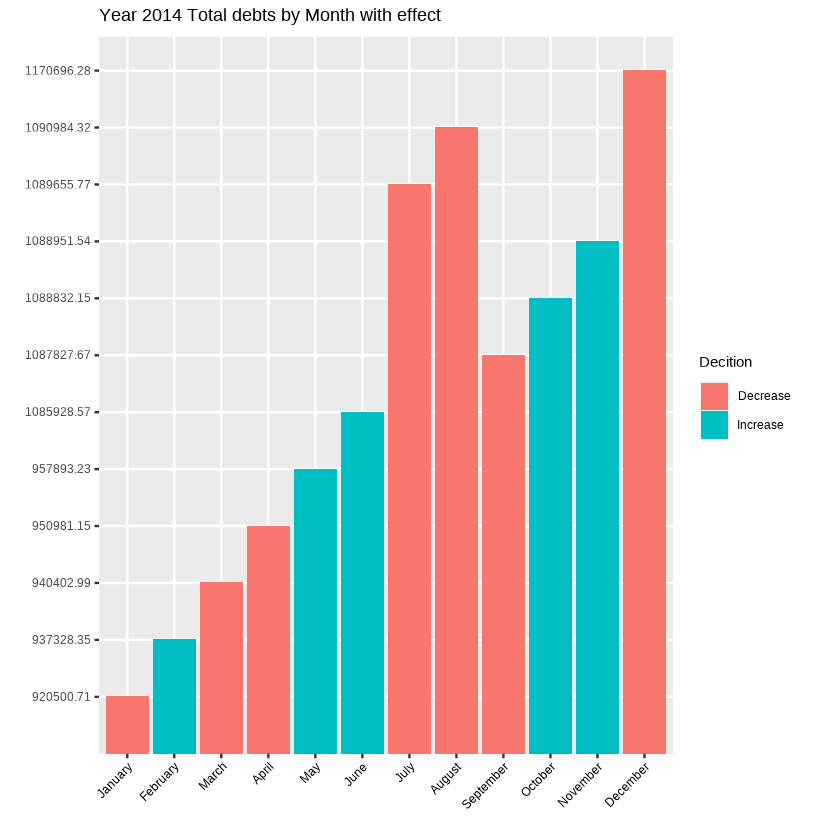

In [88]:
kenya_debt%>%filter(Year==2014)%>% ggplot(aes(x=Month, y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2014 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

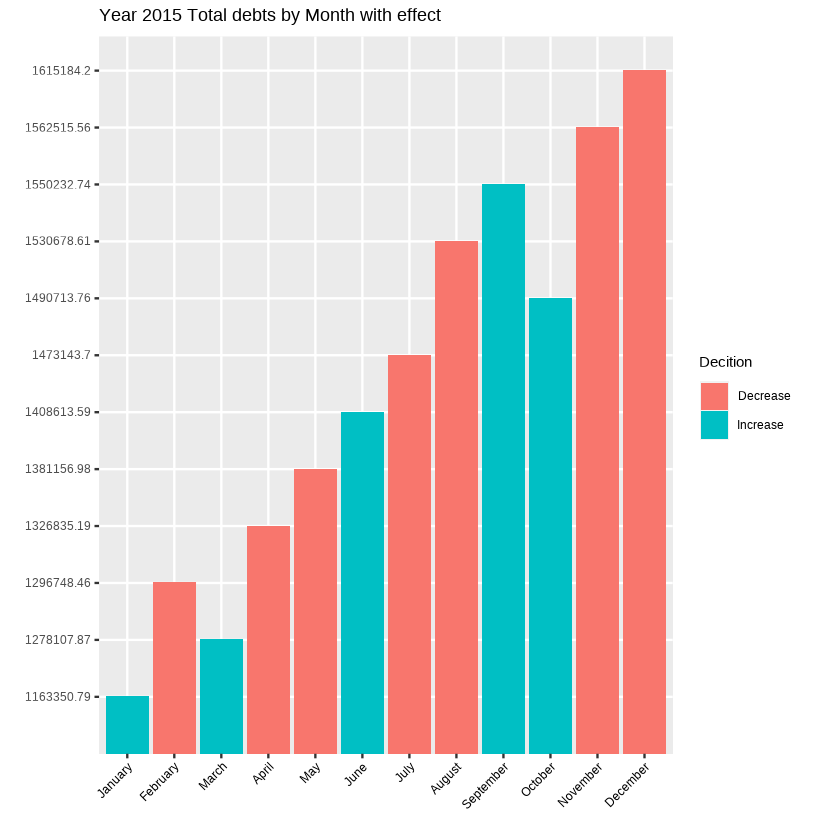

In [89]:
kenya_debt%>%filter(Year==2015)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2015 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

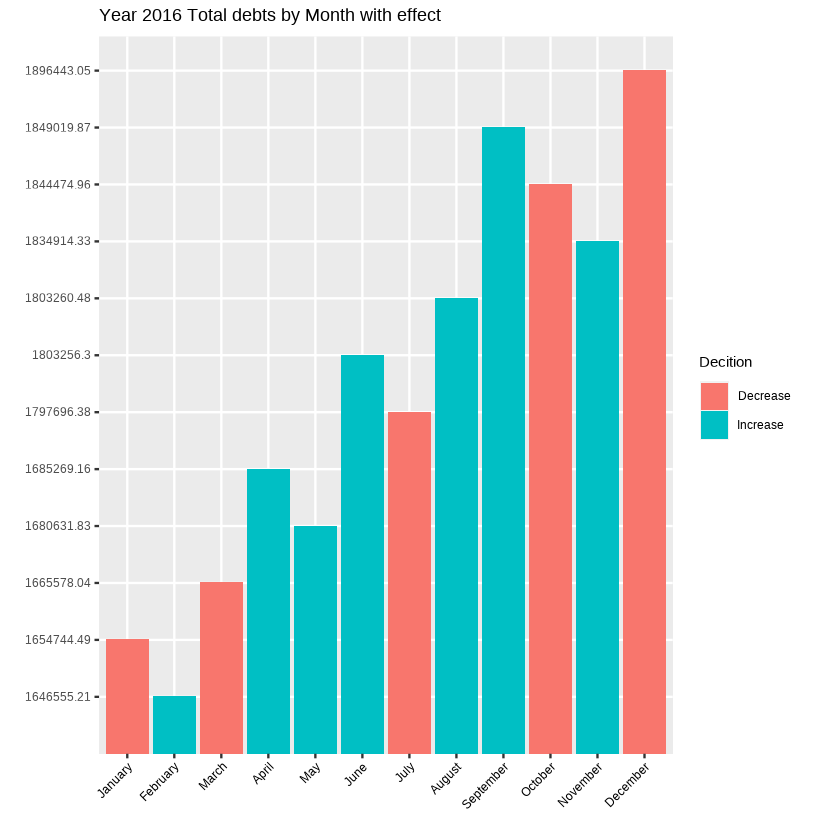

In [90]:
kenya_debt%>%filter(Year==2016)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2016 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

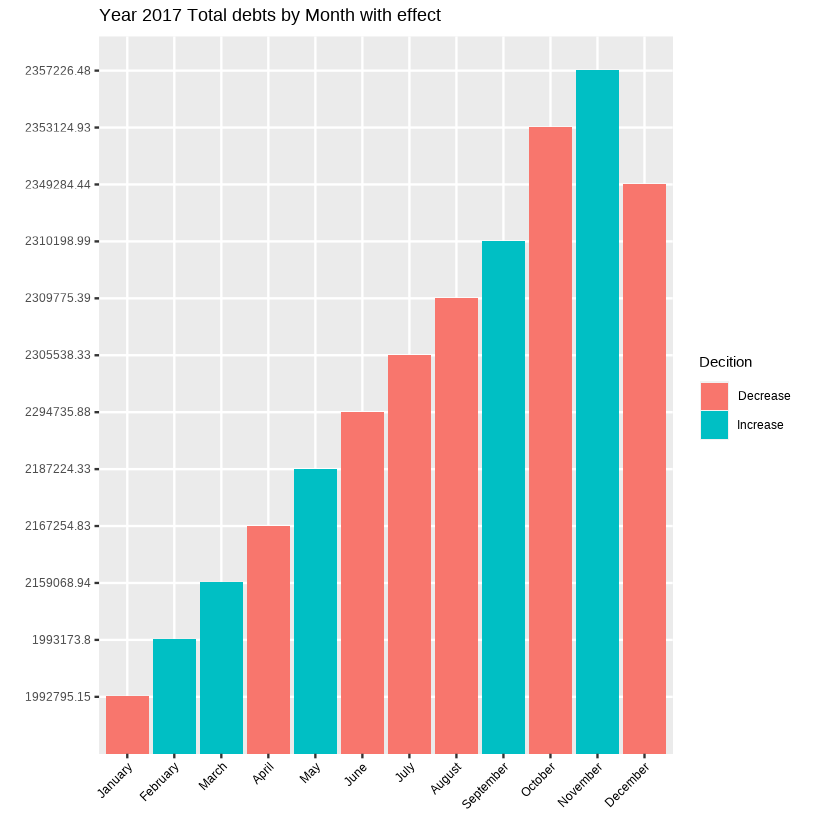

In [91]:
kenya_debt%>%filter(Year==2017)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2017 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

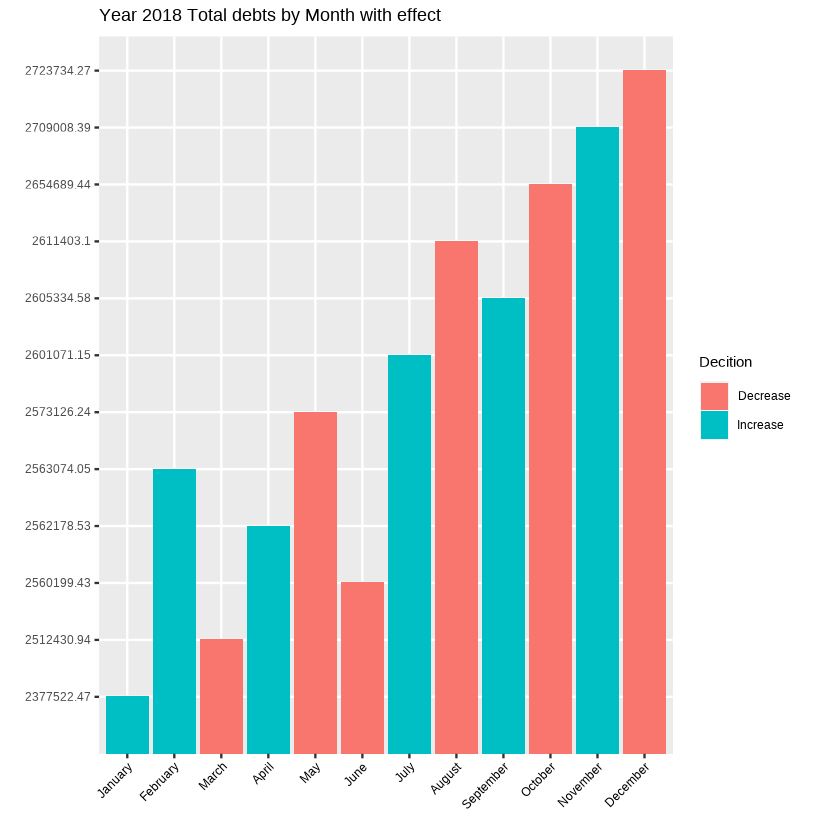

In [92]:

kenya_debt%>%filter(Year==2018)%>% ggplot(aes(x=Month, y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2018 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

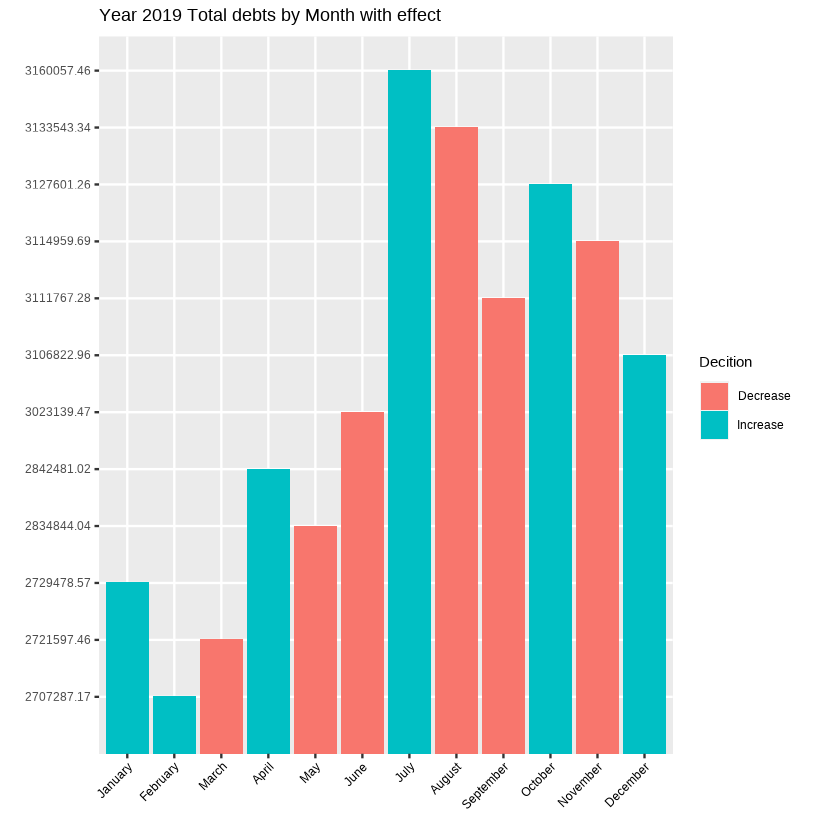

In [93]:
kenya_debt%>%filter(Year==2019)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2019 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

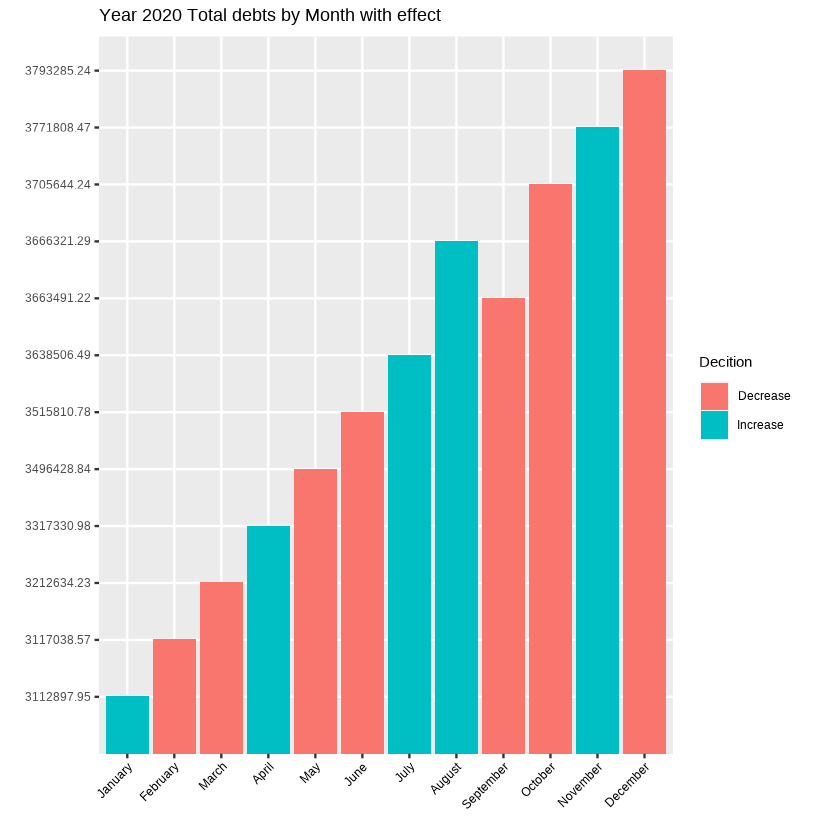

In [94]:
kenya_debt%>%filter(Year==2020)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition")

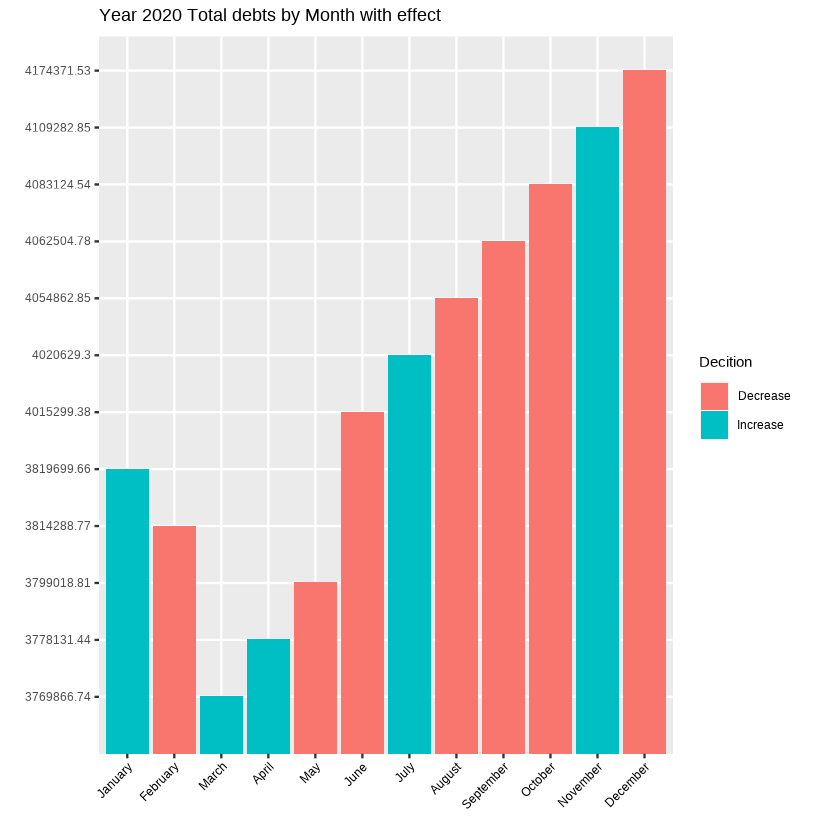

In [95]:
kenya_debt%>%filter(Year==2021)%>% ggplot(aes(x=Month,y= as.factor(`External Debt`), 
                                              fill= Decsion_icrease_decrease_DOMESTIC))+geom_bar(stat = "identity")+
  theme(axis.text.x = element_text(angle = 45, hjust = 1, colour = "black")) +  
  labs(title = "Year 2020 Total debts by Month with effect", x = " ", y = " ")+
  labs(fill = "Decition") 

# FEATURE ENGINEERING

## Relationship evaluation (i.e, Correlation analysis)

`geom_smooth()` using formula = 'y ~ x'


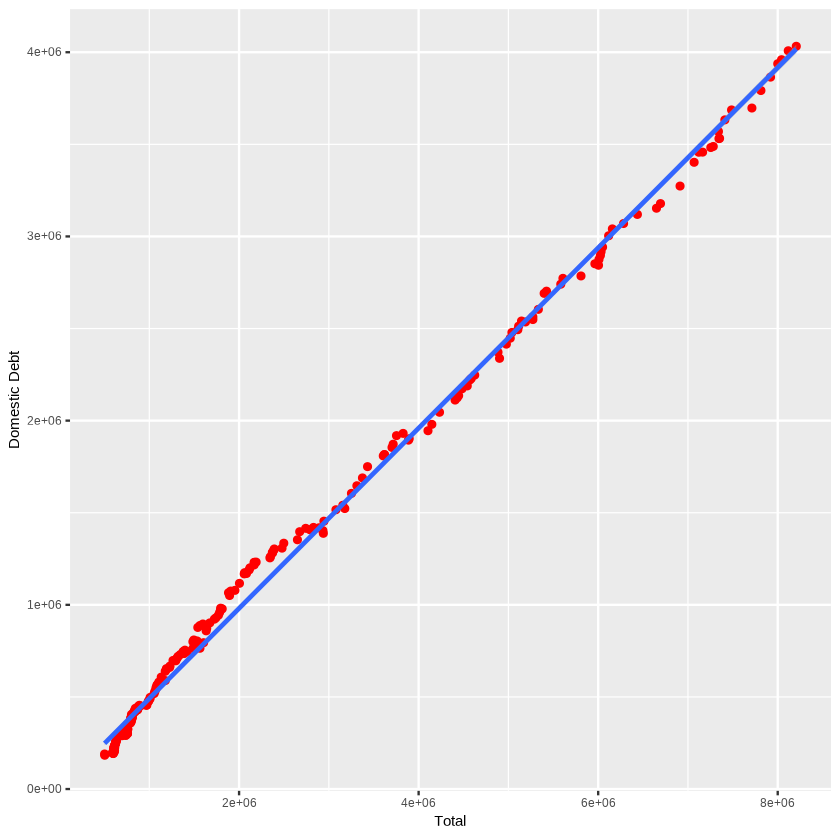

In [96]:

ggplot(kenya_debt, aes(x=Total, y= `Domestic Debt`))+geom_point(col ="red")+geom_smooth(method = lm, se=T)

`geom_smooth()` using formula = 'y ~ x'


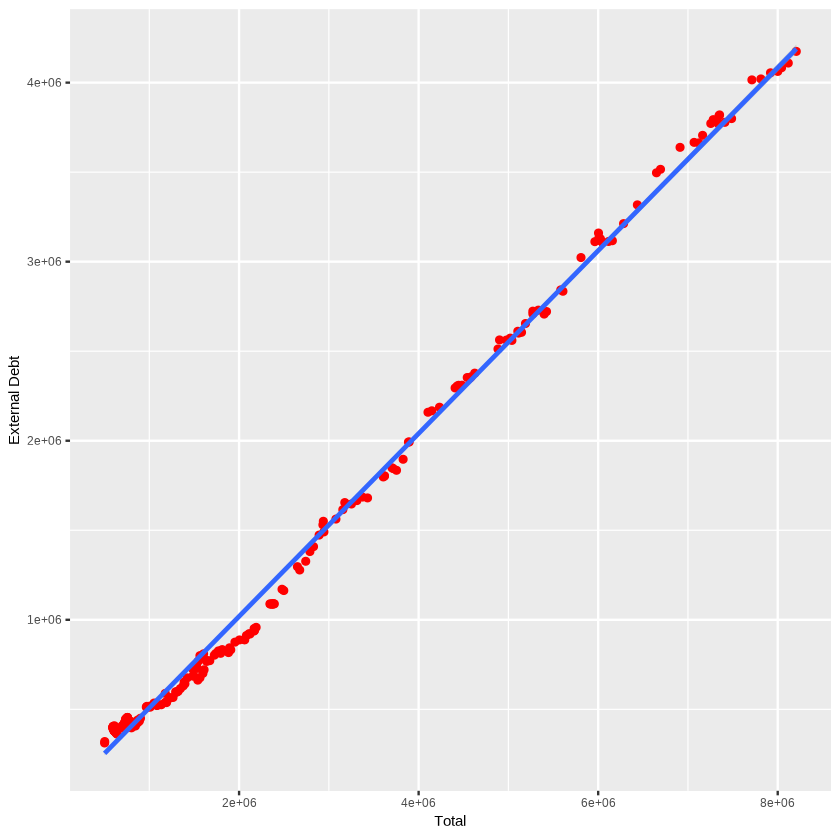

In [97]:
ggplot(kenya_debt, aes(x=Total, y= `External Debt`))+geom_point(col ="red")+geom_smooth(method = lm, se=T)

`geom_smooth()` using formula = 'y ~ x'


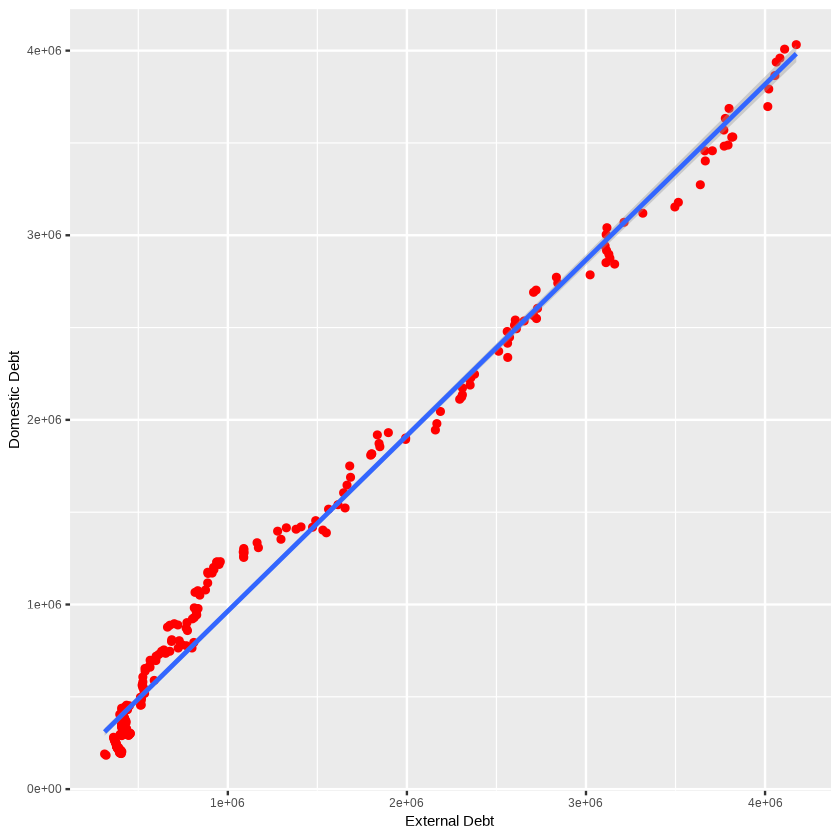

In [98]:
ggplot(kenya_debt, aes(x=`External Debt`, y= `Domestic Debt`))+geom_point(col ="red")+geom_smooth(method = lm, se=T)

## Chdcking if the relationships are significant

In [99]:

cor.test(kenya_debt$Total, kenya_debt$`Domestic Debt`)


	Pearson's product-moment correlation

data:  kenya_debt$Total and kenya_debt$`Domestic Debt`
t = 257.86, df = 260, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9975136 0.9984717
sample estimates:
      cor 
0.9980506 


In [100]:
cor.test(kenya_debt$Total, kenya_debt$`External Debt`)


	Pearson's product-moment correlation

data:  kenya_debt$Total and kenya_debt$`External Debt`
t = 269.13, df = 260, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9977169 0.9985967
sample estimates:
    cor 
0.99821 


In [101]:
cor.test(kenya_debt$`External Debt`, kenya_debt$`Domestic Debt`)


	Pearson's product-moment correlation

data:  kenya_debt$`External Debt` and kenya_debt$`Domestic Debt`
t = 131.19, df = 260, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9904815 0.9941413
sample estimates:
      cor 
0.9925315 


## Conclusion: There is a perfect correlation between the feature, hence, there is a perfect serial correlation(i.e. Multicollinearity)



# 1. ARIMA (AutoRegressive Integrated Moving Average)

In [102]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(forecast)
library(tseries)


kenya_debt <- kenya_debt %>%
  mutate(Date = as.Date(paste(Year, Month, "01", sep = "-"), format = "%Y-%B-%d")) %>%
  arrange(Date)
kenya_debtl <- kenya_debt[3:262,]
head(kenya_debtl, 10)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Year Month     Domestic Debt External Debt Total    Per_DOMESTIC
1  2000 March     201463.2      396800.0      598263.2 33.67468    
2  2000 June      206127.0      395694.0      601821.0 34.25055    
3  2000 July      202362.0      394667.4      597029.4 33.89481    
4  2000 August    196584.0      395710.1      592294.1 33.19027    
5  2000 September 195520.0      399798.7      595318.7 32.84291    
6  2000 October   195564.0      400203.0      595767.0 32.82558    
7  2000 November  195906.0      400714.5      596620.5 32.83595    
8  2000 December  192665.3      405355.3      598020.6 32.21717    
9  2001 January   193332.9      403645.7      596978.6 32.38524    
10 2001 February  199537.3      402555.4      602092.7 33.14062    
   Per_EXTERNAL Decision_domestic_VS_external AMOUNT_Increase_decrese_DOMESTIC
1  66.32532     Higher external debt          11163.22                        
2  65.74945     Higher external debt           4663.78                        
3  66.10519     Higher external debt          -3765.00                        
4  66.80973     Higher external debt          -5778.00                        
5  67.15709     Higher external debt          -1064.00                        
6  67.17442     Higher external debt             44.00                        
7  67.16405     Higher external debt            342.00                        
8  67.78283     Higher external debt          -3240.70                        
9  67.61476     Higher external debt            667.65                        
10 66.85938     Higher external debt           6204.32                        
   Percentage_Incresea_decresea_DOMESTIC Decsion_icrease_decrease_DOMESTIC
1   5.86611666                           Increase                         
2   2.31495357                           Decrease                         
3  -1.82654383                           Decrease                         
4  -2.85527915                           Decrease                         
5  -0.54124445                           Increase                         
6   0.02250409                           Increase                         
7   0.17487881                           Increase                         
8  -1.65421171                           Decrease                         
9   0.34653360                           Increase                         
10  3.20913740                           Increase                         
   AMOUNT_Increase_decrese_EXTERNAL Percentage_Incresea_decresea_EXTERNAL
1  84847.00                         27.20                                
2  -1106.00                         -0.28                                
3  -1026.63                         -0.26                                
4   1042.69                          0.26                                
5   4088.66                          1.03                                
6    404.31                          0.10                                
7    511.42                          0.13                                
8   4640.86                          1.16                                
9  -1709.63                         -0.42                                
10 -1090.28                         -0.27                                
   Decsion_icrease_decrease_EXTERNAL AMOUNT_Increase_decrese_TOTAL
1  Increase                          96010.22                     
2  Decrease                           3557.78                     
3  Increase                          -4791.63                     
4  Increase                          -4735.31                     
5  Increase                           3024.66                     
6  Decrease                            448.31                     
7  Increase                            853.42                     
8  Increase                           1400.16                     
9  Decrease                          -1041.98                     
10 Increase                           5114.04                     
   Percent

In [103]:

total_ts <- ts(kenya_debtl$Total, start = c(min(kenya_debtl$Year), 1), frequency = 12)

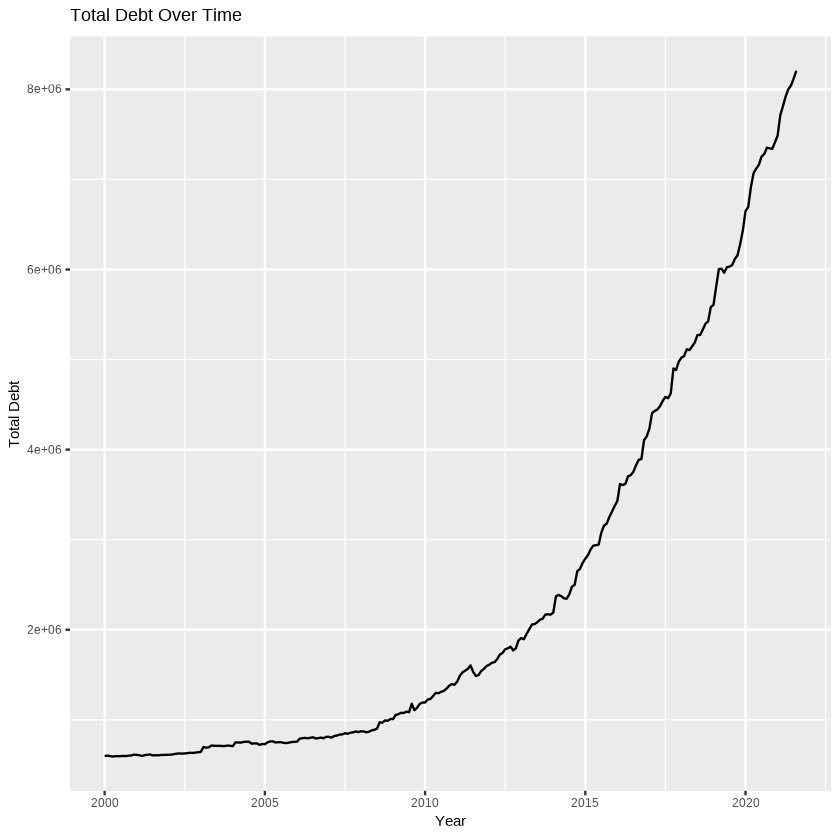

In [104]:
autoplot(total_ts) +
  ggtitle("Total Debt Over Time") +
  xlab("Year") +
  ylab("Total Debt")

In [105]:
start_date <- start(total_ts)
end_date <- end(total_ts)

In [106]:
train_end <- ifelse(end_date[1] >= 2020, c(2020, 12), end_date)

total_train <- window(total_ts, end = train_end)
total_test <- window(total_ts, start = start_date)

In [107]:
start_date <- start(total_ts)
end_date <- end(total_ts)

cat("Start date of the time series: ", start_date, "\n")
cat("End date of the time series: ", end_date, "\n")

# Adjust the end date for training to be within the range
train_end <- ifelse(end_date[1] >= 2020, c(2020, 12), end_date)

# Split data into training and testing sets
total_train <- window(total_ts, end = train_end)
total_test <- window(total_ts, start = c(2021, 1))

fit <- auto.arima(total_train)
summary(fit)

Start date of the time series:  2000 1 
End date of the time series:  2021 8 


Series: total_train 
ARIMA(1,2,2) 

Coefficients:
         ar1      ma1     ma2
      0.7831  -1.8962  0.9165
s.e.  0.0673   0.0405  0.0396

sigma^2 = 1.609e+09:  log likelihood = -2872.58
AIC=5753.16   AICc=5753.34   BIC=5767.07

Training set error measures:
                   ME     RMSE      MAE       MPE    MAPE       MASE       ACF1
Training set 3843.397 39698.19 22981.87 0.1747181 1.15384 0.07928156 0.04668236


	Ljung-Box test

data:  Residuals from ARIMA(1,2,2)
Q* = 44.466, df = 21, p-value = 0.002034

Model df: 3.   Total lags used: 24



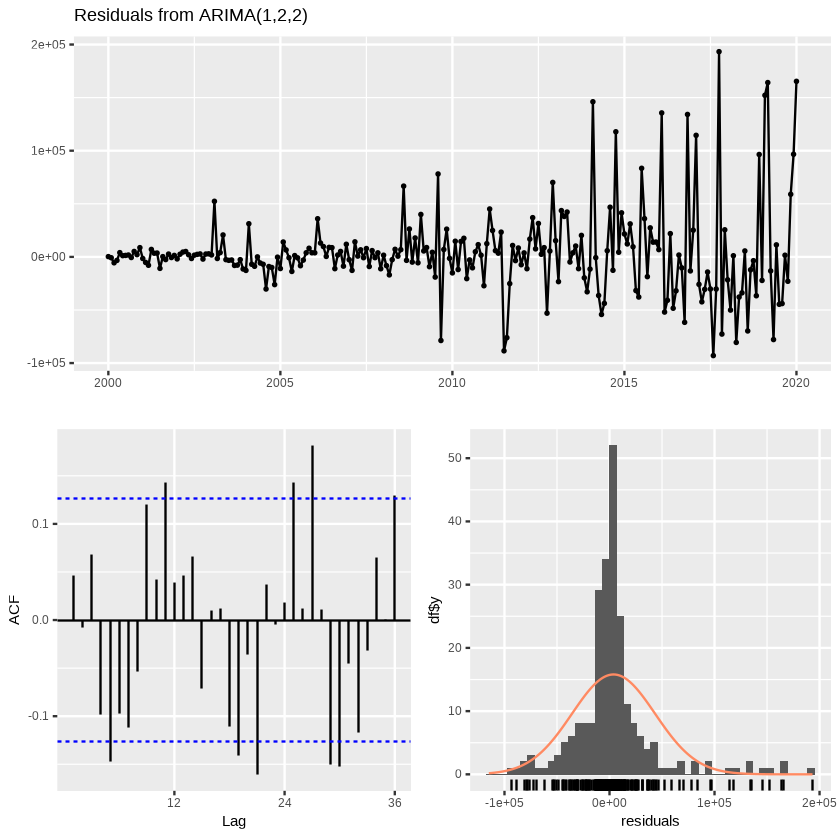

In [108]:

checkresiduals(fit)

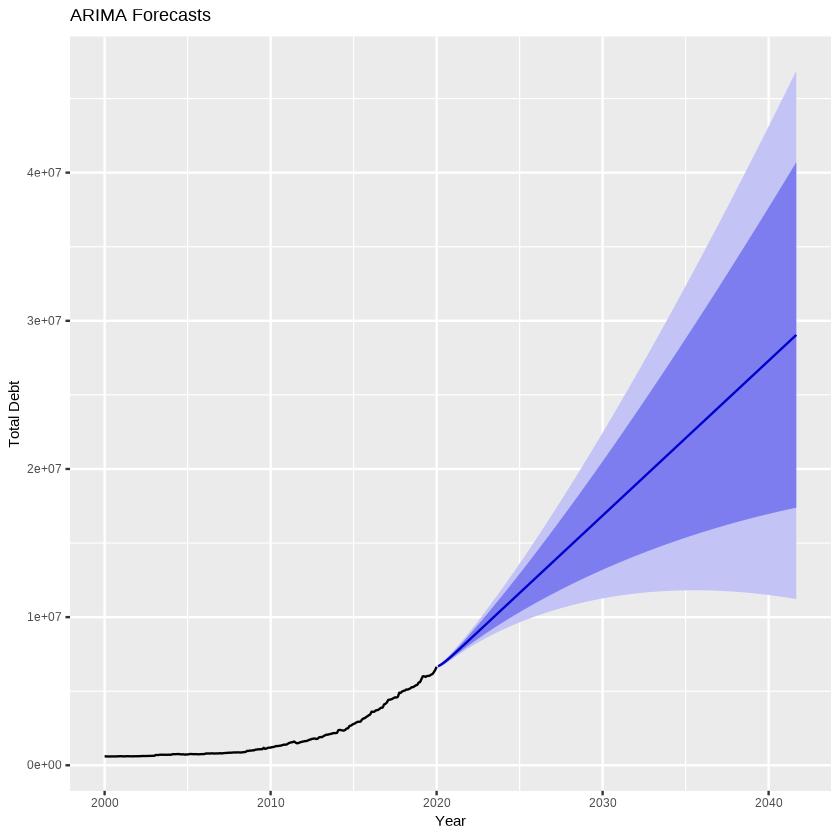

In [109]:

forecasts <- forecast(fit, h = length(total_ts))

autoplot(forecasts) +
  ggtitle("ARIMA Forecasts") +
  xlab("Year") +
  ylab("Total Debt")

In [116]:

install.packages("factoextra")

library(factoextra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘emmeans’, ‘pbkrtest’ are not available”
also installing the dependencies ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


Warning message in install.packages("factoextra"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘FactoMineR’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘ggpubr’ had non-zero exit status”
Warning message in install.packages("factoextra"):
“installation of package ‘factoextra’ had non-zero exit status”


ERROR: Error in library(factoextra): there is no package called ‘factoextra’


# Clustering

In [ ]:
Quantitative <- kenya_debt%>% select(`Domestic Debt`,                        
                                      `External Debt`, Total)

Q <- as.data.frame(scale(Quantitative))

In [ ]:
fviz_nbclust(Q, kmeans, method = "wss")+geom_vline(xintercept = 3, linetype=2)



In [ ]:
km.res <- kmeans(Q, centers=3, iter.max = 20, nstart = 100)

In [ ]:
summary(km.res)
print(km.res)

In [ ]:
aggregate(Quantitative, by=list(Cluster=km.res$cluster), mean)

In [ ]:
dd <- cbind(Quantitative, cluster=km.res$cluster)

In [ ]:
head(dd, 10)

In [ ]:
head(km.res$cluster,4)


In [ ]:
km.res$centers

In [ ]:
fviz_cluster(km.res, 
             data = Q, 
             palette = c("#2e9fdf", "#e7b800", "red"), 
             ellipse.type = "euclid",
             star.plot = TRUE, 
             repel = TRUE, 
             ggtheme = theme_minimal(),
             labelsize = 0) 

# Regression

In [ ]:
S <- sample.split(kenya_debt$Year, SplitRatio = 0.8)
Train_logit <- subset(kenya_debt, S==T)
Test_logit <- subset(kenya_debt, S==F)